# Stores sale prediction

## Introduction

### Problem statement

Shopping for groceries has been a routine to everyone in the world. Supermarket has been one of the most frequent visit place to get groceries. Depending on the time of the year, customer spends their money on supermarket varies. Without proper management on stores, problem such as food waste and overstocking may occur. Customer may also go to another supermarket to find their most needed items. 

For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. Ensuring the supermarket has exactly what customer need the next time they shop.

How much inventory to buy?

### Goal

Predicts the unit sales for thousands of items sold at overall Favorita stores.

### Important things to note

- `promotion`, `holiday`, `oil_price` and `store_location` may play important role in the sales of each supermarket

- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this

- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

## 0. Data Gathering and Preparation

Store sales prediction in Ecuador

Predicting sales in Favotira. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

Dataset are taken from a competition in kaggle https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview. Datasets included:

- train.csv
- test.csv
- stores.csv
- oil.csv
- holidays_events.csv

In this section, following actions has been done to setup the dataset.add

- Change each date column into datetime format
- Sales of each attributes has been aggregated each date by sum() to get the total sales for every Favotira stores
- Merge the sales dataset with holidays and oil price dataset that may correlate with the sales.
- All nan value for oil has been backfilled

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from datetime import datetime
sales_raw = pd.read_csv('train.csv', parse_dates=['date'], date_format='%Y-%m-%d')
sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [3]:
sales = sales_raw.set_index('date')

In [4]:
sales.drop(['id','family','store_nbr'], axis=1, inplace=True)


In [5]:
daily_sales = sales.groupby('date').sum()

In [6]:
daily_sales

sales  onpromotion
date                                  
2013-01-01    2511.618999            0
2013-01-02  496092.417944            0
2013-01-03  361461.231124            0
2013-01-04  354459.677093            0
2013-01-05  477350.121229            0
...                   ...          ...
2017-08-11  826373.722022        14179
2017-08-12  792630.535079         8312
2017-08-13  865639.677471         9283
2017-08-14  760922.406081         8043
2017-08-15  762661.935939        10605

[1684 rows x 2 columns]

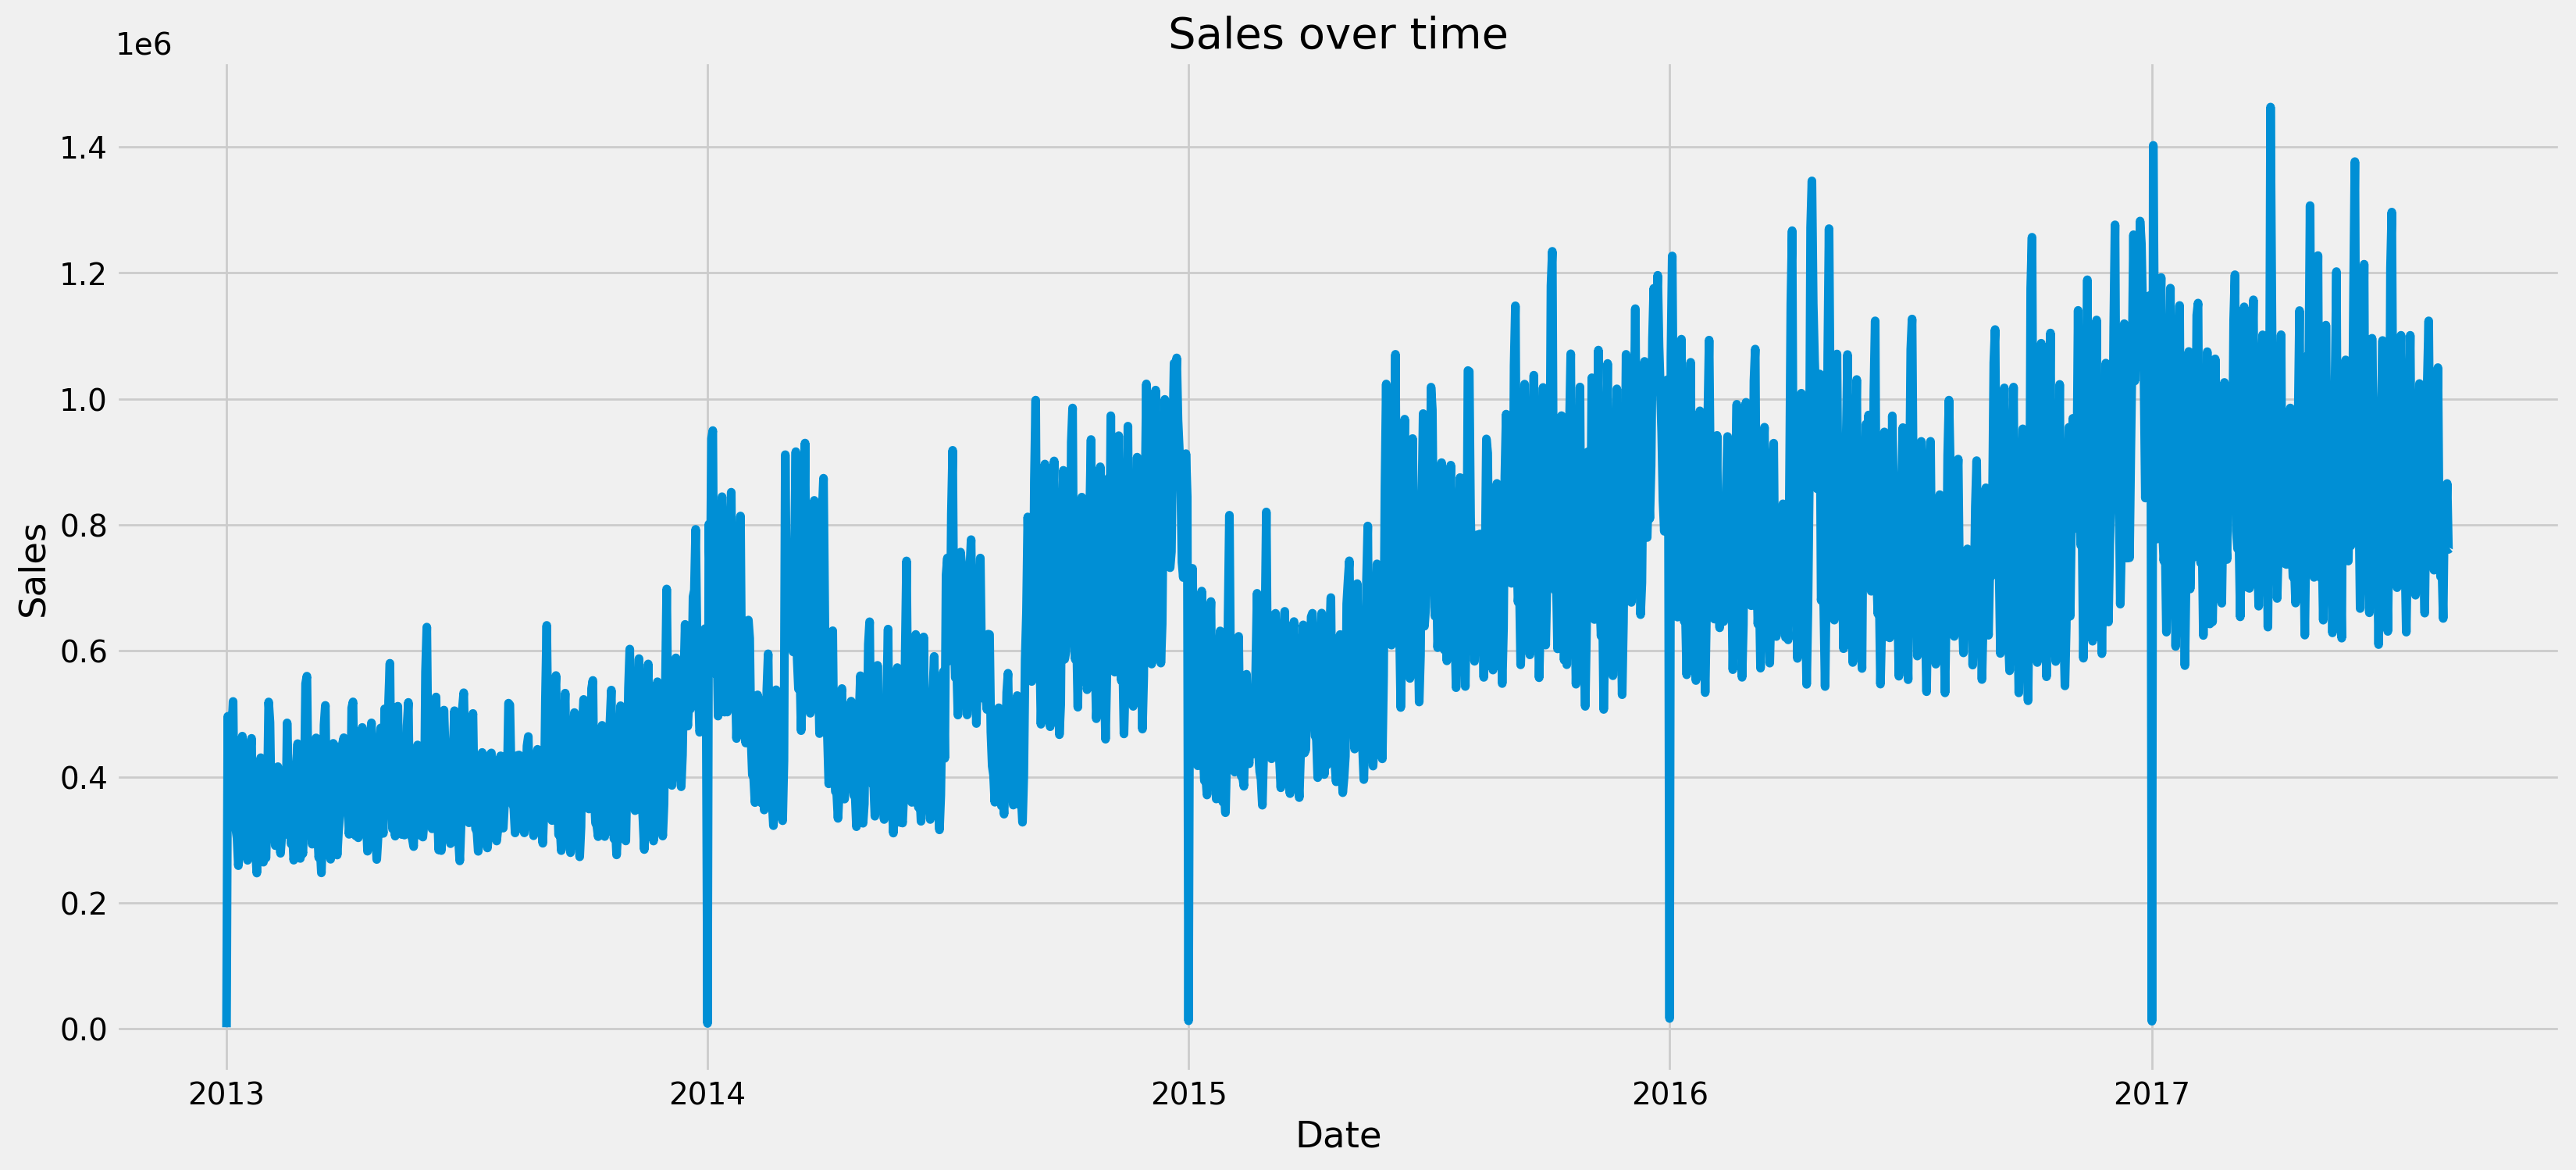

In [7]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(daily_sales['sales'])

plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()


In [8]:
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv', parse_dates=['date'], date_format='%Y-%m-%d')
holidays = pd.read_csv('holidays_events.csv', parse_dates=['date'], date_format='%Y-%m-%d')

In [9]:
holidays

date        type    locale locale_name  \
0   2012-03-02     Holiday     Local       Manta   
1   2012-04-01     Holiday  Regional    Cotopaxi   
2   2012-04-12     Holiday     Local      Cuenca   
3   2012-04-14     Holiday     Local    Libertad   
4   2012-04-21     Holiday     Local    Riobamba   
..         ...         ...       ...         ...   
345 2017-12-22  Additional  National     Ecuador   
346 2017-12-23  Additional  National     Ecuador   
347 2017-12-24  Additional  National     Ecuador   
348 2017-12-25     Holiday  National     Ecuador   
349 2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

In [10]:
holidays['holiday']=True

In [11]:
sales_features = pd.merge(daily_sales, holidays[['date','holiday']], how='left' , on='date')

In [12]:
sales_features

date          sales  onpromotion holiday
0    2013-01-01    2511.618999            0    True
1    2013-01-02  496092.417944            0     NaN
2    2013-01-03  361461.231124            0     NaN
3    2013-01-04  354459.677093            0     NaN
4    2013-01-05  477350.121229            0    True
...         ...            ...          ...     ...
1709 2017-08-11  826373.722022        14179    True
1710 2017-08-12  792630.535079         8312     NaN
1711 2017-08-13  865639.677471         9283     NaN
1712 2017-08-14  760922.406081         8043     NaN
1713 2017-08-15  762661.935939        10605    True

[1714 rows x 4 columns]

In [13]:
sales_features['holiday'].fillna(False,inplace=True)

In [14]:
sales_features['holiday'].value_counts()

holiday
False    1432
True      282
Name: count, dtype: int64

In [15]:
sales_features['holiday'] = sales_features['holiday'].astype(int)


In [16]:
sales_features

date          sales  onpromotion  holiday
0    2013-01-01    2511.618999            0        1
1    2013-01-02  496092.417944            0        0
2    2013-01-03  361461.231124            0        0
3    2013-01-04  354459.677093            0        0
4    2013-01-05  477350.121229            0        1
...         ...            ...          ...      ...
1709 2017-08-11  826373.722022        14179        1
1710 2017-08-12  792630.535079         8312        0
1711 2017-08-13  865639.677471         9283        0
1712 2017-08-14  760922.406081         8043        0
1713 2017-08-15  762661.935939        10605        1

[1714 rows x 4 columns]

In [17]:
sales_features.corr()

date     sales  onpromotion   holiday
date         1.000000  0.719135     0.830301  0.052825
sales        0.719135  1.000000     0.578671  0.116708
onpromotion  0.830301  0.578671     1.000000  0.076530
holiday      0.052825  0.116708     0.076530  1.000000

In [18]:
oil.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

In [19]:
sales_features = pd.merge(sales_features, oil, how='left' , on='date')

In [20]:
sales_features.isnull().sum()

date             0
sales            0
onpromotion      0
holiday          0
oil_price      536
dtype: int64

In [21]:
sales_features['oil_price'].fillna(method='backfill', inplace=True)

In [22]:
sales_features.set_index('date',inplace=True)

## 1. Exploratory Data Analysis

In this section, we explore the data by visualizing.

- Plotted the sales in conjunction with promotion, and oil price to watch the sales movement
- used .corr() function to watch the correlation of each features
- Reduced the category from 33 to 6 sections
- Sales has been grouped with category, to watch which section contributes the most.
- Plotted monthly saled by category
- Checked linear regression on each features
- Perform feature permutation using RF Regressor

### - Viewing the sales over timeline

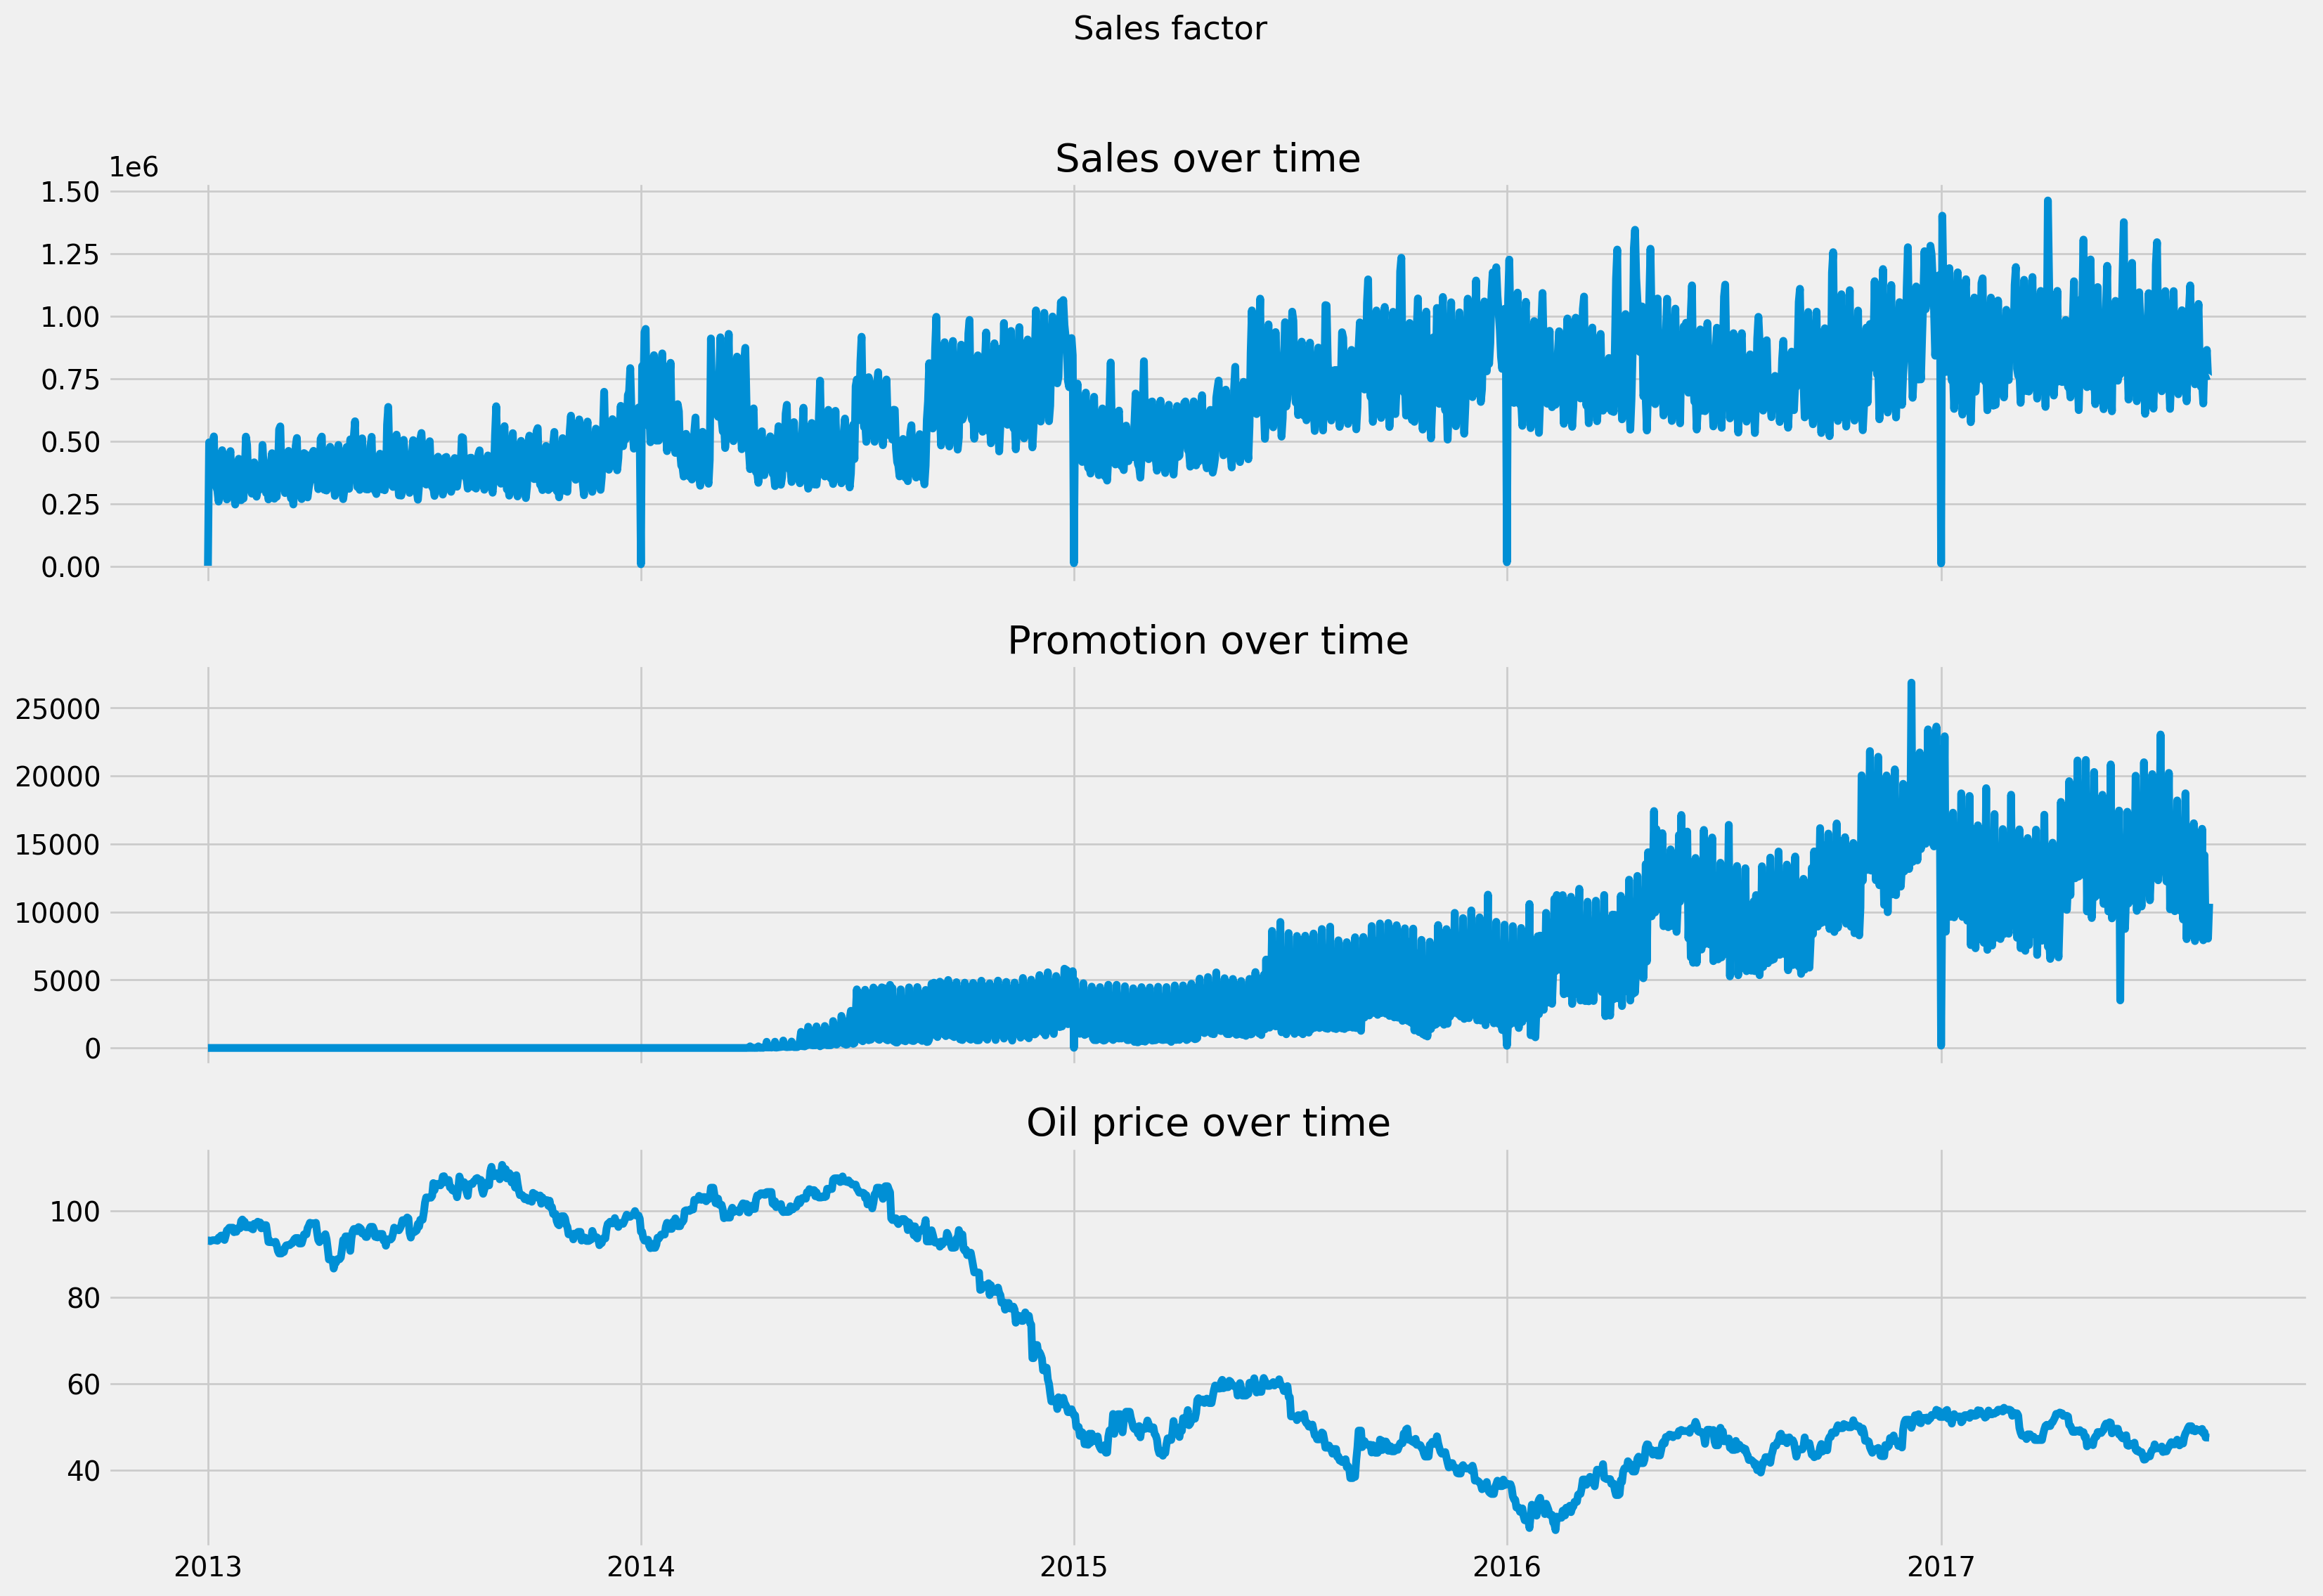

In [23]:
fig, (ax1,ax2,ax3)= plt.subplots(nrows=3, ncols=1, figsize=(18,12), sharex=True)
plt.suptitle('Sales factor')

ax1.set_title('Sales over time')
ax1.plot(sales_features['sales'])

ax2.set_title('Promotion over time')
ax2.plot(sales_features['onpromotion'])

ax3.set_title('Oil price over time')
ax3.plot(sales_features['oil_price'])

# plt.vlines(sales_features.index, color='g', lw=2)
plt.show()

In [24]:
sales_features

sales  onpromotion  holiday  oil_price
date                                                      
2013-01-01    2511.618999            0        1      93.14
2013-01-02  496092.417944            0        0      93.14
2013-01-03  361461.231124            0        0      92.97
2013-01-04  354459.677093            0        0      93.12
2013-01-05  477350.121229            0        1      93.20
...                   ...          ...      ...        ...
2017-08-11  826373.722022        14179        1      48.81
2017-08-12  792630.535079         8312        0      47.59
2017-08-13  865639.677471         9283        0      47.59
2017-08-14  760922.406081         8043        0      47.59
2017-08-15  762661.935939        10605        1      47.57

[1714 rows x 4 columns]

### - Viewing the correlation and important features

In [25]:
sales_features.corr()

sales  onpromotion   holiday  oil_price
sales        1.000000     0.578671  0.116708  -0.632461
onpromotion  0.578671     1.000000  0.076530  -0.622347
holiday      0.116708     0.076530  1.000000  -0.035785
oil_price   -0.632461    -0.622347 -0.035785   1.000000

In [26]:
sales_important = sales_raw.copy()
sales_important

id       date  store_nbr                      family     sales  \
0              0 2013-01-01          1                  AUTOMOTIVE     0.000   
1              1 2013-01-01          1                   BABY CARE     0.000   
2              2 2013-01-01          1                      BEAUTY     0.000   
3              3 2013-01-01          1                   BEVERAGES     0.000   
4              4 2013-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [27]:
def reduce_category(data):
    if data == 'BABY CARE' or data =='BEAUTY' or data =='CLEANING'or data =='HOME CARE'or data =='LADIESWEAR' or data =='LINGERIE'or data =='PERSONAL CARE':
        return 'Household and Personal Care'
    
    elif data == 'DELI' or data =='EGGS'or data =='GROCERY I'or data =='GROCERY I'or data =='GROCERY II'or data =='PET SUPPLIES'or data =='BREAD/BAKERY':
        return 'Fresh Produce & Groceries'
    
    elif data == 'BEVERAGES'or data =='DAIRY'or data =='LIQUOR,WINE,BEER'or data =='PREPARED FOODS'or data =='FROZEN FOODS':
        return 'Dairy and Refrigerated Items'
    
    elif data == 'MEATS'or data =='POULTRY'or data =='PRODUCE'or data =='SEAFOOD':
        return 'Meat and Seafood'
    
    elif data == 'AUTOMOTIVE'or data =='HARDWARE'or data =='HOME AND KITCHEN I'or data =='HOME AND KITCHEN II'or data =='HOME APPLIANCES'or data =='LAWN AND GARDEN':
        return 'House Appliances'
    
    elif data == 'MAGAZINES'or data =='BOOKS'or data =='CELEBRATION'or data =='PLAYERS AND ELECTRONICS'or data =='SCHOOL AND OFFICE SUPPLIES':
        return 'Books & Entertainment'

In [28]:
sales_important['category'] = sales_important['family'].apply(reduce_category)

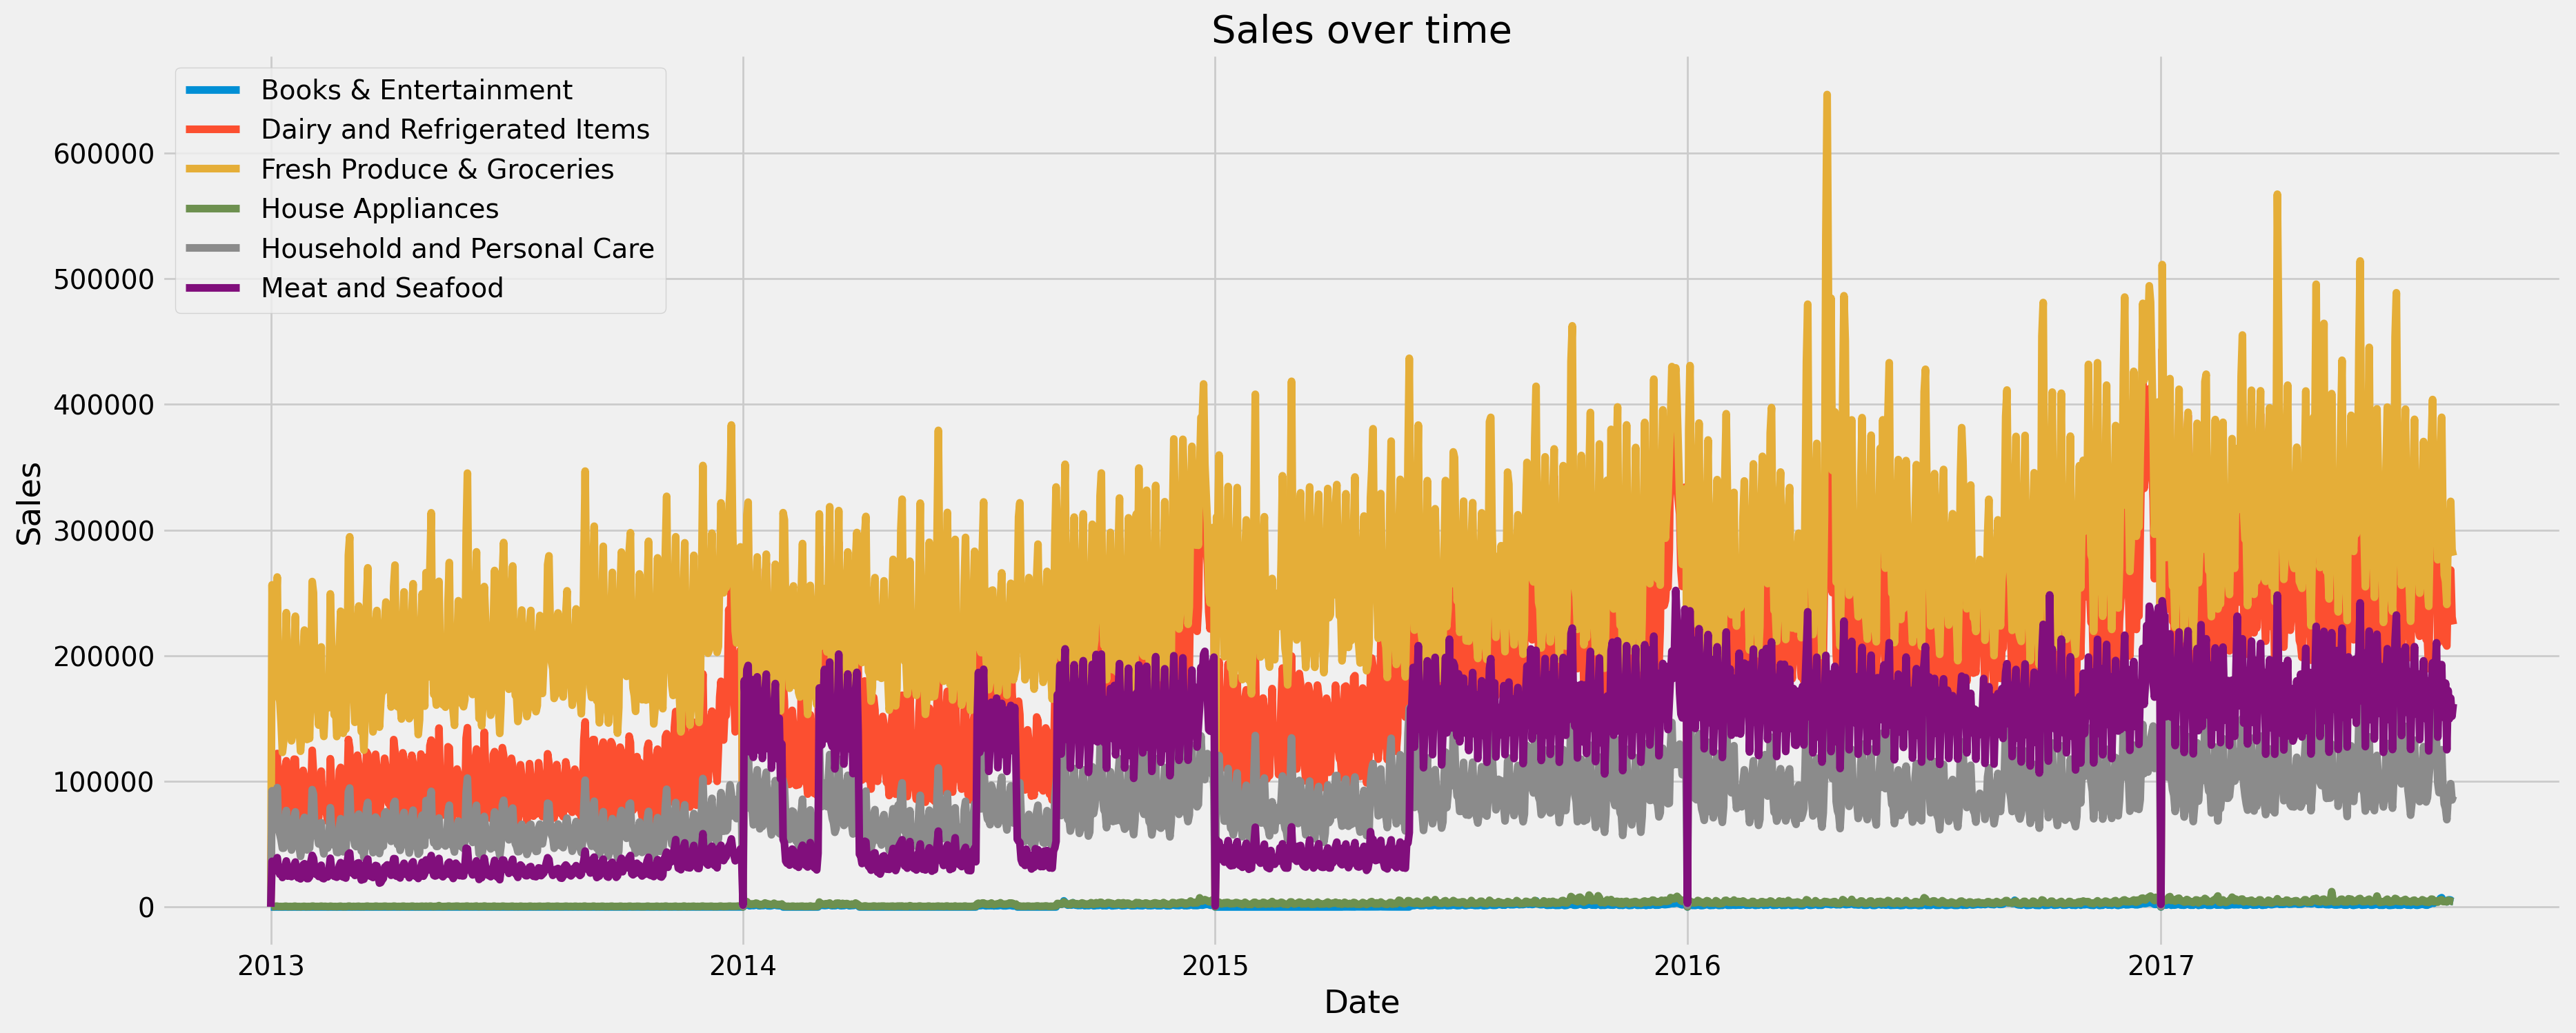

In [29]:
view_sales_by_cat = sales_important.groupby(['date','category'])['sales'].sum().unstack()
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(view_sales_by_cat)

plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(view_sales_by_cat.columns)

plt.show()

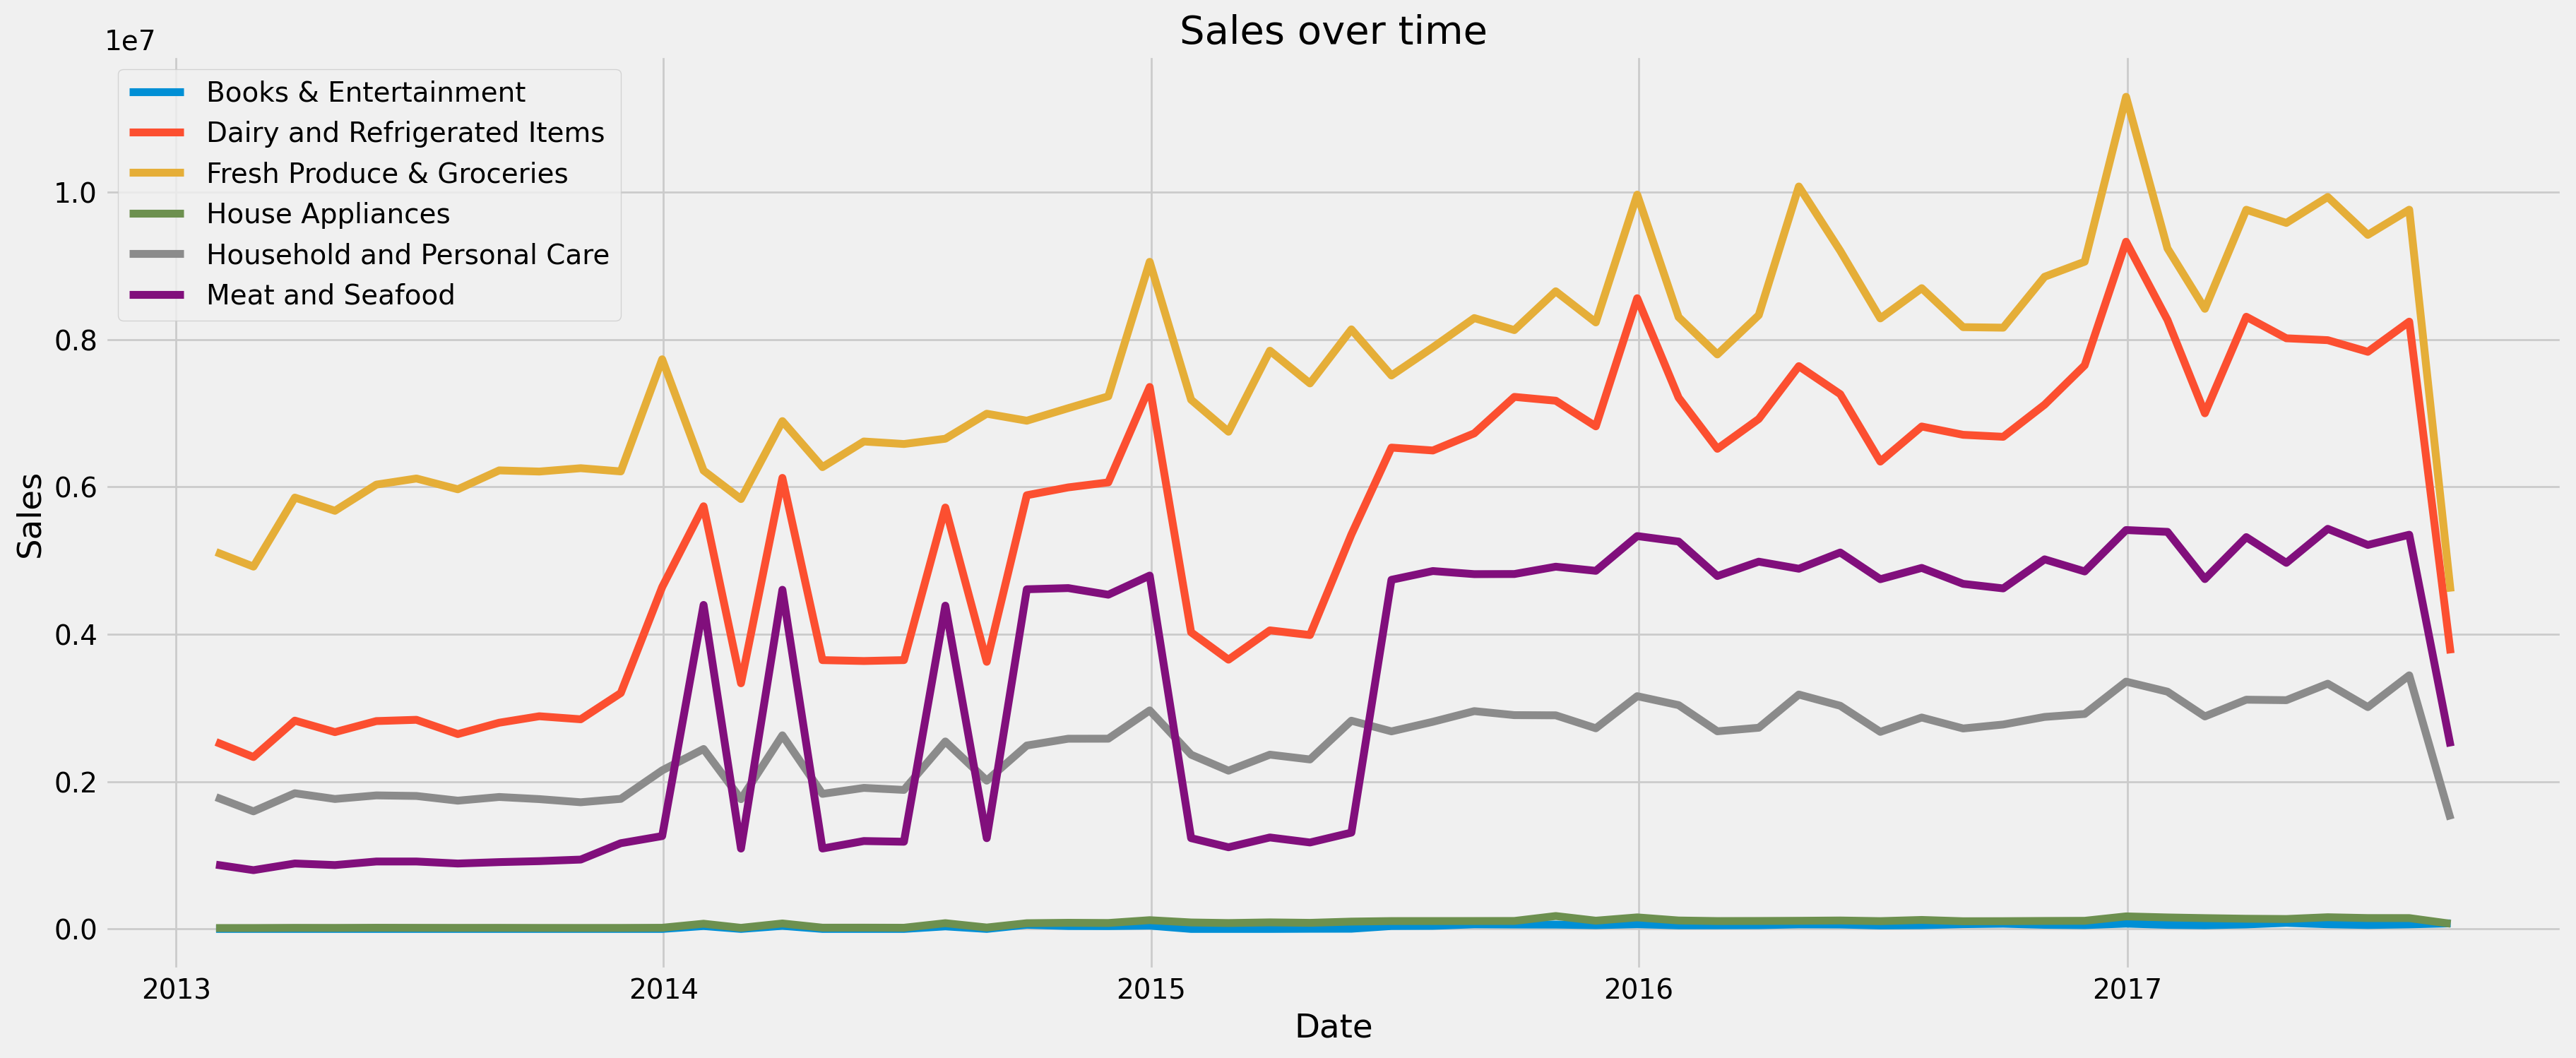

In [30]:
monthly_sales = view_sales_by_cat.resample('m').sum()

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(monthly_sales)

plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(monthly_sales.columns)


plt.show()

In [31]:
sales_important.drop('family',axis=1,inplace=True)

In [32]:
sales_important

id       date  store_nbr     sales  onpromotion  \
0              0 2013-01-01          1     0.000            0   
1              1 2013-01-01          1     0.000            0   
2              2 2013-01-01          1     0.000            0   
3              3 2013-01-01          1     0.000            0   
4              4 2013-01-01          1     0.000            0   
...          ...        ...        ...       ...          ...   
3000883  3000883 2017-08-15          9   438.133            0   
3000884  3000884 2017-08-15          9   154.553            1   
3000885  3000885 2017-08-15          9  2419.729          148   
3000886  3000886 2017-08-15          9   121.000            8   
3000887  3000887 2017-08-15          9    16.000            0   

                             category  
0                    House Appliances  
1         Household and Personal Care  
2         Household and Personal Care  
3        Dairy and Refrigerated Items  
4               Books & Entertainment  
...                               ...  
3000883              Meat and Seafood  
3000884  Dairy and Refrigerated Items  
3000885              Meat and Seafood  
3000886         Books & Entertainment  
3000887              Meat and Seafood  

[3000888 rows x 6 columns]

In [33]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'category' is the column containing your categorical data
le = LabelEncoder()
sales_important['category_encoded'] = le.fit_transform(sales_important['category'])

In [34]:
sales_important = pd.merge(sales_important, holidays[['date','holiday']], how='left' , on='date')

In [35]:
sales_important['holiday'].fillna(False,inplace=True)

In [36]:
sales_important['holiday_bool'] = sales_important['holiday'].astype(int)

In [37]:
sales_train = sales_important[['id','store_nbr','sales','onpromotion','category_encoded','holiday_bool']]

In [38]:
sales_train

id  store_nbr     sales  onpromotion  category_encoded  \
0              0          1     0.000            0                 3   
1              1          1     0.000            0                 4   
2              2          1     0.000            0                 4   
3              3          1     0.000            0                 1   
4              4          1     0.000            0                 0   
...          ...        ...       ...          ...               ...   
3054343  3000883          9   438.133            0                 5   
3054344  3000884          9   154.553            1                 1   
3054345  3000885          9  2419.729          148                 5   
3054346  3000886          9   121.000            8                 0   
3054347  3000887          9    16.000            0                 5   

         holiday_bool  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
3054343             1  
3054344             1  
3054345             1  
3054346             1  
3054347             1  

[3054348 rows x 6 columns]

In [39]:
sales_train['sales'].max()

124717.0

In [40]:
sales_train.set_index(['id','store_nbr'],inplace=True)

In [41]:
sales_train.corr()

sales  onpromotion  category_encoded  holiday_bool
sales             1.000000     0.428241     -4.179748e-03  1.396432e-02
onpromotion       0.428241     1.000000      2.435272e-02  1.898875e-02
category_encoded -0.004180     0.024353      1.000000e+00  1.041765e-15
holiday_bool      0.013964     0.018989      1.041765e-15  1.000000e+00

### - Selecting feature while ignoring time-series

In [42]:
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LogisticRegression #machine learning
from sklearn.linear_model import LinearRegression #machine learning
from sklearn.metrics import mean_squared_error #model evaluation
from sklearn.metrics import mean_squared_log_error

y = sales_train['sales'].values
X = sales_train.drop(['sales'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### Linear Regression

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)


msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Log Error:", msle)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

Mean Squared Log Error: 14.068507707686898
0.18448804865175816
0.18023054330344612


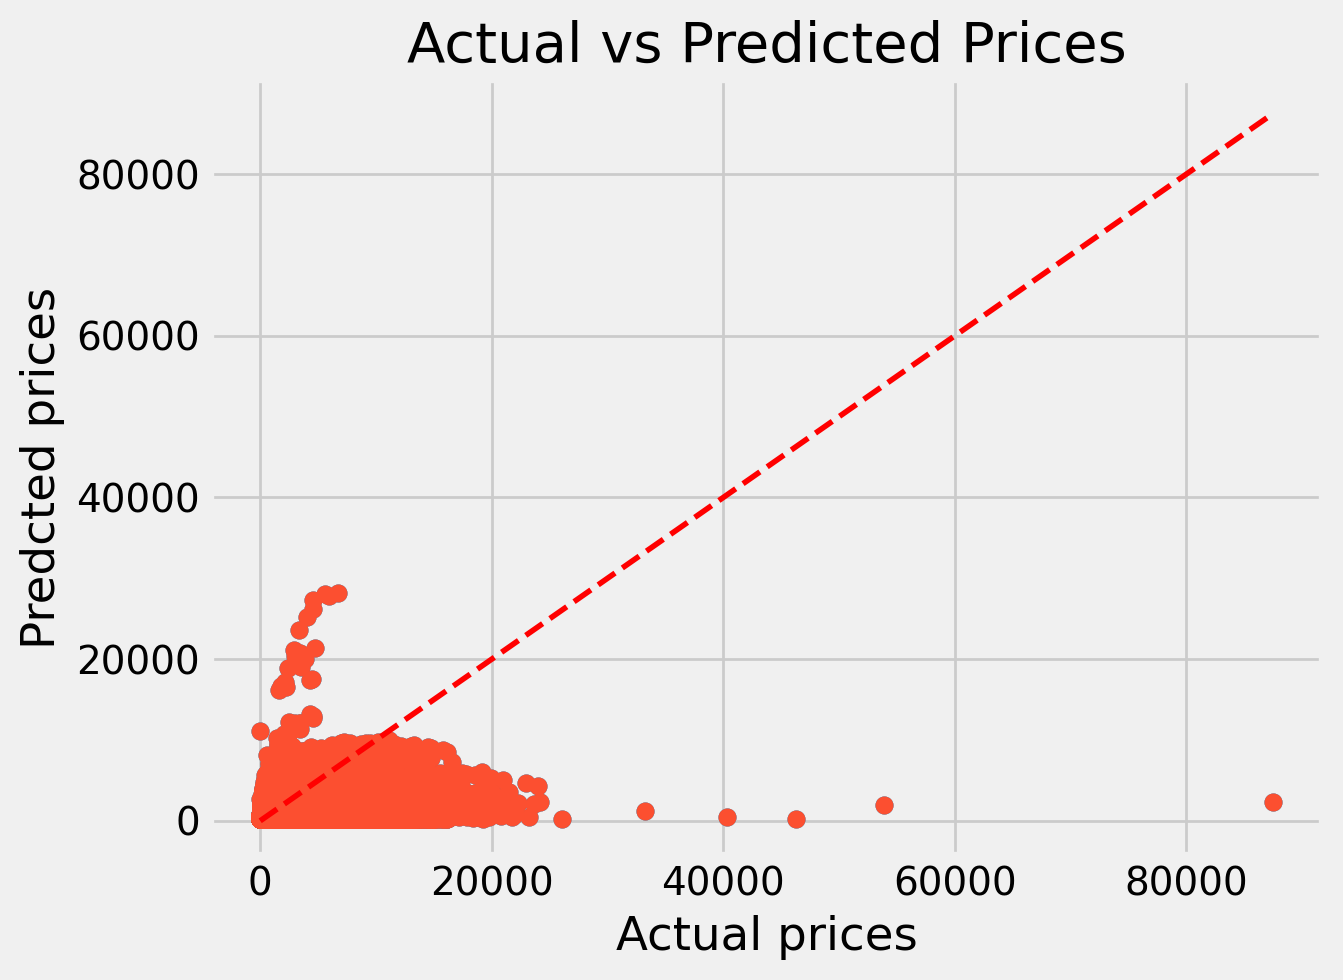

In [45]:
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)], color='red',
        linestyle='--', linewidth=2,label='Perfect Prediction')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predcted prices')
plt.title('Actual vs Predicted Prices')
plt.show()

#### RF Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

y = sales_features['sales']
X = sales_features.drop(['sales'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Log Error:", msle)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

Mean Squared Log Error: 0.07179094257958826
0.9031012277067947
-0.3537183502379748


#### Permutation importance using RF Regressor

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

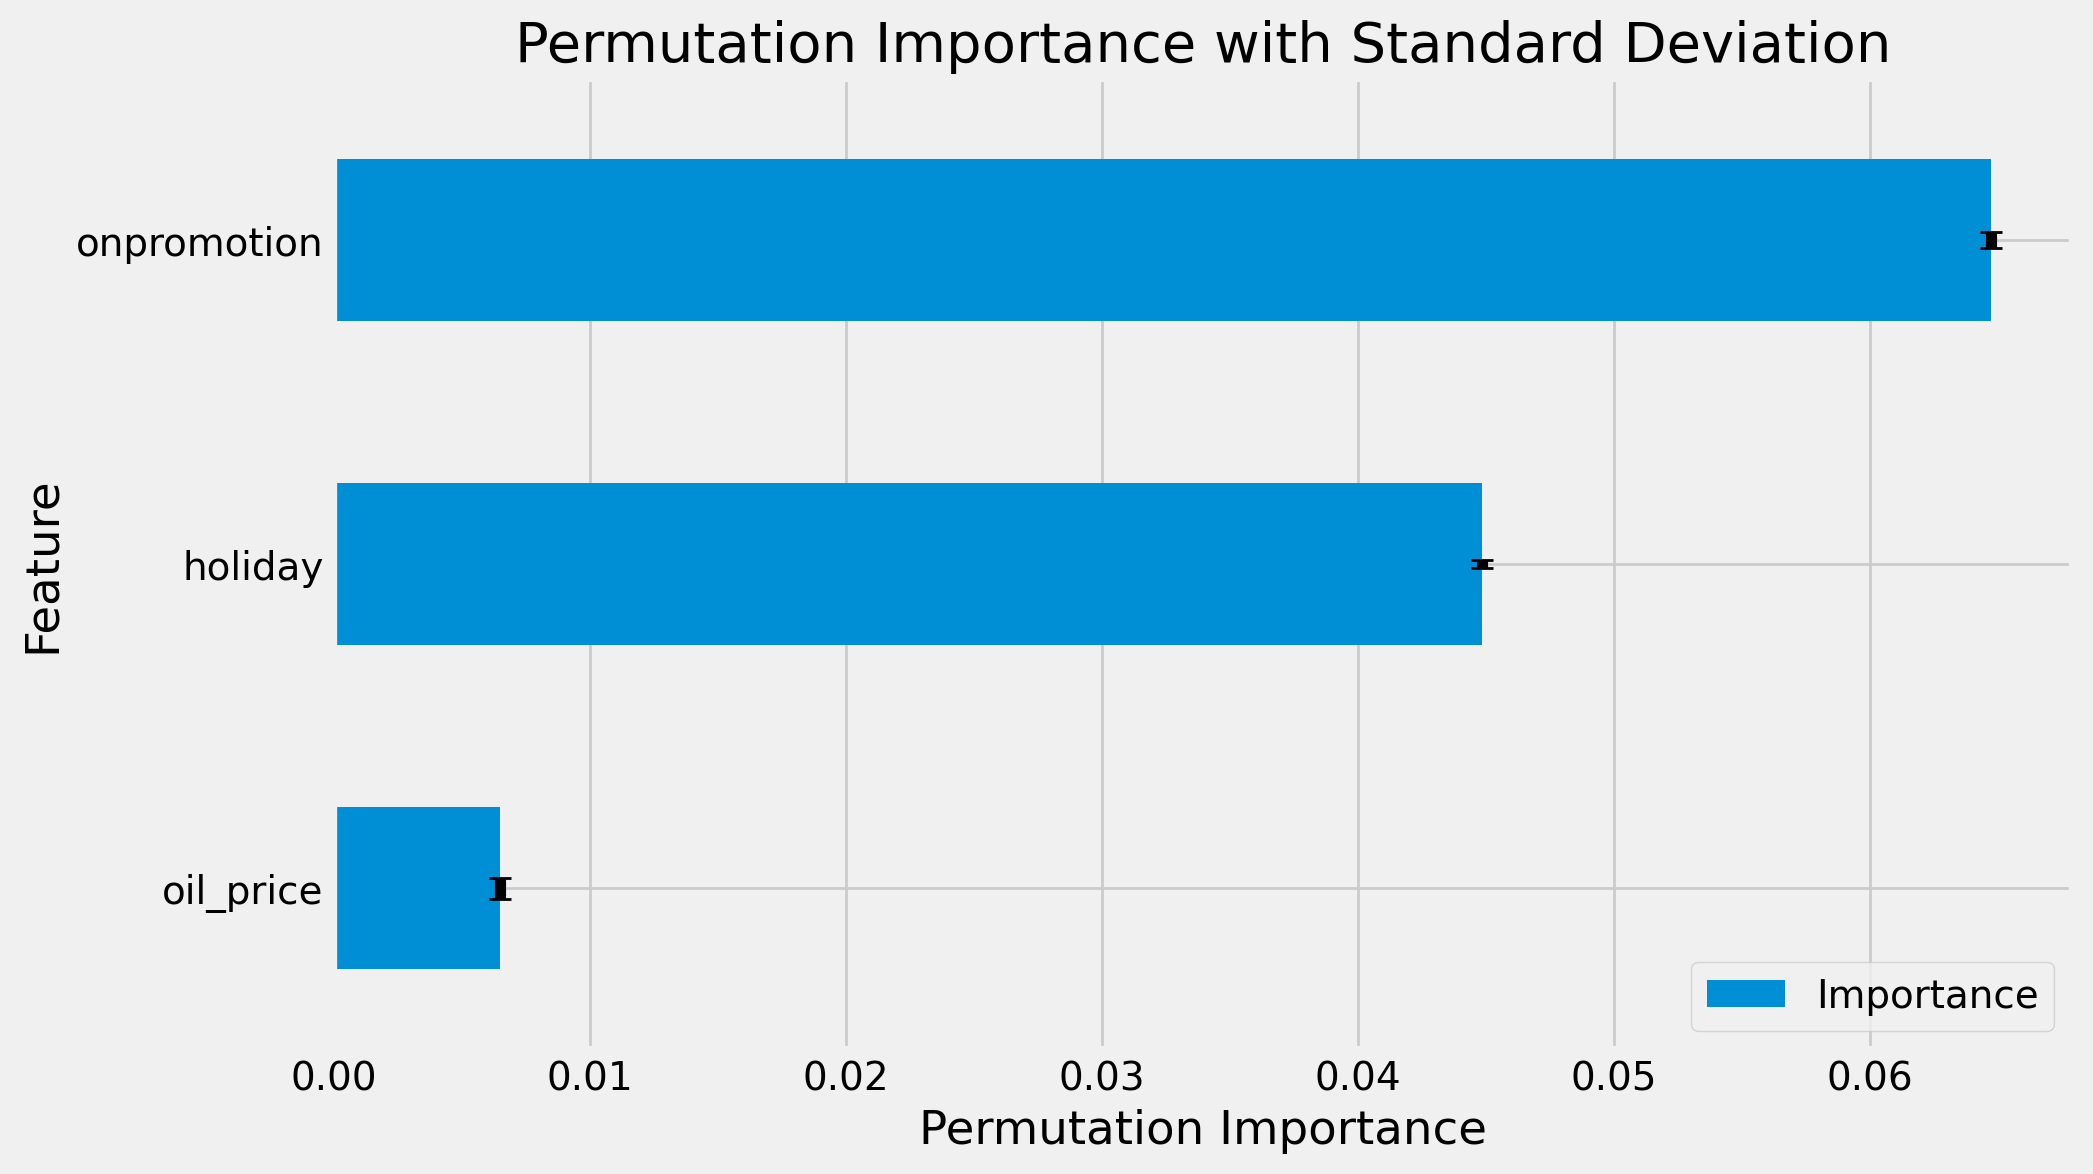

In [47]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

#### Time-series aggregation

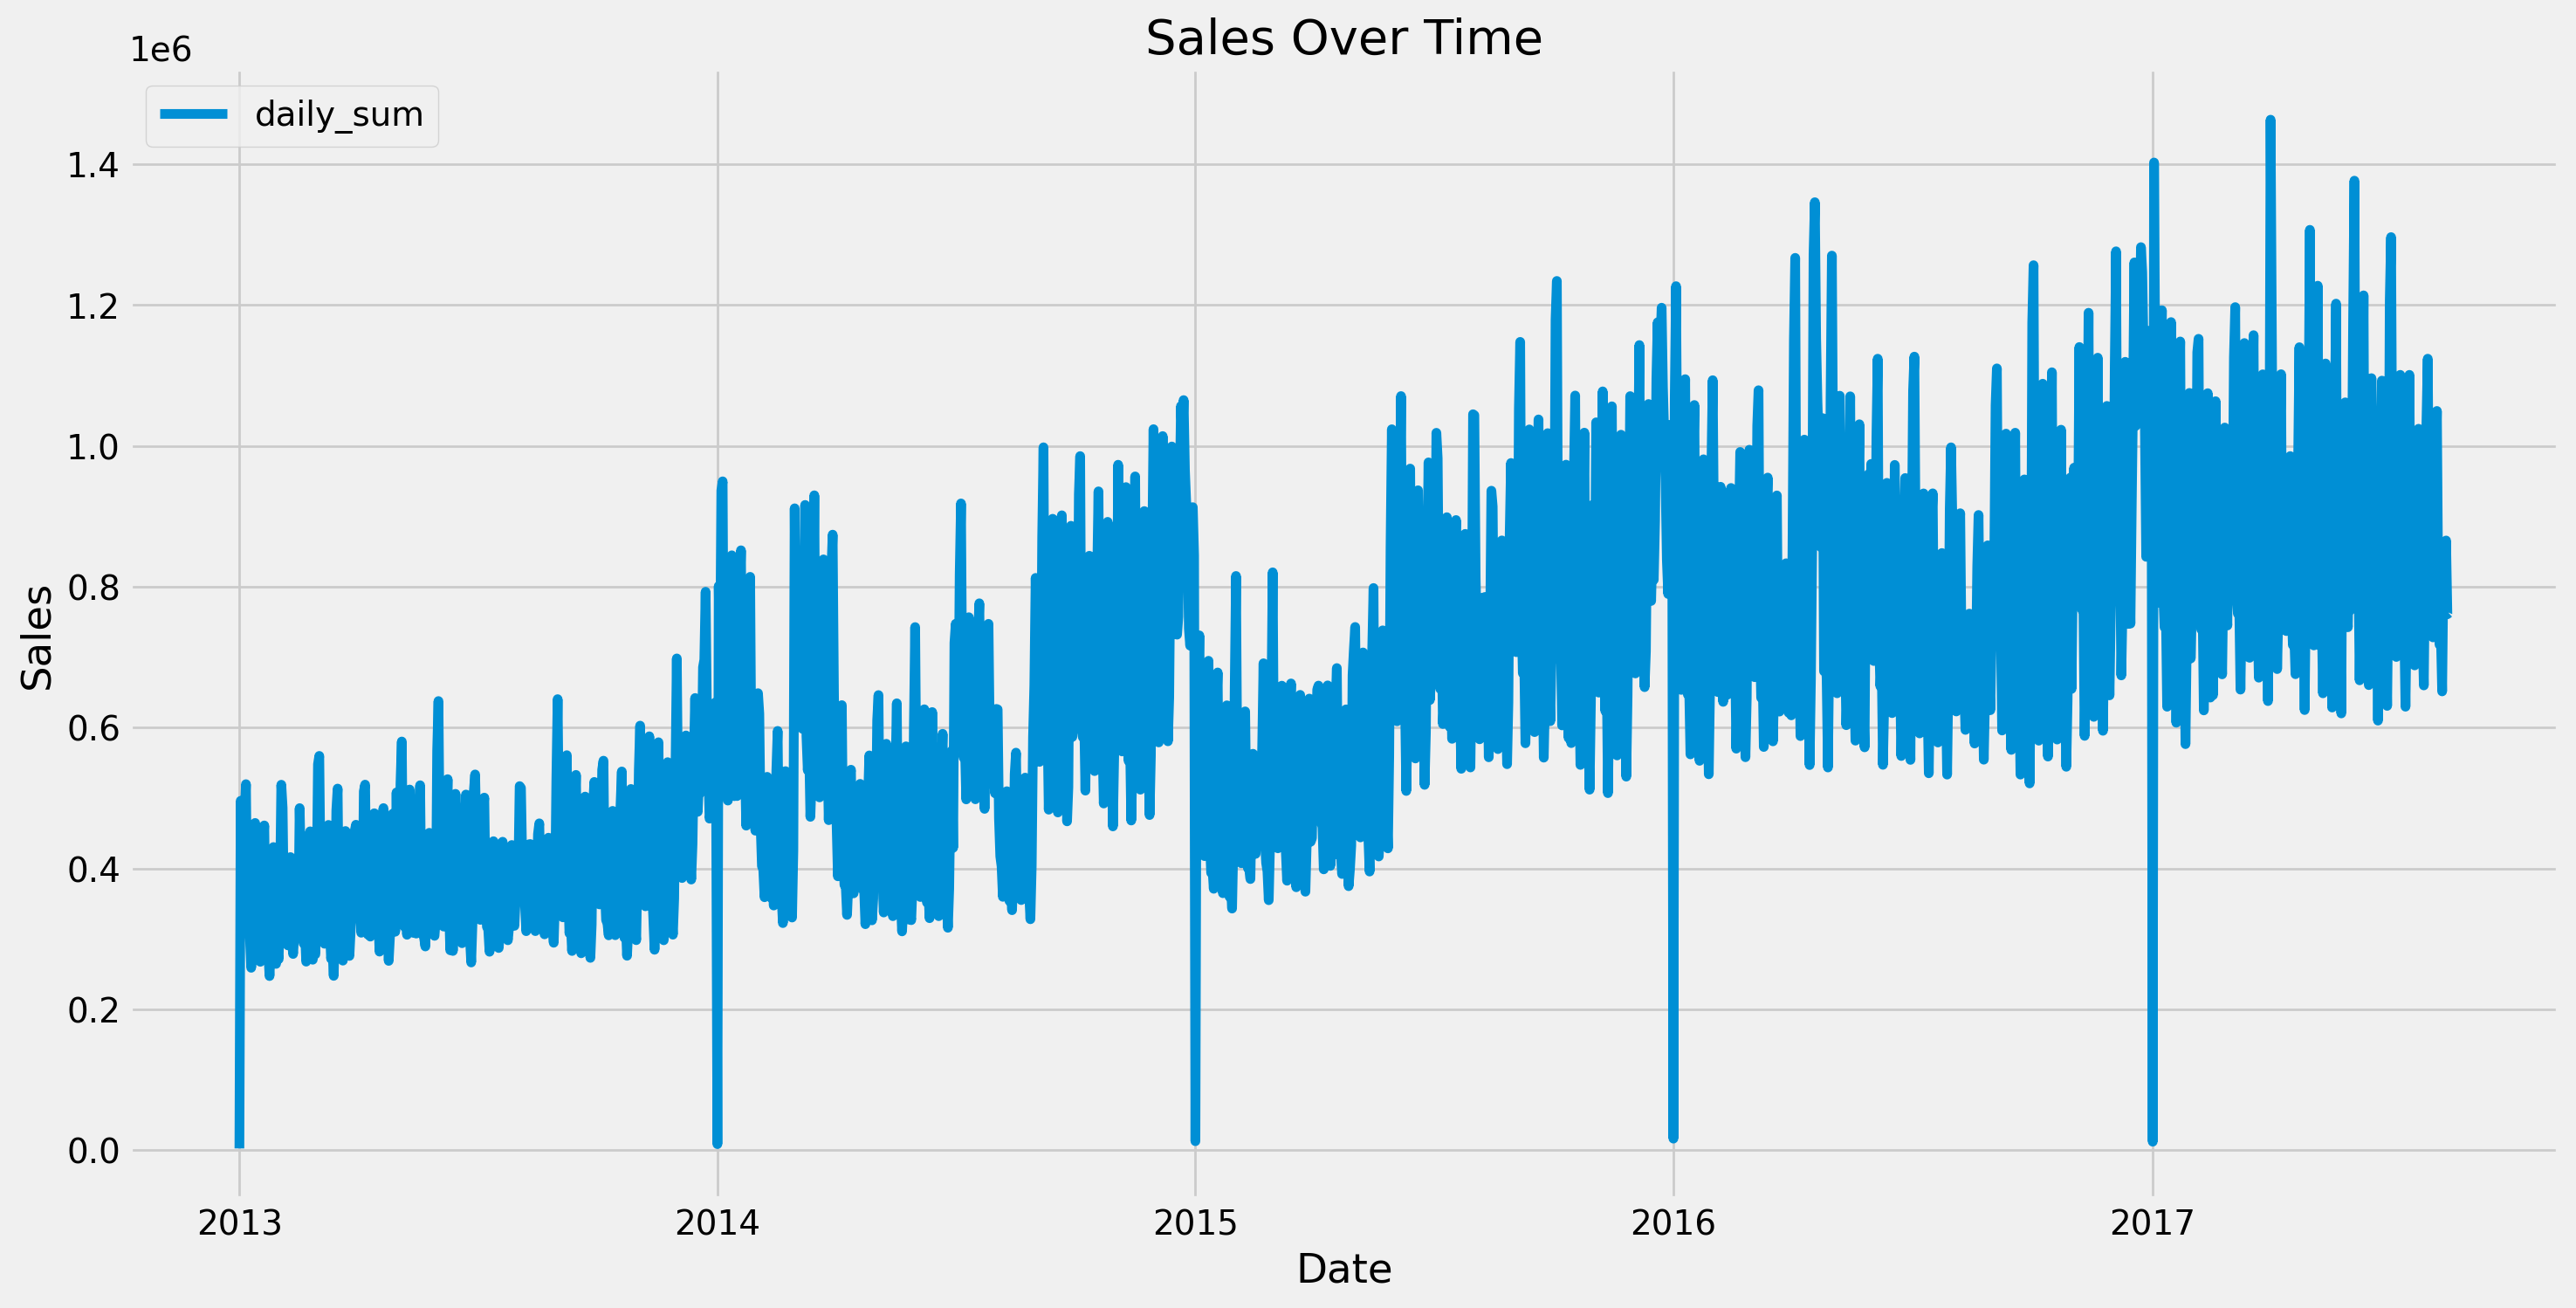

In [48]:
sales_rate = sales_features['sales']

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(sales_rate, label='daily_sum')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')

plt.show()

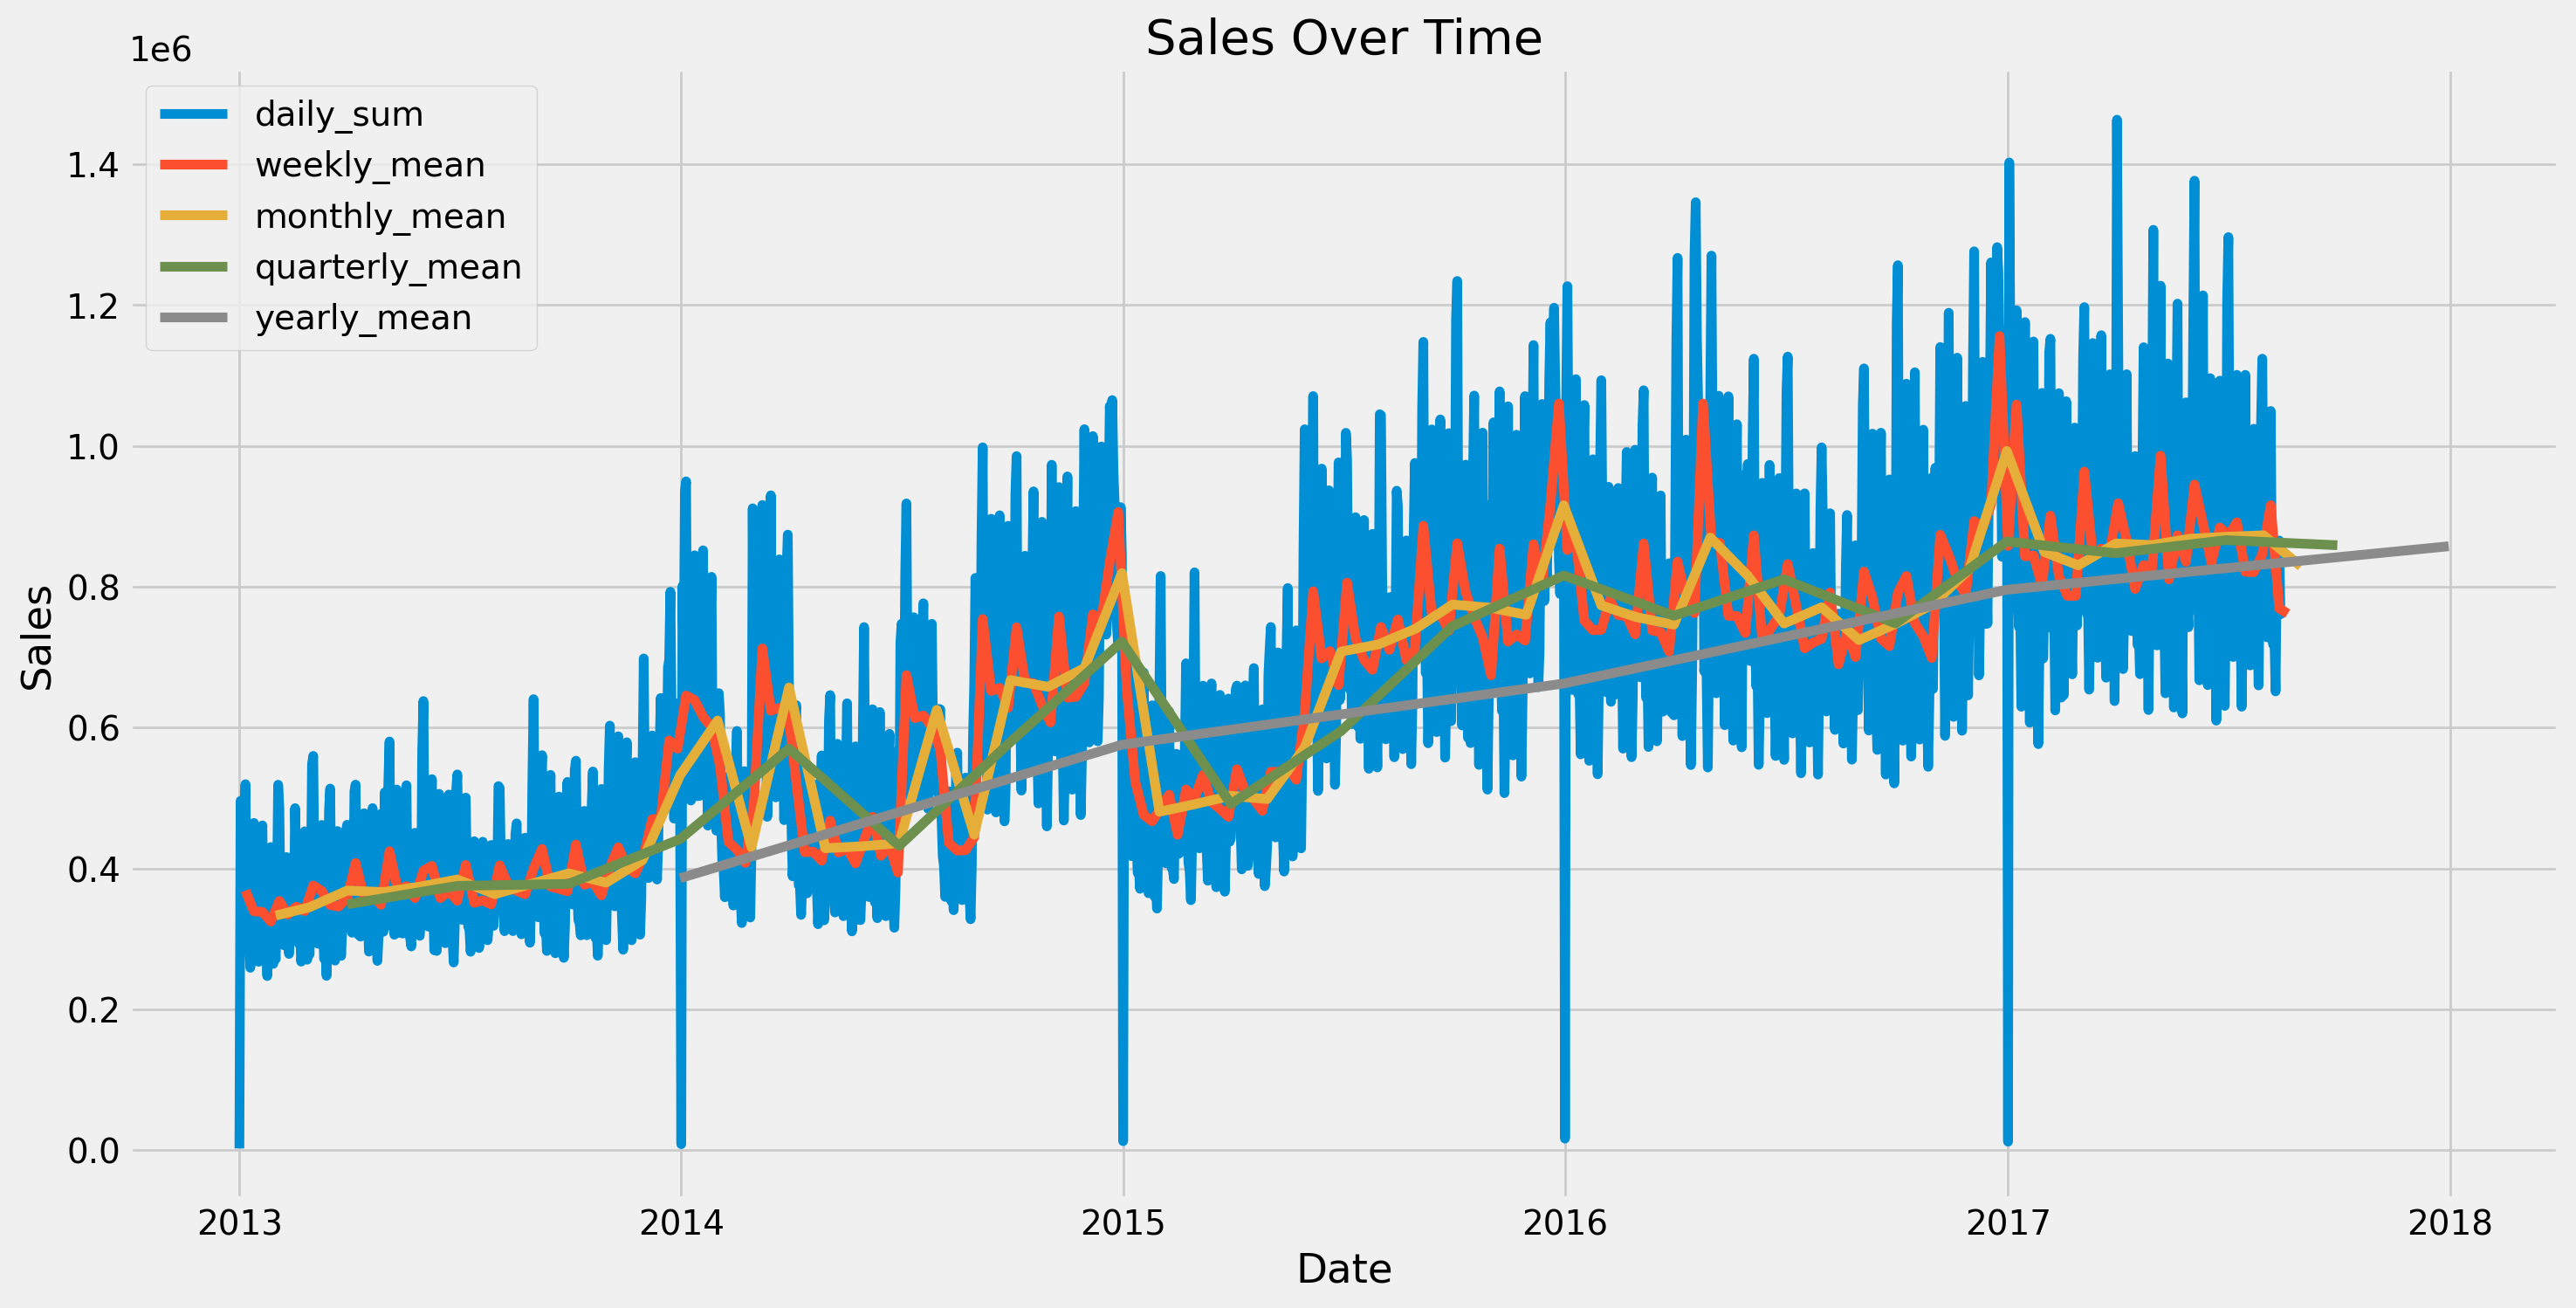

In [49]:
weekly_sales = sales_rate.resample('W').mean()
monthly_sales = sales_rate.resample('M').mean()
quarterly_sales = sales_rate.resample('Q').mean()
yearly_sales = sales_rate.resample('A').mean()

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(sales_rate, label='daily_sum')
ax.plot(weekly_sales, label='weekly_mean')
ax.plot(monthly_sales,label='monthly_mean')
ax.plot(quarterly_sales,label='quarterly_mean')
ax.plot(yearly_sales,label='yearly_mean')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')

plt.show()

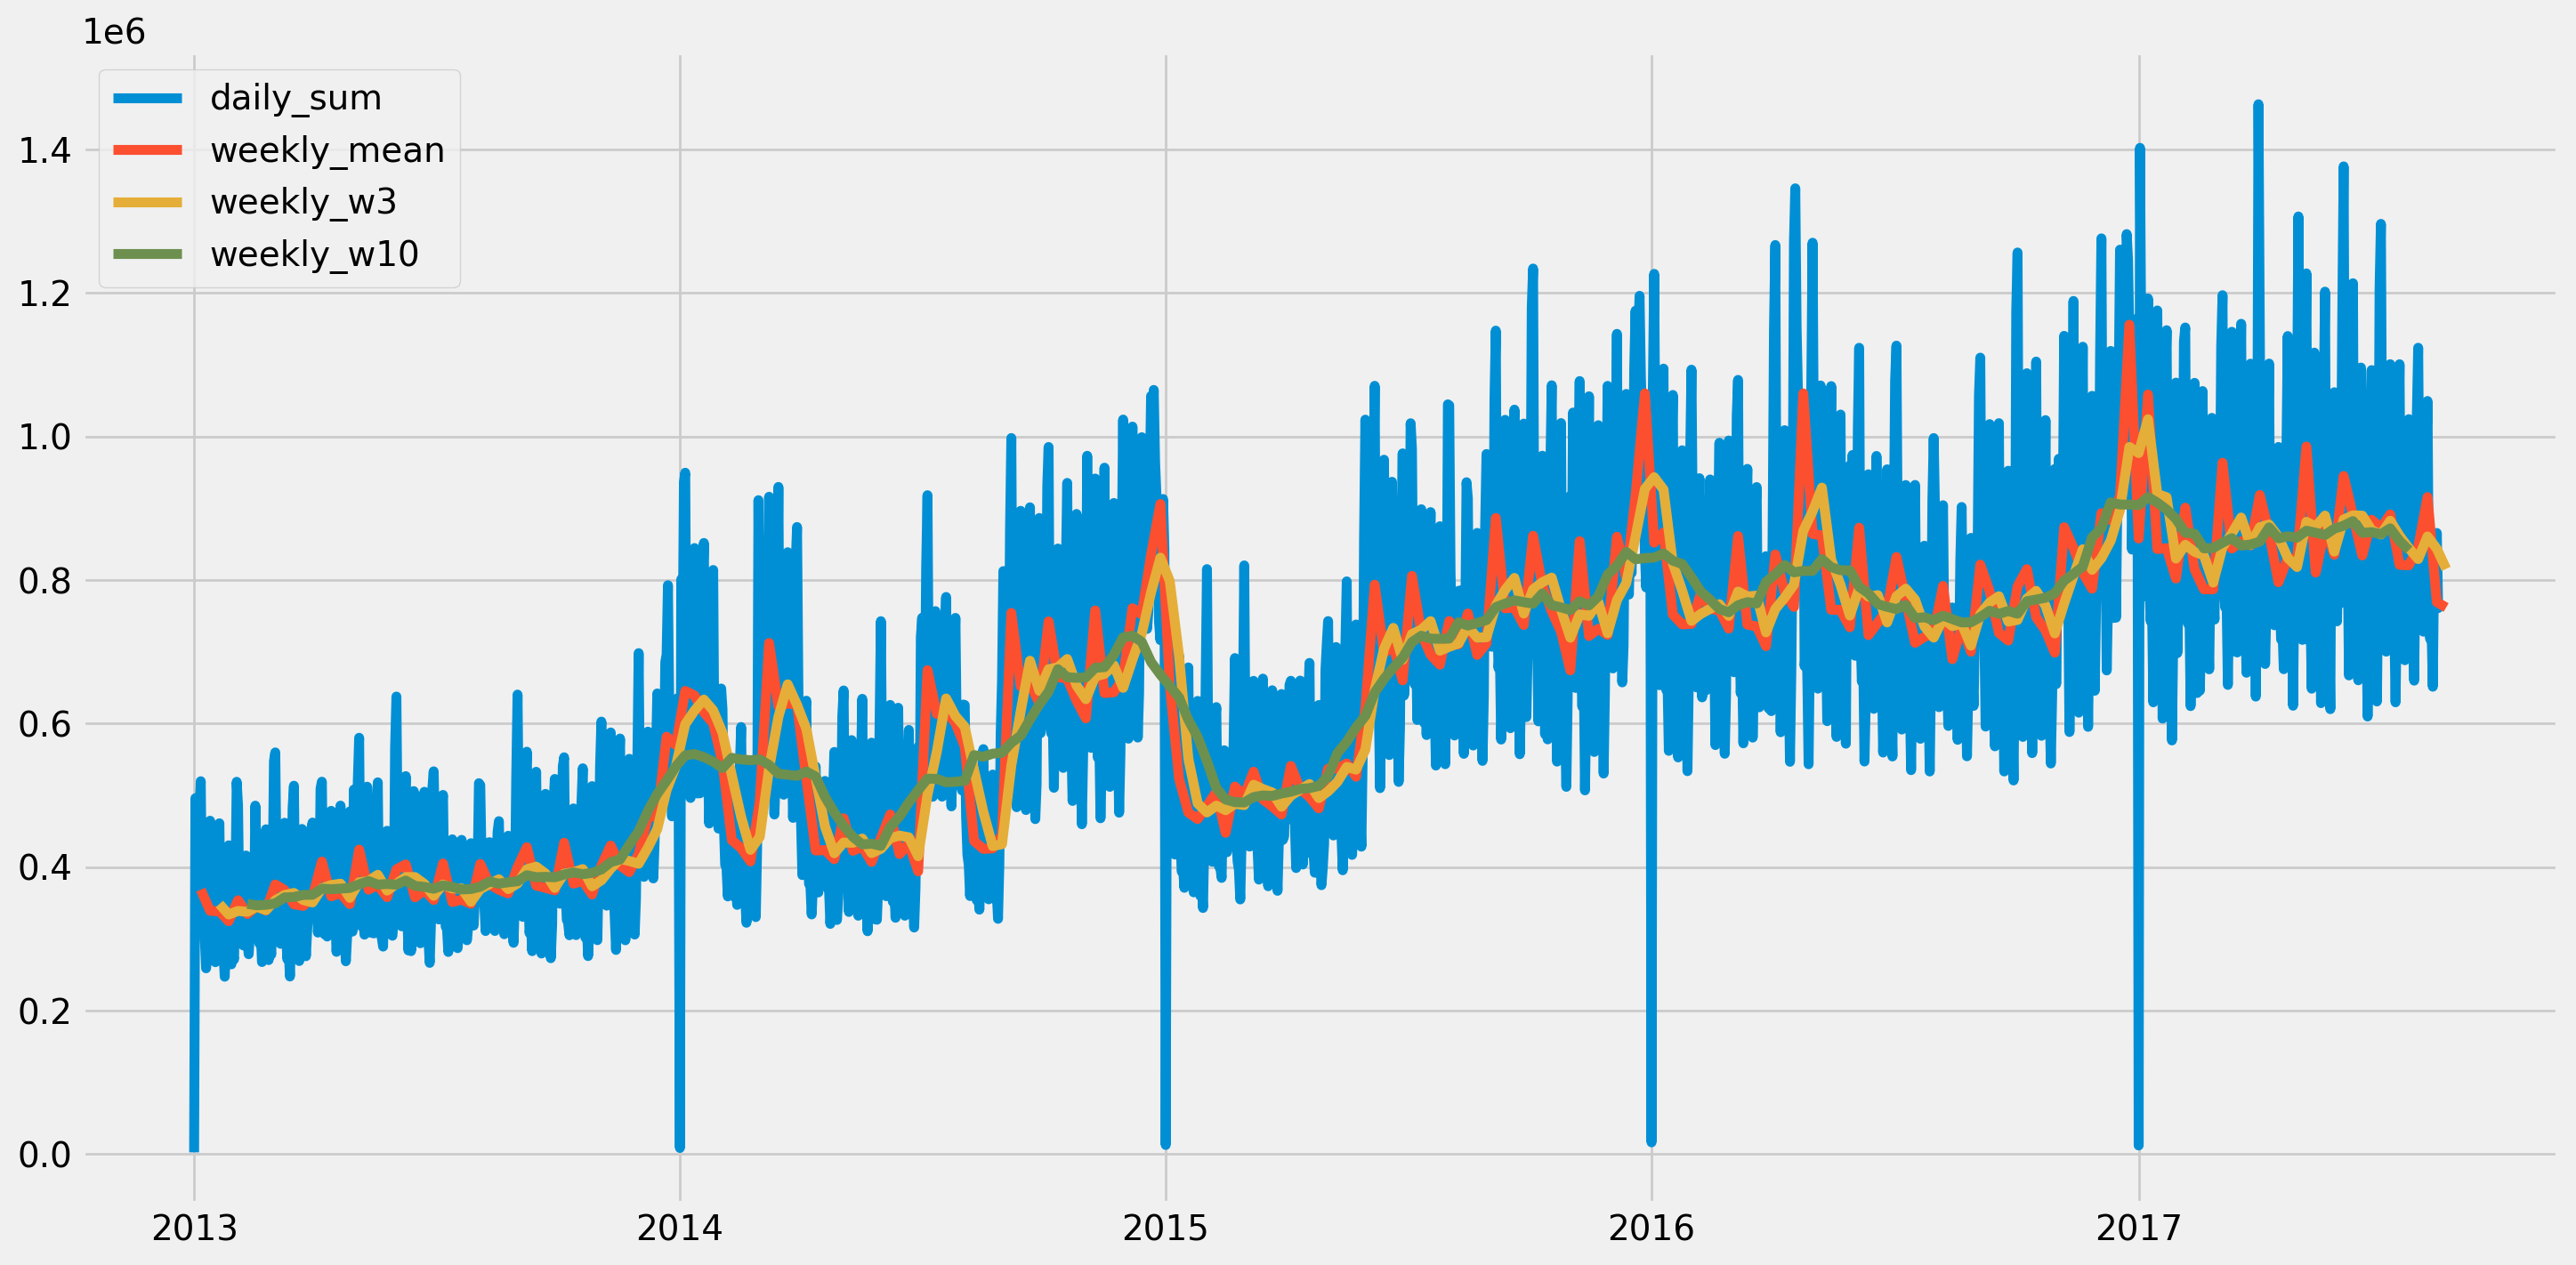

In [50]:
weekly_w3 = weekly_sales.rolling(window=3, center=False).mean()
weekly_w10 = weekly_sales.rolling(window=10, center=True).mean()

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(sales_rate, label='daily_sum')
ax.plot(weekly_sales, label='weekly_mean')
ax.plot(weekly_w3, label='weekly_w3')
ax.plot(weekly_w10, label='weekly_w10')
ax.legend()
plt.show()

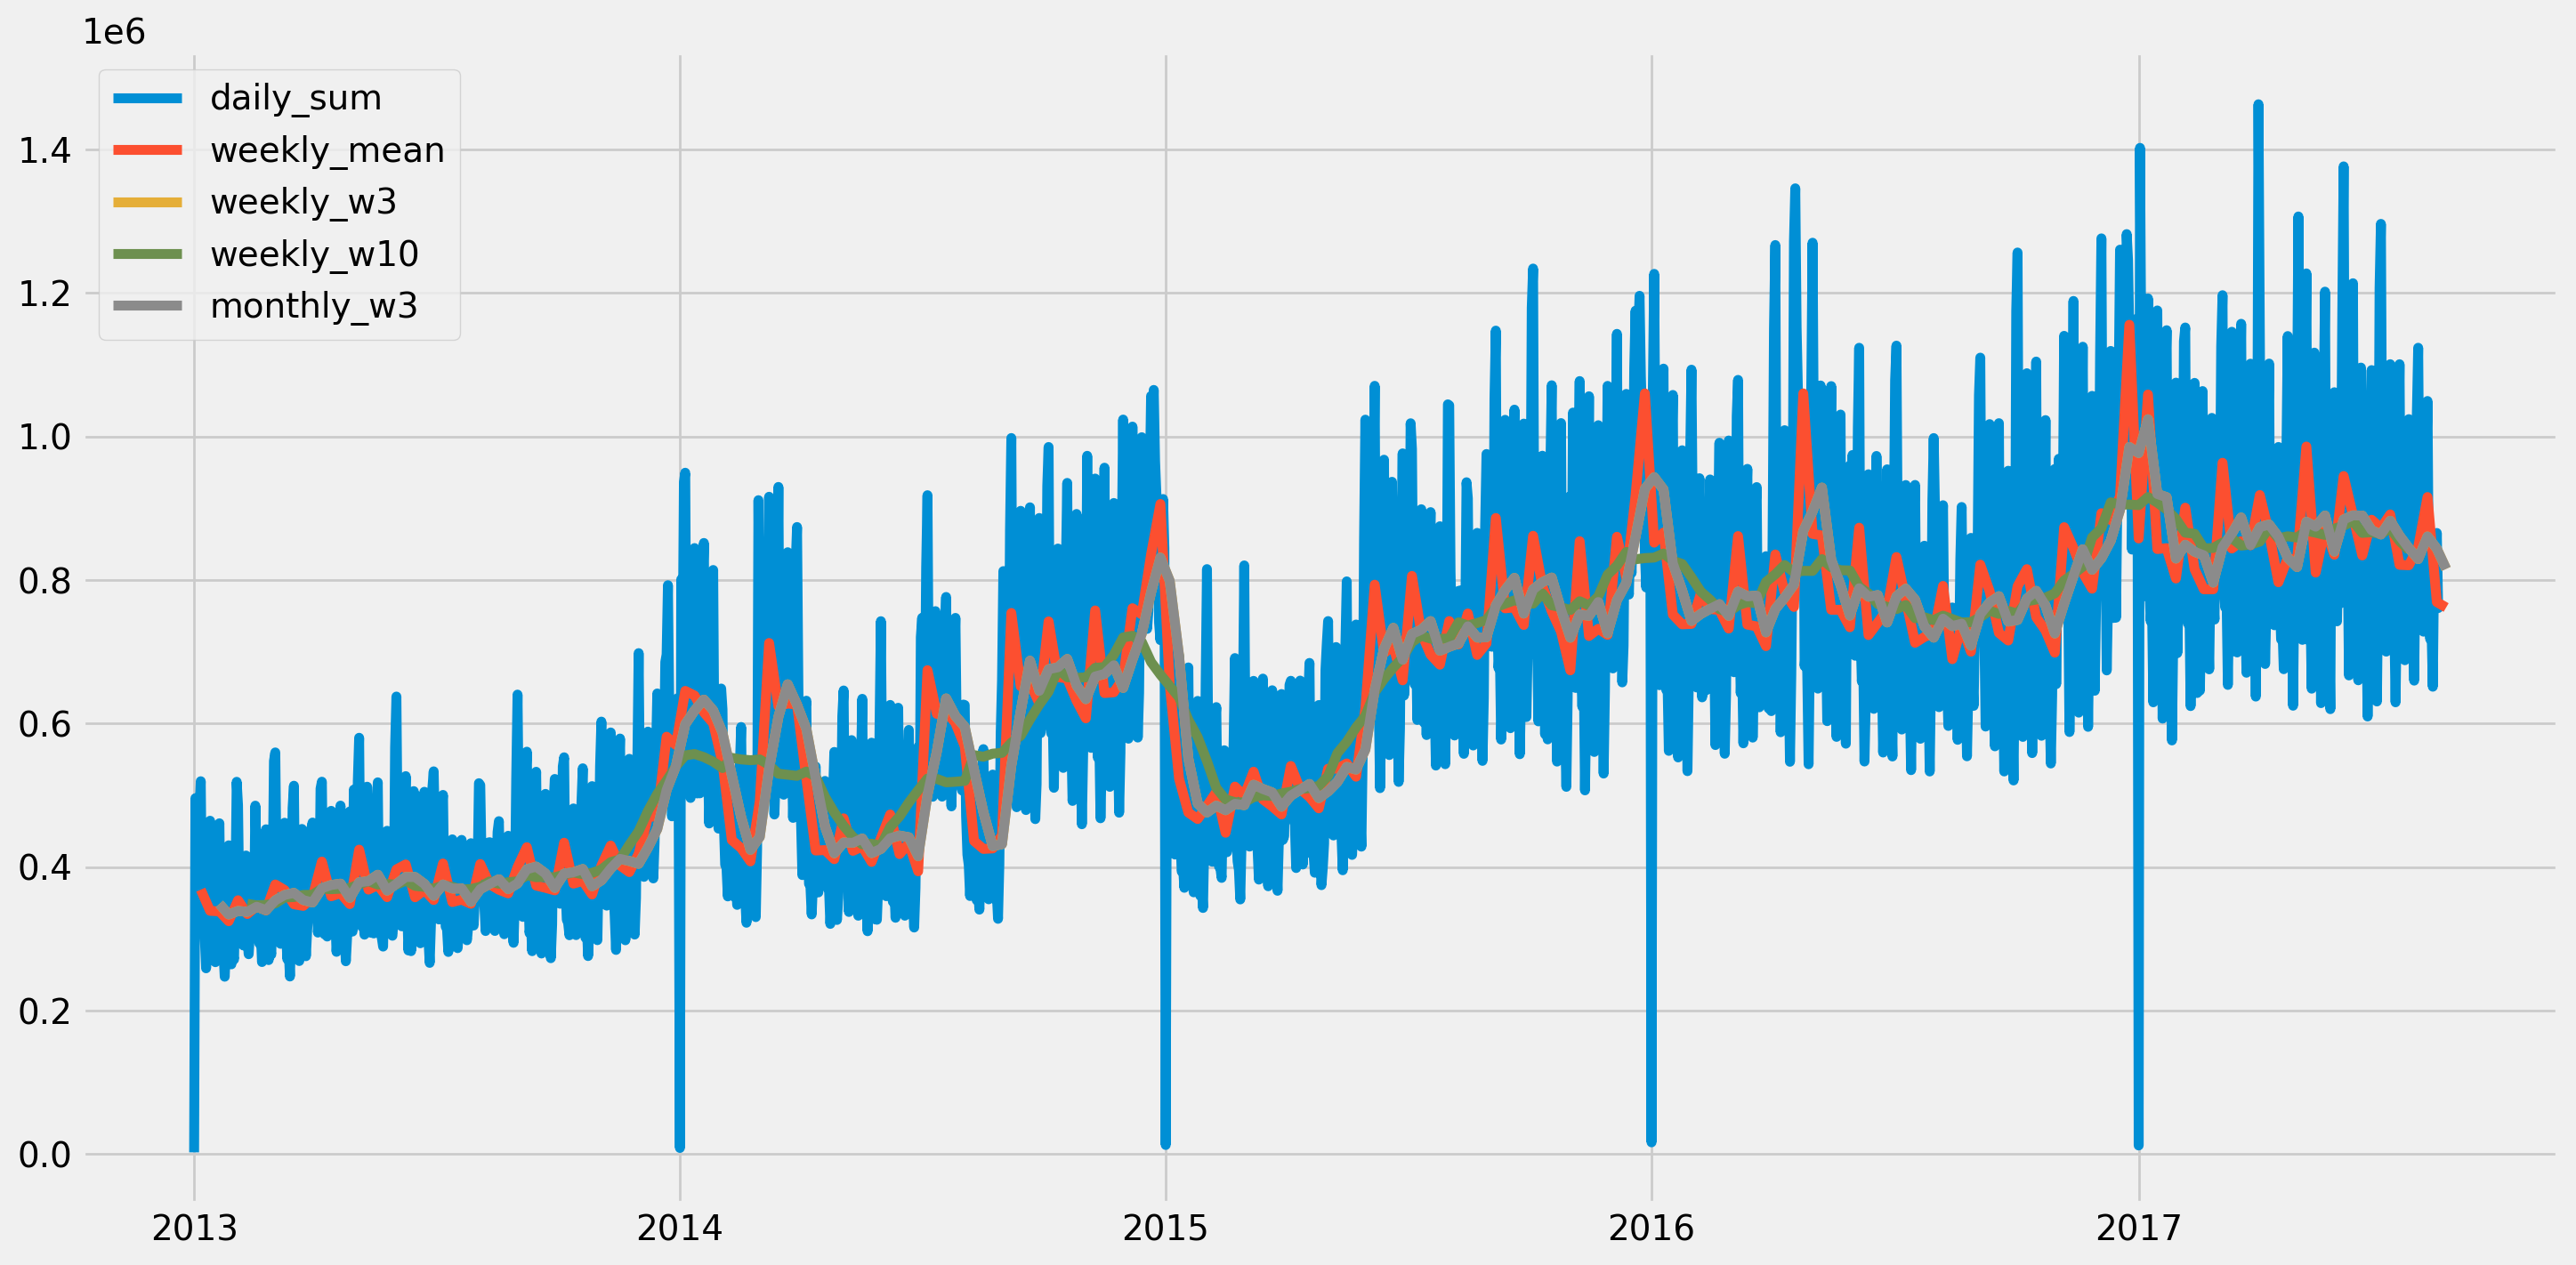

In [51]:
monthly_w3 = weekly_sales.rolling(window=3, center=False).mean()

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(sales_rate, label='daily_sum')
ax.plot(weekly_sales, label='weekly_mean')
ax.plot(weekly_w3, label='weekly_w3')
ax.plot(weekly_w10, label='weekly_w10')
ax.plot(monthly_w3, label='monthly_w3')
ax.legend()
plt.show()

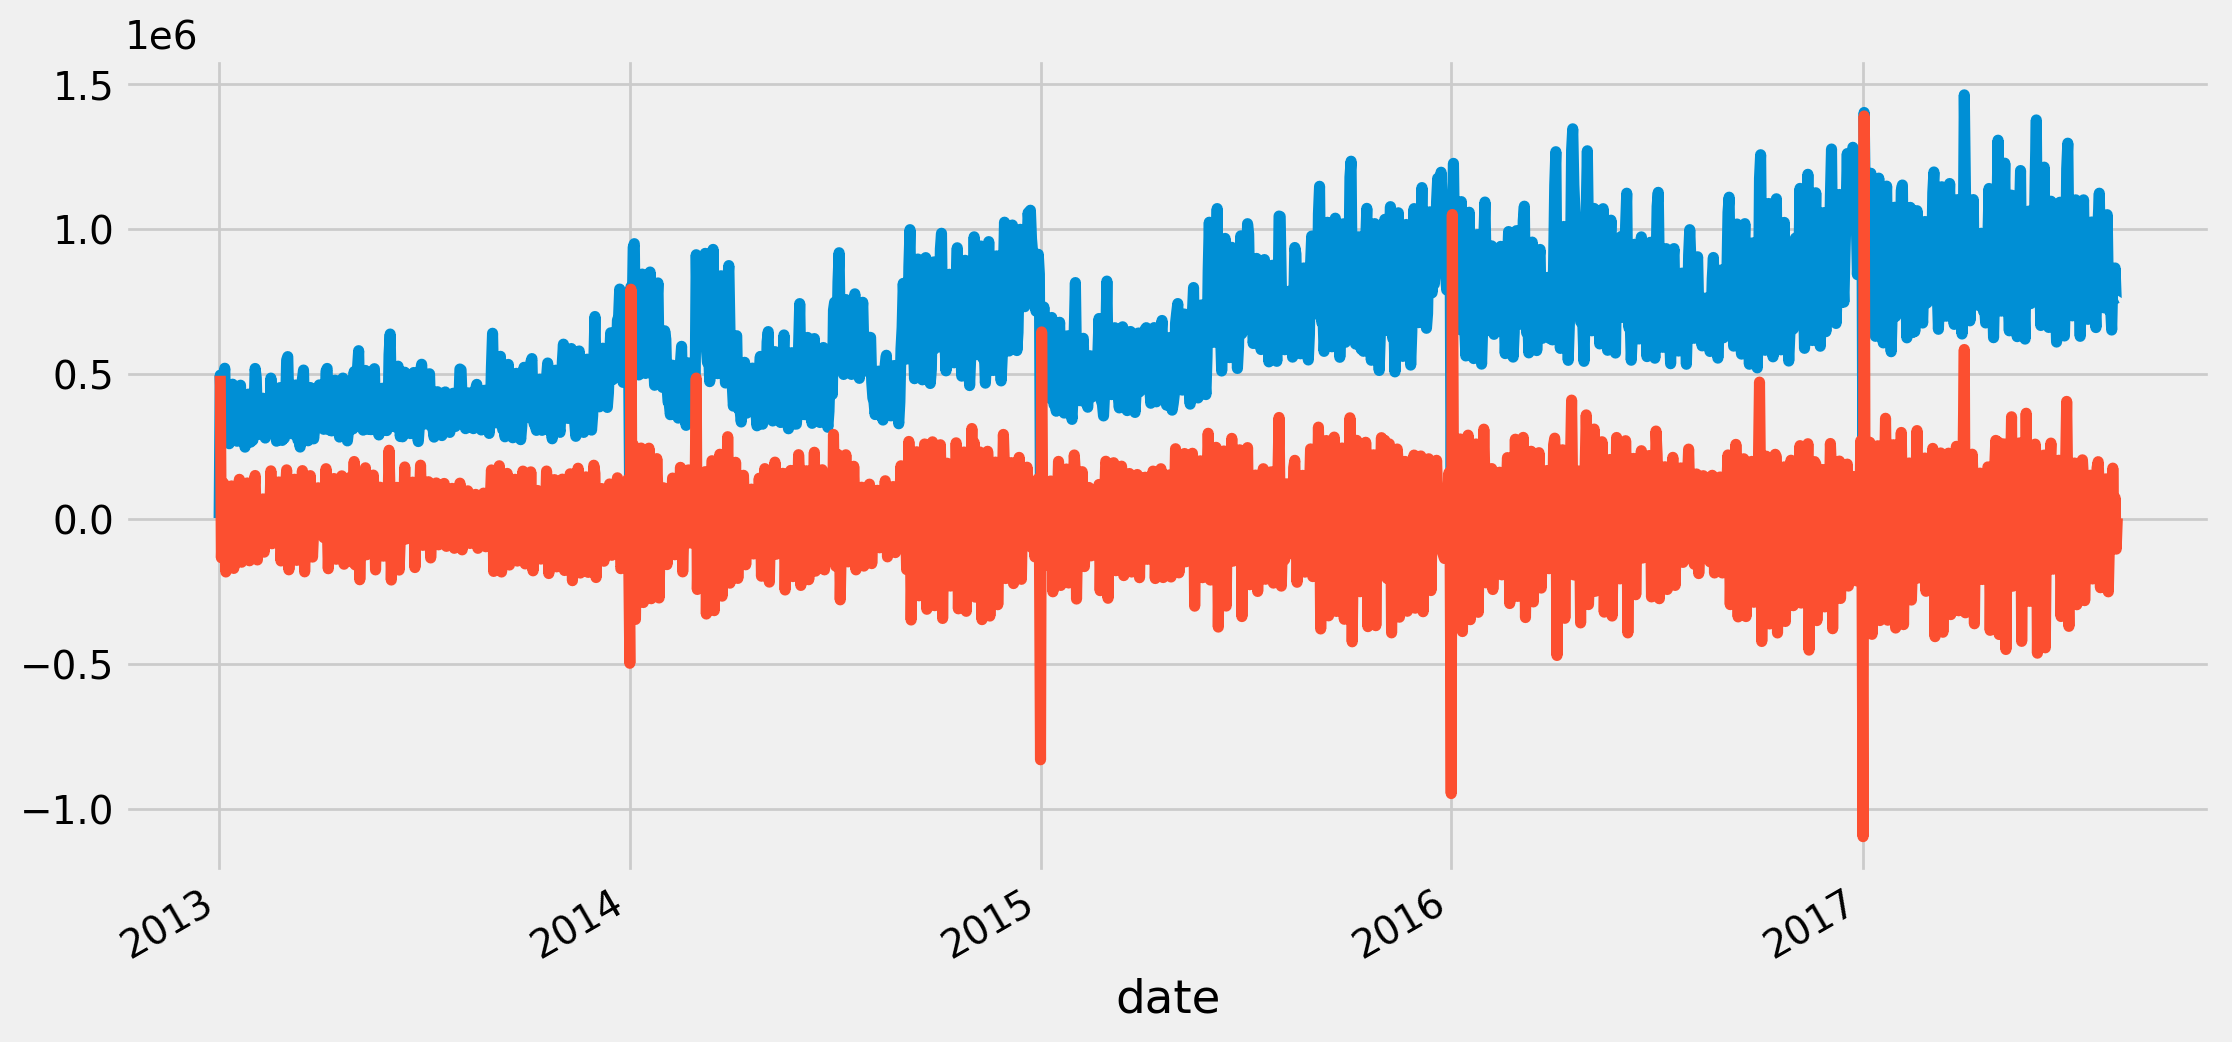

In [52]:
plt.figure(figsize=(12,6))

# plot the unemployment rate
sales_rate.plot()

# plot the differenced unemployment rate
sales_rate.diff().plot()
plt.show()

## 2. Time series - Forecast modelling

In [53]:
len(sales_features)
train_accuracies = {}
test_accuracies = {}
msle_dict = {}


### 1. Linear regression

In [54]:
sales_features

sales  onpromotion  holiday  oil_price
date                                                      
2013-01-01    2511.618999            0        1      93.14
2013-01-02  496092.417944            0        0      93.14
2013-01-03  361461.231124            0        0      92.97
2013-01-04  354459.677093            0        0      93.12
2013-01-05  477350.121229            0        1      93.20
...                   ...          ...      ...        ...
2017-08-11  826373.722022        14179        1      48.81
2017-08-12  792630.535079         8312        0      47.59
2017-08-13  865639.677471         9283        0      47.59
2017-08-14  760922.406081         8043        0      47.59
2017-08-15  762661.935939        10605        1      47.57

[1714 rows x 4 columns]

In [55]:
y = sales_features['sales']
X = sales_features.drop(['sales'], axis=1)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred)

test_accuracies['Linear Regression'] = model.score(X_test, y_test)*100
train_accuracies['Linear Regression'] = model.score(X_train, y_train)*100
msle_dict['Linear Regression'] = msle

print("Mean Squared Log Error:", msle)

print(f"Train Accuracy {train_accuracies['Linear Regression']:.2f}%")
print(f"Test Accuracy {test_accuracies['Linear Regression']:.2f}%")

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
X['predictions'] = np.concatenate([predictions_train,predictions_test])

Mean Squared Log Error: 0.0725201675039842
Train Accuracy 33.56%
Test Accuracy -3.38%


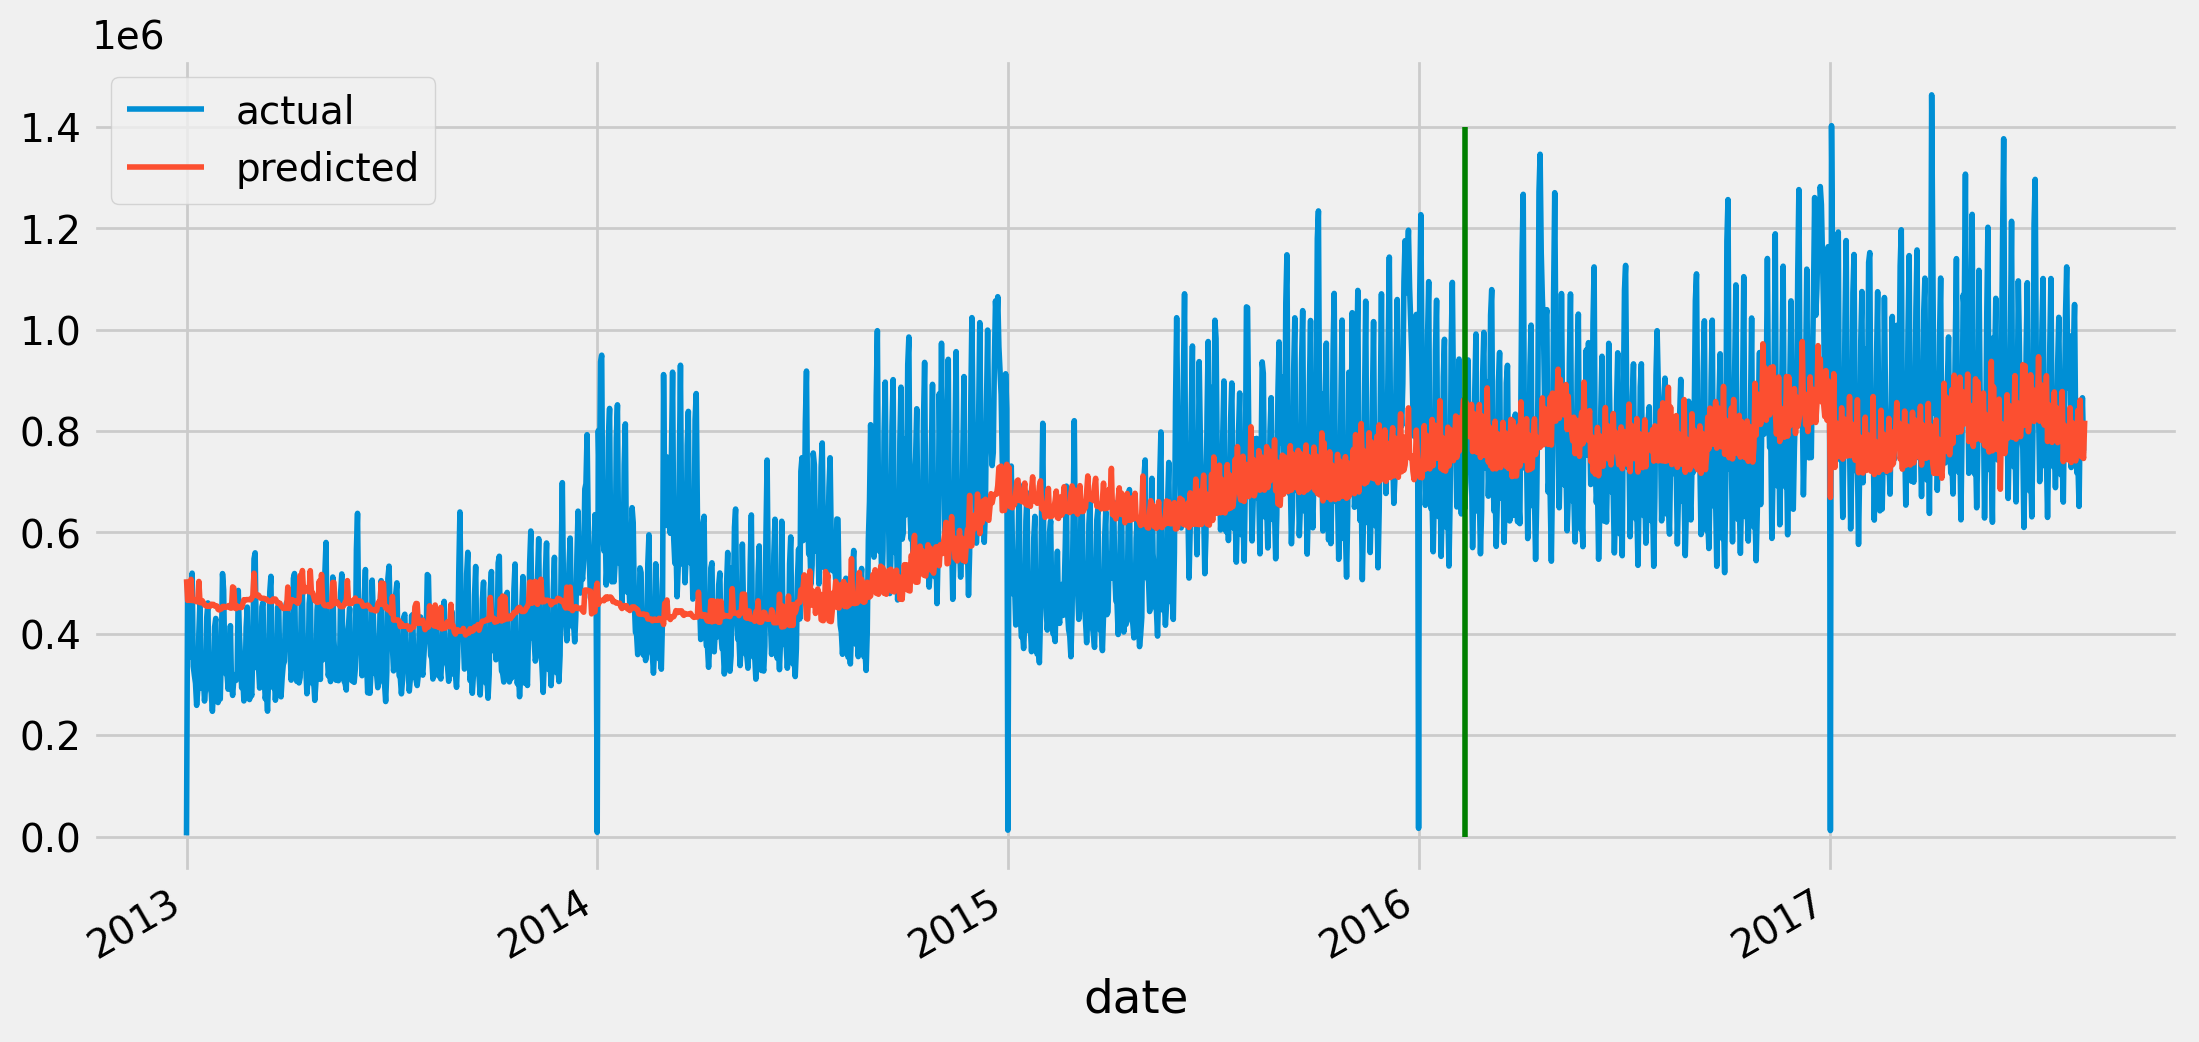

In [57]:
plt.figure(figsize=(12,6))
y.plot( lw=2, label='actual')
X['predictions'].plot(label='predicted', lw=2)

plt.legend()
# we split the training and test set at n
plt.vlines(X_test.index[0], 0,1.4e6, color='g', lw=2)
plt.show()

taking additionally the sales of the day before yesterday as predictors into account.

In [58]:
sales_features

sales  onpromotion  holiday  oil_price
date                                                      
2013-01-01    2511.618999            0        1      93.14
2013-01-02  496092.417944            0        0      93.14
2013-01-03  361461.231124            0        0      92.97
2013-01-04  354459.677093            0        0      93.12
2013-01-05  477350.121229            0        1      93.20
...                   ...          ...      ...        ...
2017-08-11  826373.722022        14179        1      48.81
2017-08-12  792630.535079         8312        0      47.59
2017-08-13  865639.677471         9283        0      47.59
2017-08-14  760922.406081         8043        0      47.59
2017-08-15  762661.935939        10605        1      47.57

[1714 rows x 4 columns]

In [59]:
sales_added_features = sales_features.copy()
sales_added_features['sales_shift_1'] = sales_added_features.sales.shift(1)
sales_added_features['sales_shift_2'] = sales_added_features.sales.shift(2)
X_added_features = sales_added_features[['sales','sales_shift_1','sales_shift_2','onpromotion','holiday','oil_price']].copy()
X_added_features.head()

sales  sales_shift_1  sales_shift_2  onpromotion  holiday  \
date                                                                            
2013-01-01    2511.618999            NaN            NaN            0        1   
2013-01-02  496092.417944    2511.618999            NaN            0        0   
2013-01-03  361461.231124  496092.417944    2511.618999            0        0   
2013-01-04  354459.677093  361461.231124  496092.417944            0        0   
2013-01-05  477350.121229  354459.677093  361461.231124            0        1   

            oil_price  
date                   
2013-01-01      93.14  
2013-01-02      93.14  
2013-01-03      92.97  
2013-01-04      93.12  
2013-01-05      93.20

In [60]:
X_added_features.corr()

sales  sales_shift_1  sales_shift_2  onpromotion   holiday  \
sales          1.000000       0.774368       0.577569     0.578671  0.116708   
sales_shift_1  0.774368       1.000000       0.774333     0.510628  0.109372   
sales_shift_2  0.577569       0.774333       1.000000     0.585900  0.117457   
onpromotion    0.578671       0.510628       0.585900     1.000000  0.076530   
holiday        0.116708       0.109372       0.117457     0.076530  1.000000   
oil_price     -0.632461      -0.633169      -0.632880    -0.622347 -0.035785   

               oil_price  
sales          -0.632461  
sales_shift_1  -0.633169  
sales_shift_2  -0.632880  
onpromotion    -0.622347  
holiday        -0.035785  
oil_price       1.000000

In [61]:
X_added_features.dropna(inplace=True)

In [62]:
X=X_added_features.copy()
y=X.pop('sales')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred)

test_accuracies['Linear Regression EF'] = model.score(X_test, y_test)*100
train_accuracies['Linear Regression EF'] = model.score(X_train, y_train)*100
msle_dict['Linear Regression EF'] = msle

print("Mean Squared Log Error:", msle)

print(f"Train Accuracy {train_accuracies['Linear Regression EF']:.2f}%")
print(f"Test Accuracy {test_accuracies['Linear Regression EF']:.2f}%")


predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
X['predictions'] = np.concatenate([predictions_train,predictions_test])

Mean Squared Log Error: 0.07457526293187851
Train Accuracy 64.08%
Test Accuracy 10.98%


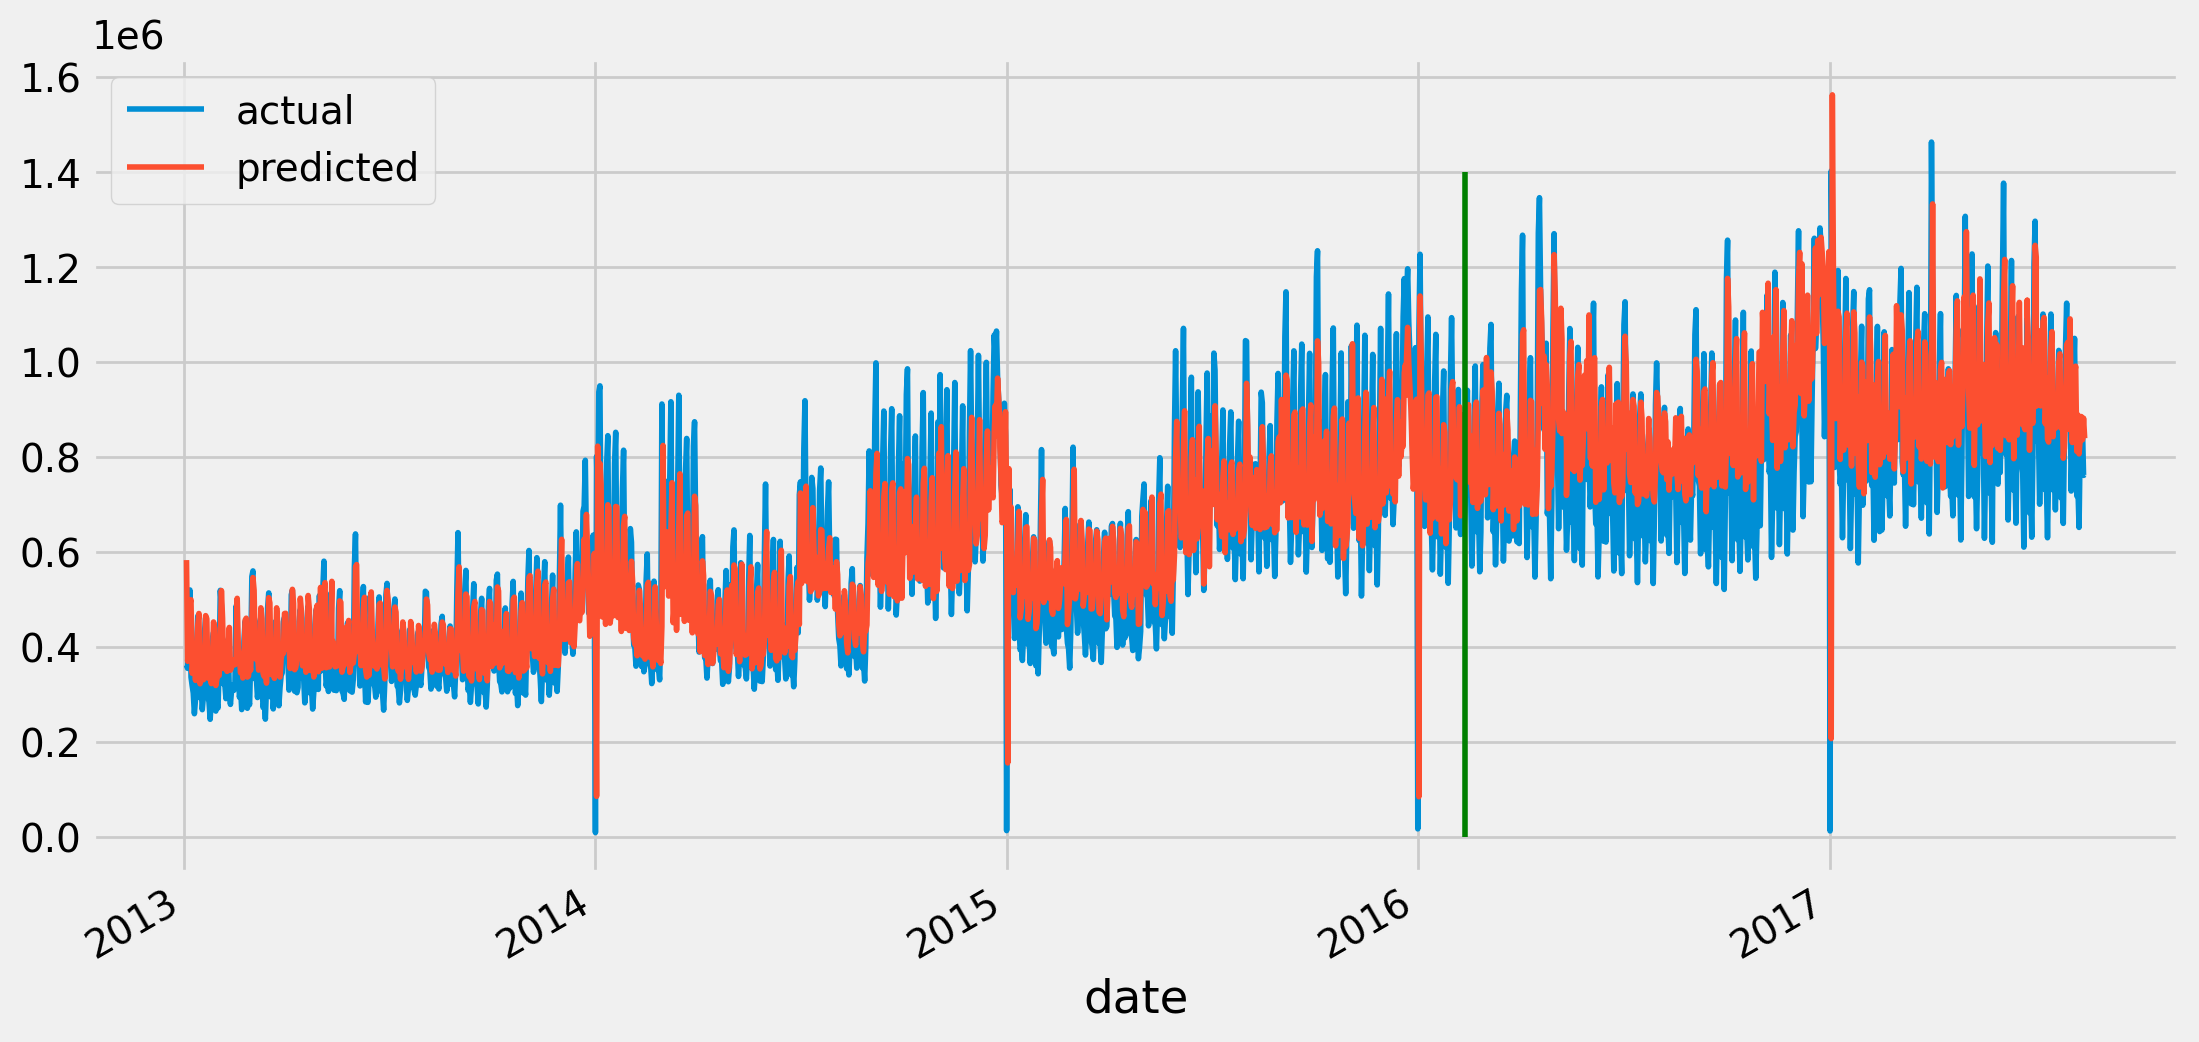

In [65]:
plt.figure(figsize=(12,6))
y.plot( lw=2, label='actual')
X['predictions'].plot(label='predicted', lw=2)

plt.legend()
# we split the training and test set at n
plt.vlines(X_test.index[0], 0,1.4e6, color='g', lw=2)
plt.show()

### 2. Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

y = sales_features['sales']
X = sales_features.drop(['sales'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

In [67]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred)

test_accuracies['RF Regression'] = model.score(X_test, y_test)*100
train_accuracies['RF Regression'] = model.score(X_train, y_train)*100
msle_dict['RF Regression'] = msle

print("Mean Squared Log Error:", msle)

print(f"Train Accuracy {train_accuracies['Linear Regression EF']:.2f}%")
print(f"Test Accuracy {test_accuracies['Linear Regression EF']:.2f}%")

# fit and score


Mean Squared Log Error: 0.07037520943016477
Train Accuracy 64.08%
Test Accuracy 10.98%


In [68]:
X.corr()

onpromotion   holiday  oil_price
onpromotion     1.000000  0.076530  -0.622347
holiday         0.076530  1.000000  -0.035785
oil_price      -0.622347 -0.035785   1.000000

In [69]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
X['predictions'] = np.concatenate([predictions_train,predictions_test])

In [70]:
X_test.index[0]

Timestamp('2016-02-11 00:00:00')

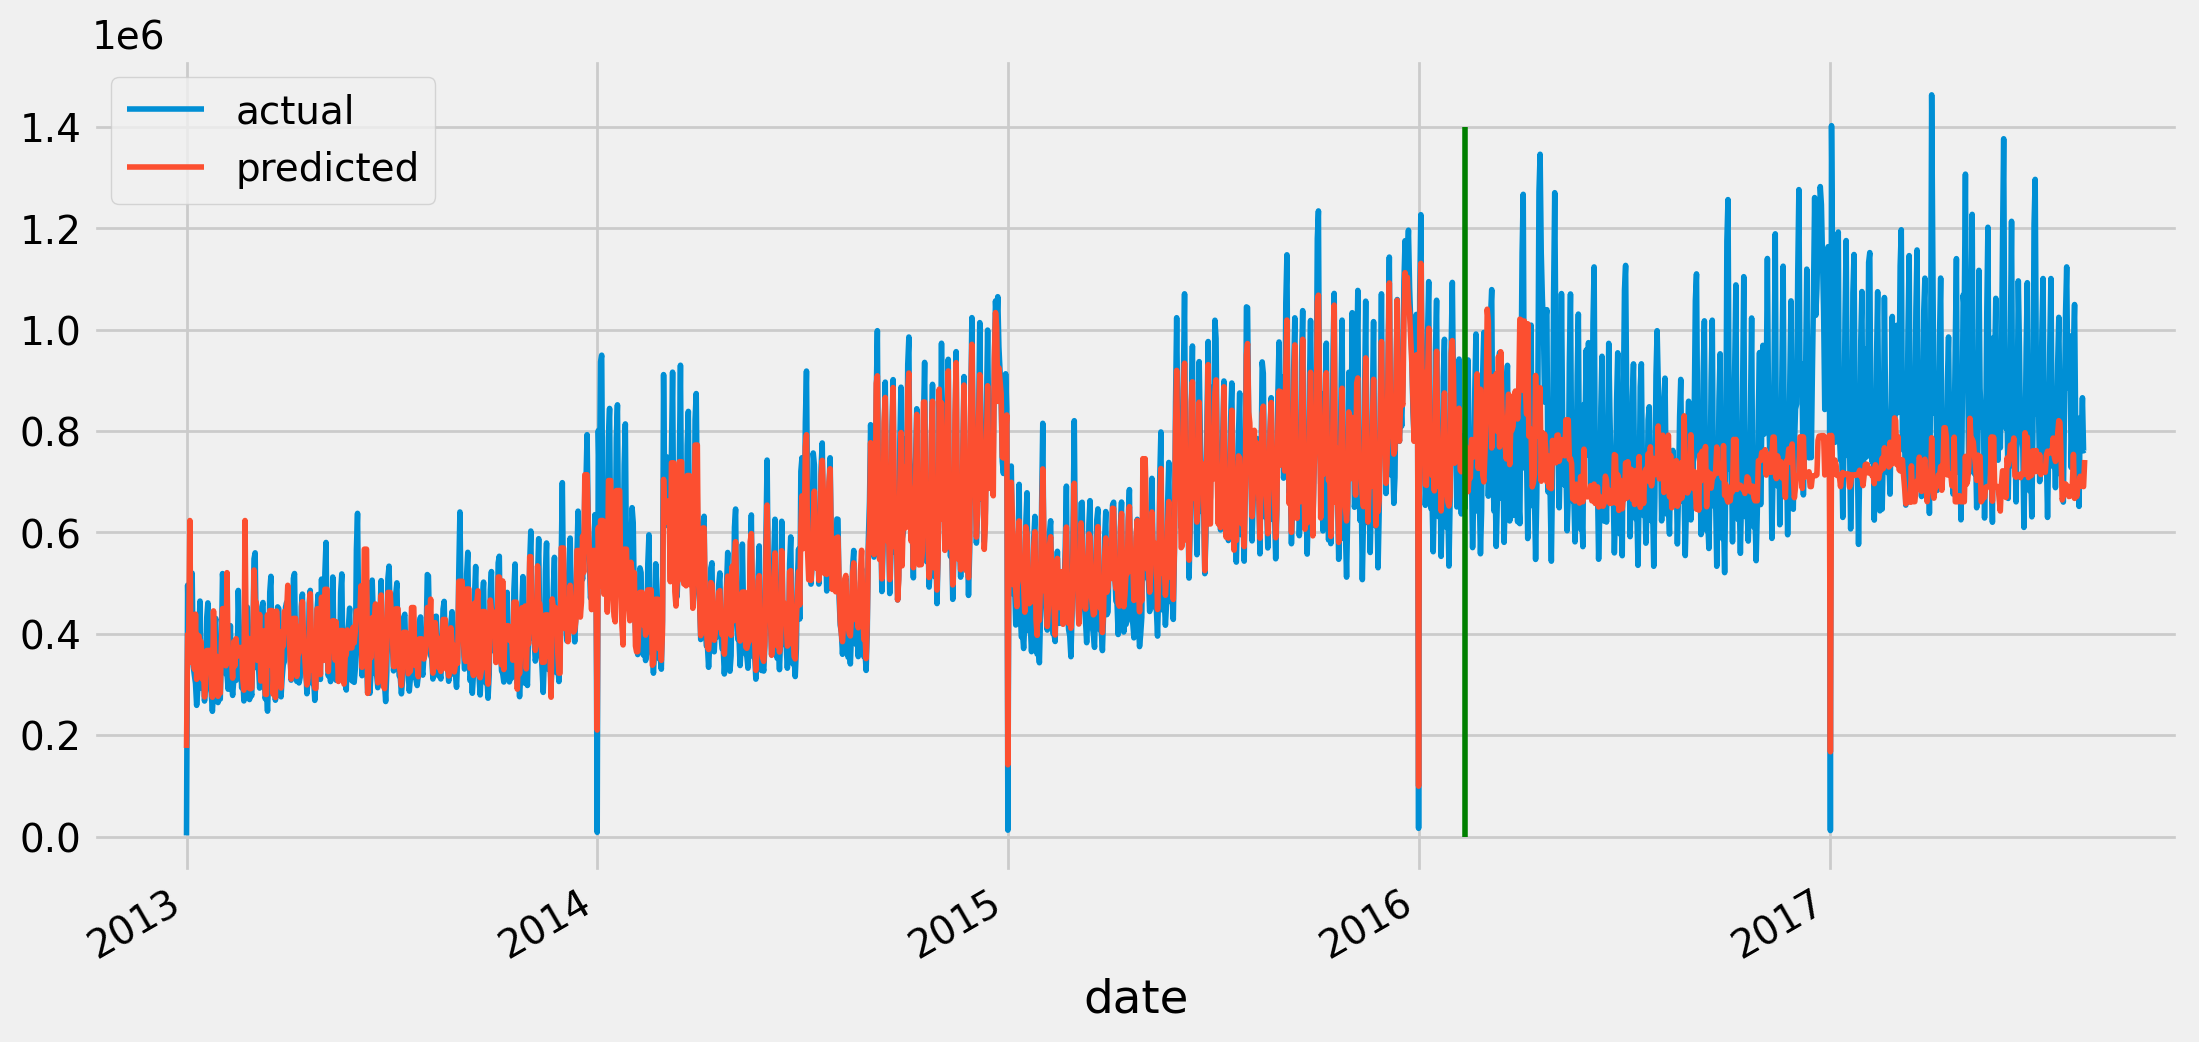

In [71]:
plt.figure(figsize=(12,6))
y.plot( lw=2, label='actual')
X['predictions'].plot(label='predicted', lw=2)

plt.legend()
# we split the training and test set at n
plt.vlines(X_test.index[0], 0,1.4e6, color='g', lw=2)
plt.show()

In [72]:
### Using previous day as references
X = X_added_features
y=X.pop('sales')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

In [73]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred)

test_accuracies['RF Regression EF'] = model.score(X_test, y_test)*100
train_accuracies['RF Regression EF'] = model.score(X_train, y_train)*100
msle_dict['RF Regression EF'] = msle

print("Mean Squared Log Error:", msle)

print(f"Train Accuracy {train_accuracies['Linear Regression EF']:.2f}%")
print(f"Test Accuracy {test_accuracies['Linear Regression EF']:.2f}%")
# fit and score

Mean Squared Log Error: 0.042731010932634275
Train Accuracy 64.08%
Test Accuracy 10.98%


In [74]:
X.corr()

sales_shift_1  sales_shift_2  onpromotion   holiday  oil_price
sales_shift_1       1.000000       0.774333     0.510468  0.108912  -0.633141
sales_shift_2       0.774333       1.000000     0.585900  0.117457  -0.632880
onpromotion         0.510468       0.585900     1.000000  0.077593  -0.621978
holiday             0.108912       0.117457     0.077593  1.000000  -0.036905
oil_price          -0.633141      -0.632880    -0.621978 -0.036905   1.000000

In [75]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
X['predictions'] = np.concatenate([predictions_train,predictions_test])

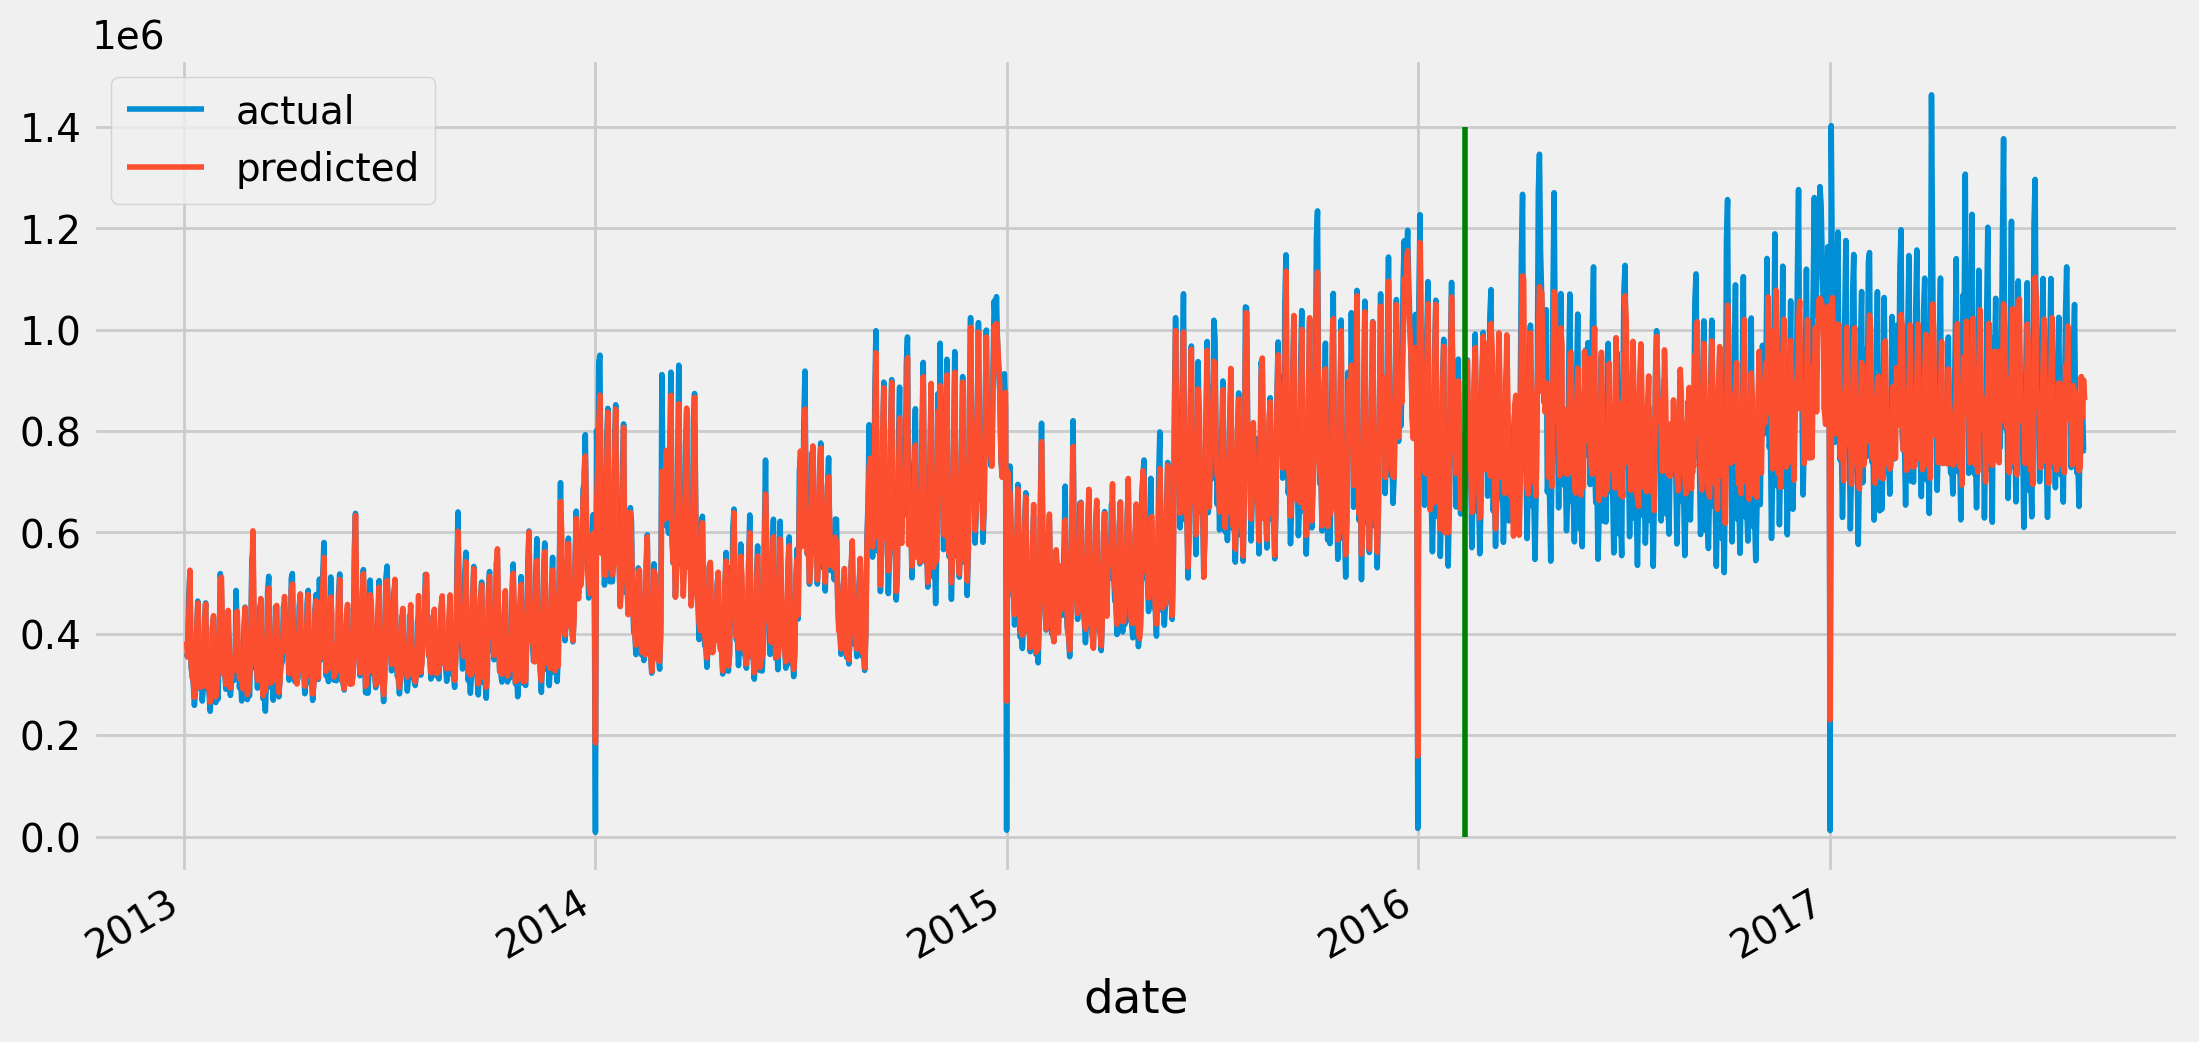

In [76]:
plt.figure(figsize=(12,6))
y.plot( lw=2, label='actual')
X['predictions'].plot(label='predicted', lw=2)

plt.legend()
# we split the training and test set at n
plt.vlines(X_test.index[0], 0,1.4e6, color='g', lw=2)
plt.show()

In [77]:
train_accuracies

{'Linear Regression': 33.56191579202472,
 'Linear Regression EF': 64.07508104657776,
 'RF Regression': 90.33907606191033,
 'RF Regression EF': 96.80676120200421}

In [78]:
test_accuracies

{'Linear Regression': -3.37667403749331,
 'Linear Regression EF': 10.976145065431064,
 'RF Regression': -31.46374910015175,
 'RF Regression EF': 38.15674660547555}

In [79]:
msle_dict

{'Linear Regression': 0.0725201675039842,
 'Linear Regression EF': 0.07457526293187851,
 'RF Regression': 0.07037520943016477,
 'RF Regression EF': 0.042731010932634275}

### 3. ARIMA

In [80]:
sales_rate = sales_features['sales']

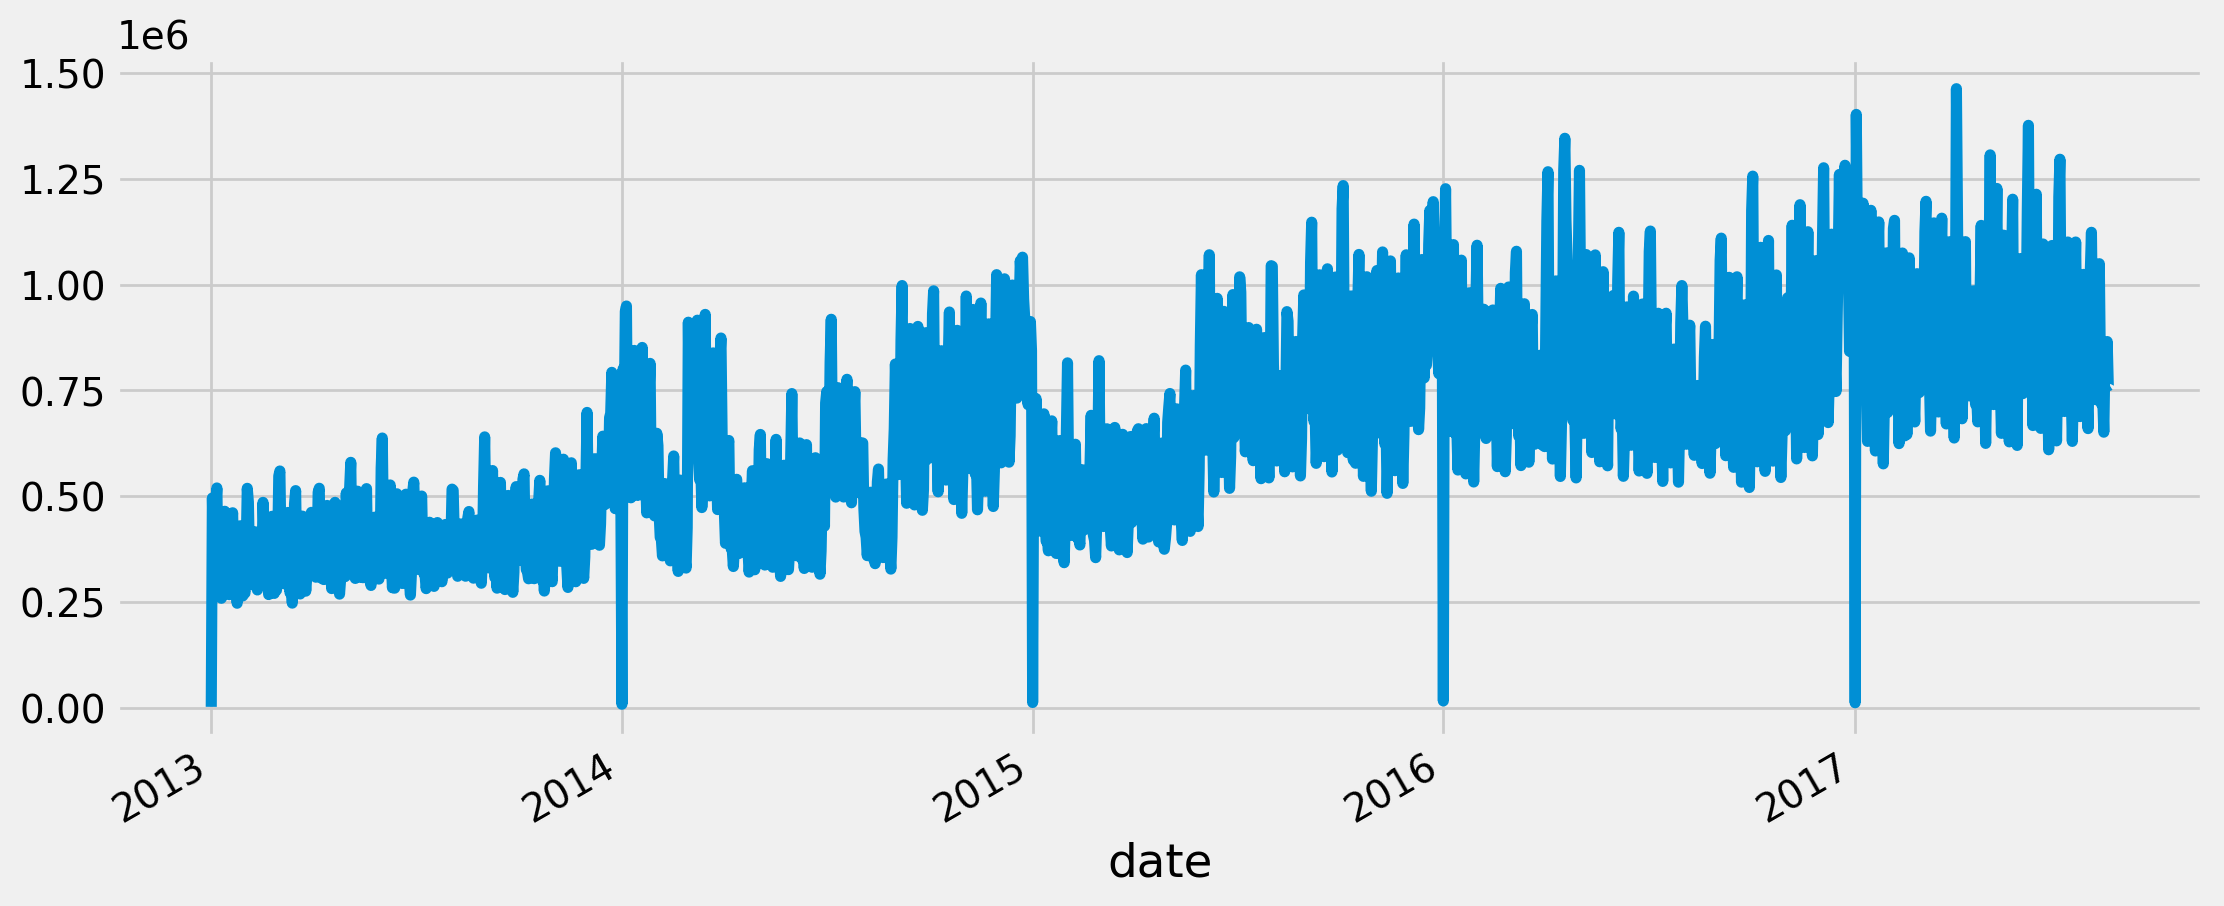

In [81]:
sales_rate.plot(lw=4, figsize=(12, 5))
plt.show()

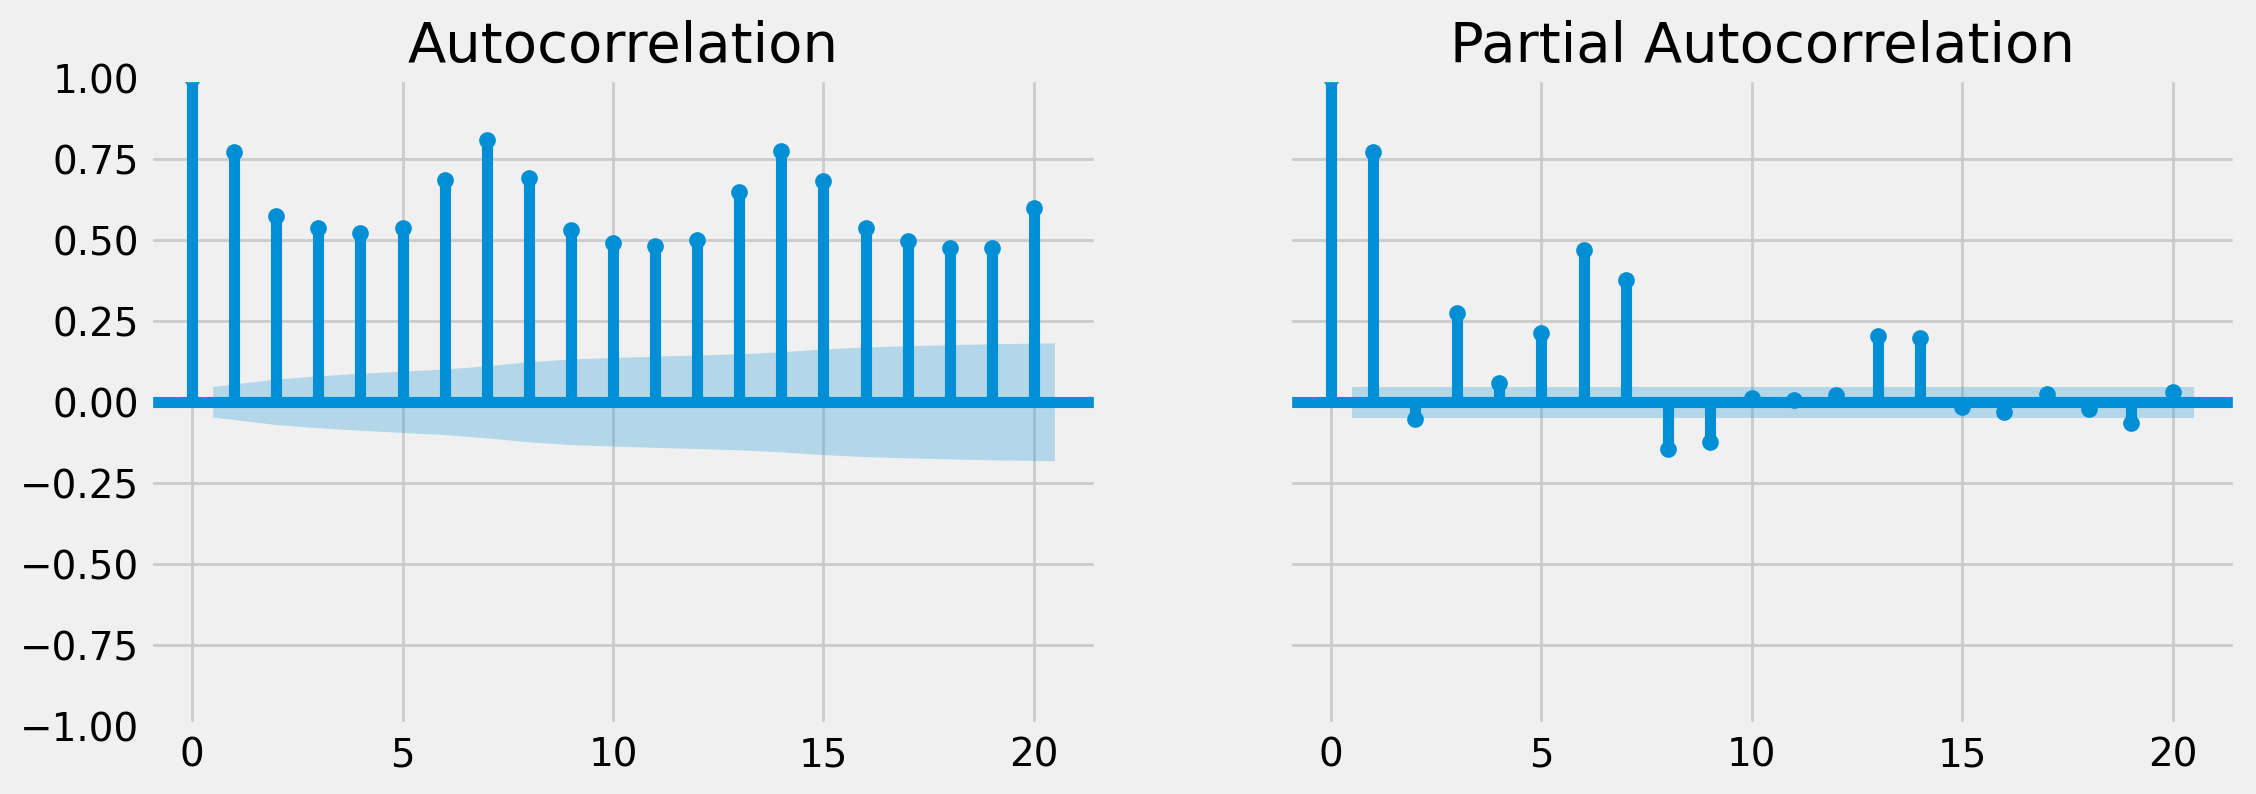

In [82]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

fig, ax = autocorr_plots(sales_rate,lags=20)

In [83]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(sales_rate)
print(f'p-value: {adf_test[1]}')

p-value: 0.0773651827482494


In [84]:
sales_rate

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Name: sales, Length: 1714, dtype: float64

In [85]:
len(sales_rate)*0.3

514.1999999999999

In [86]:
# y = sales_features['sales']
# X = sales_features.drop(['sales'], axis=1)
n = round(0.75*len(sales_rate))
X_train= sales_rate[:n]
X_test= sales_rate[n:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

In [87]:
from statsmodels.tsa.arima.model import ARIMA

model_test=ARIMA(X_train, order=(1,0,3)).fit()
print(model_test.summary())
print(model_test.model.order)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1286
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -16867.331
Date:                Mon, 16 Oct 2023   AIC                          33746.662
Time:                        13:26:05   BIC                          33777.617
Sample:                             0   HQIC                         33758.283
                               - 1286                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.759e+05    9.2e-10   6.26e+14      0.000    5.76e+05    5.76e+05
ar.L1          0.9968      0.002    527.025      0.000       0.993       1.000
ma.L1         -0.2587      0.017    -15.179      0.0

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='date'>

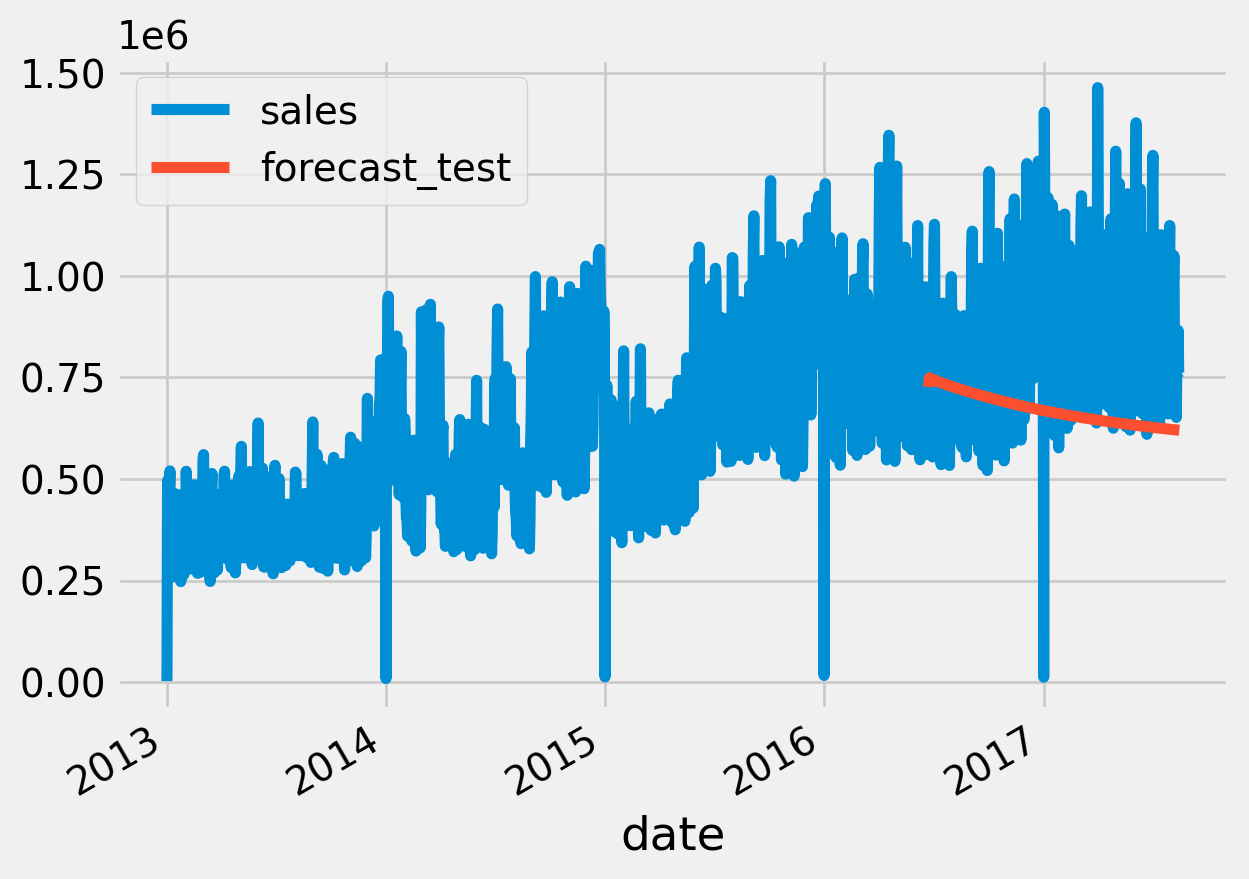

In [88]:
forecast_test = model_test.forecast(len(X_test))

# Store the forecast values back in the dataframe, keeping those before the y_test as NaN
forecast=sales_features.copy()
forecast['forecast_test'] = [None]*len(X_train) + list(forecast_test) #appending the forecasted value

plotdata = forecast[['sales','forecast_test']]
plotdata.plot()

In [89]:
from scipy import stats
import statsmodels.api as sm

def residual_plot(res):
    resid_standard = (res - res.mean()) / res.std()

    figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    ax[0, 0].plot(res)
    ax[0, 0].axhline(res.mean(), color='grey')
    ax[0, 0].set_title('Residuals')

    plot_acf(resid_standard, title='Correlogram', ax=ax[0, 1])

    sm.graphics.qqplot(res, line='45', fit=True, ax=ax[1, 0])
    ax[1, 0].set_title('Normal Q-Q')

    x = np.linspace(res.min(), res.max(), 1000)
    norm = stats.norm(loc=0, scale=res.std())
    sns.distplot(res, ax=ax[1, 1], label='kde estimate')
    ax[1, 1].plot(x, norm.pdf(x), label='normal distribution')
    ax[1, 1].legend()
    ax[1, 1].set_title('Distribution of Residuals')
    plt.tight_layout()
    plt.show()

C:\Users\isais\AppData\Local\Temp\ipykernel_15916\1919325729.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, ax=ax[1, 1], label='kde estimate')


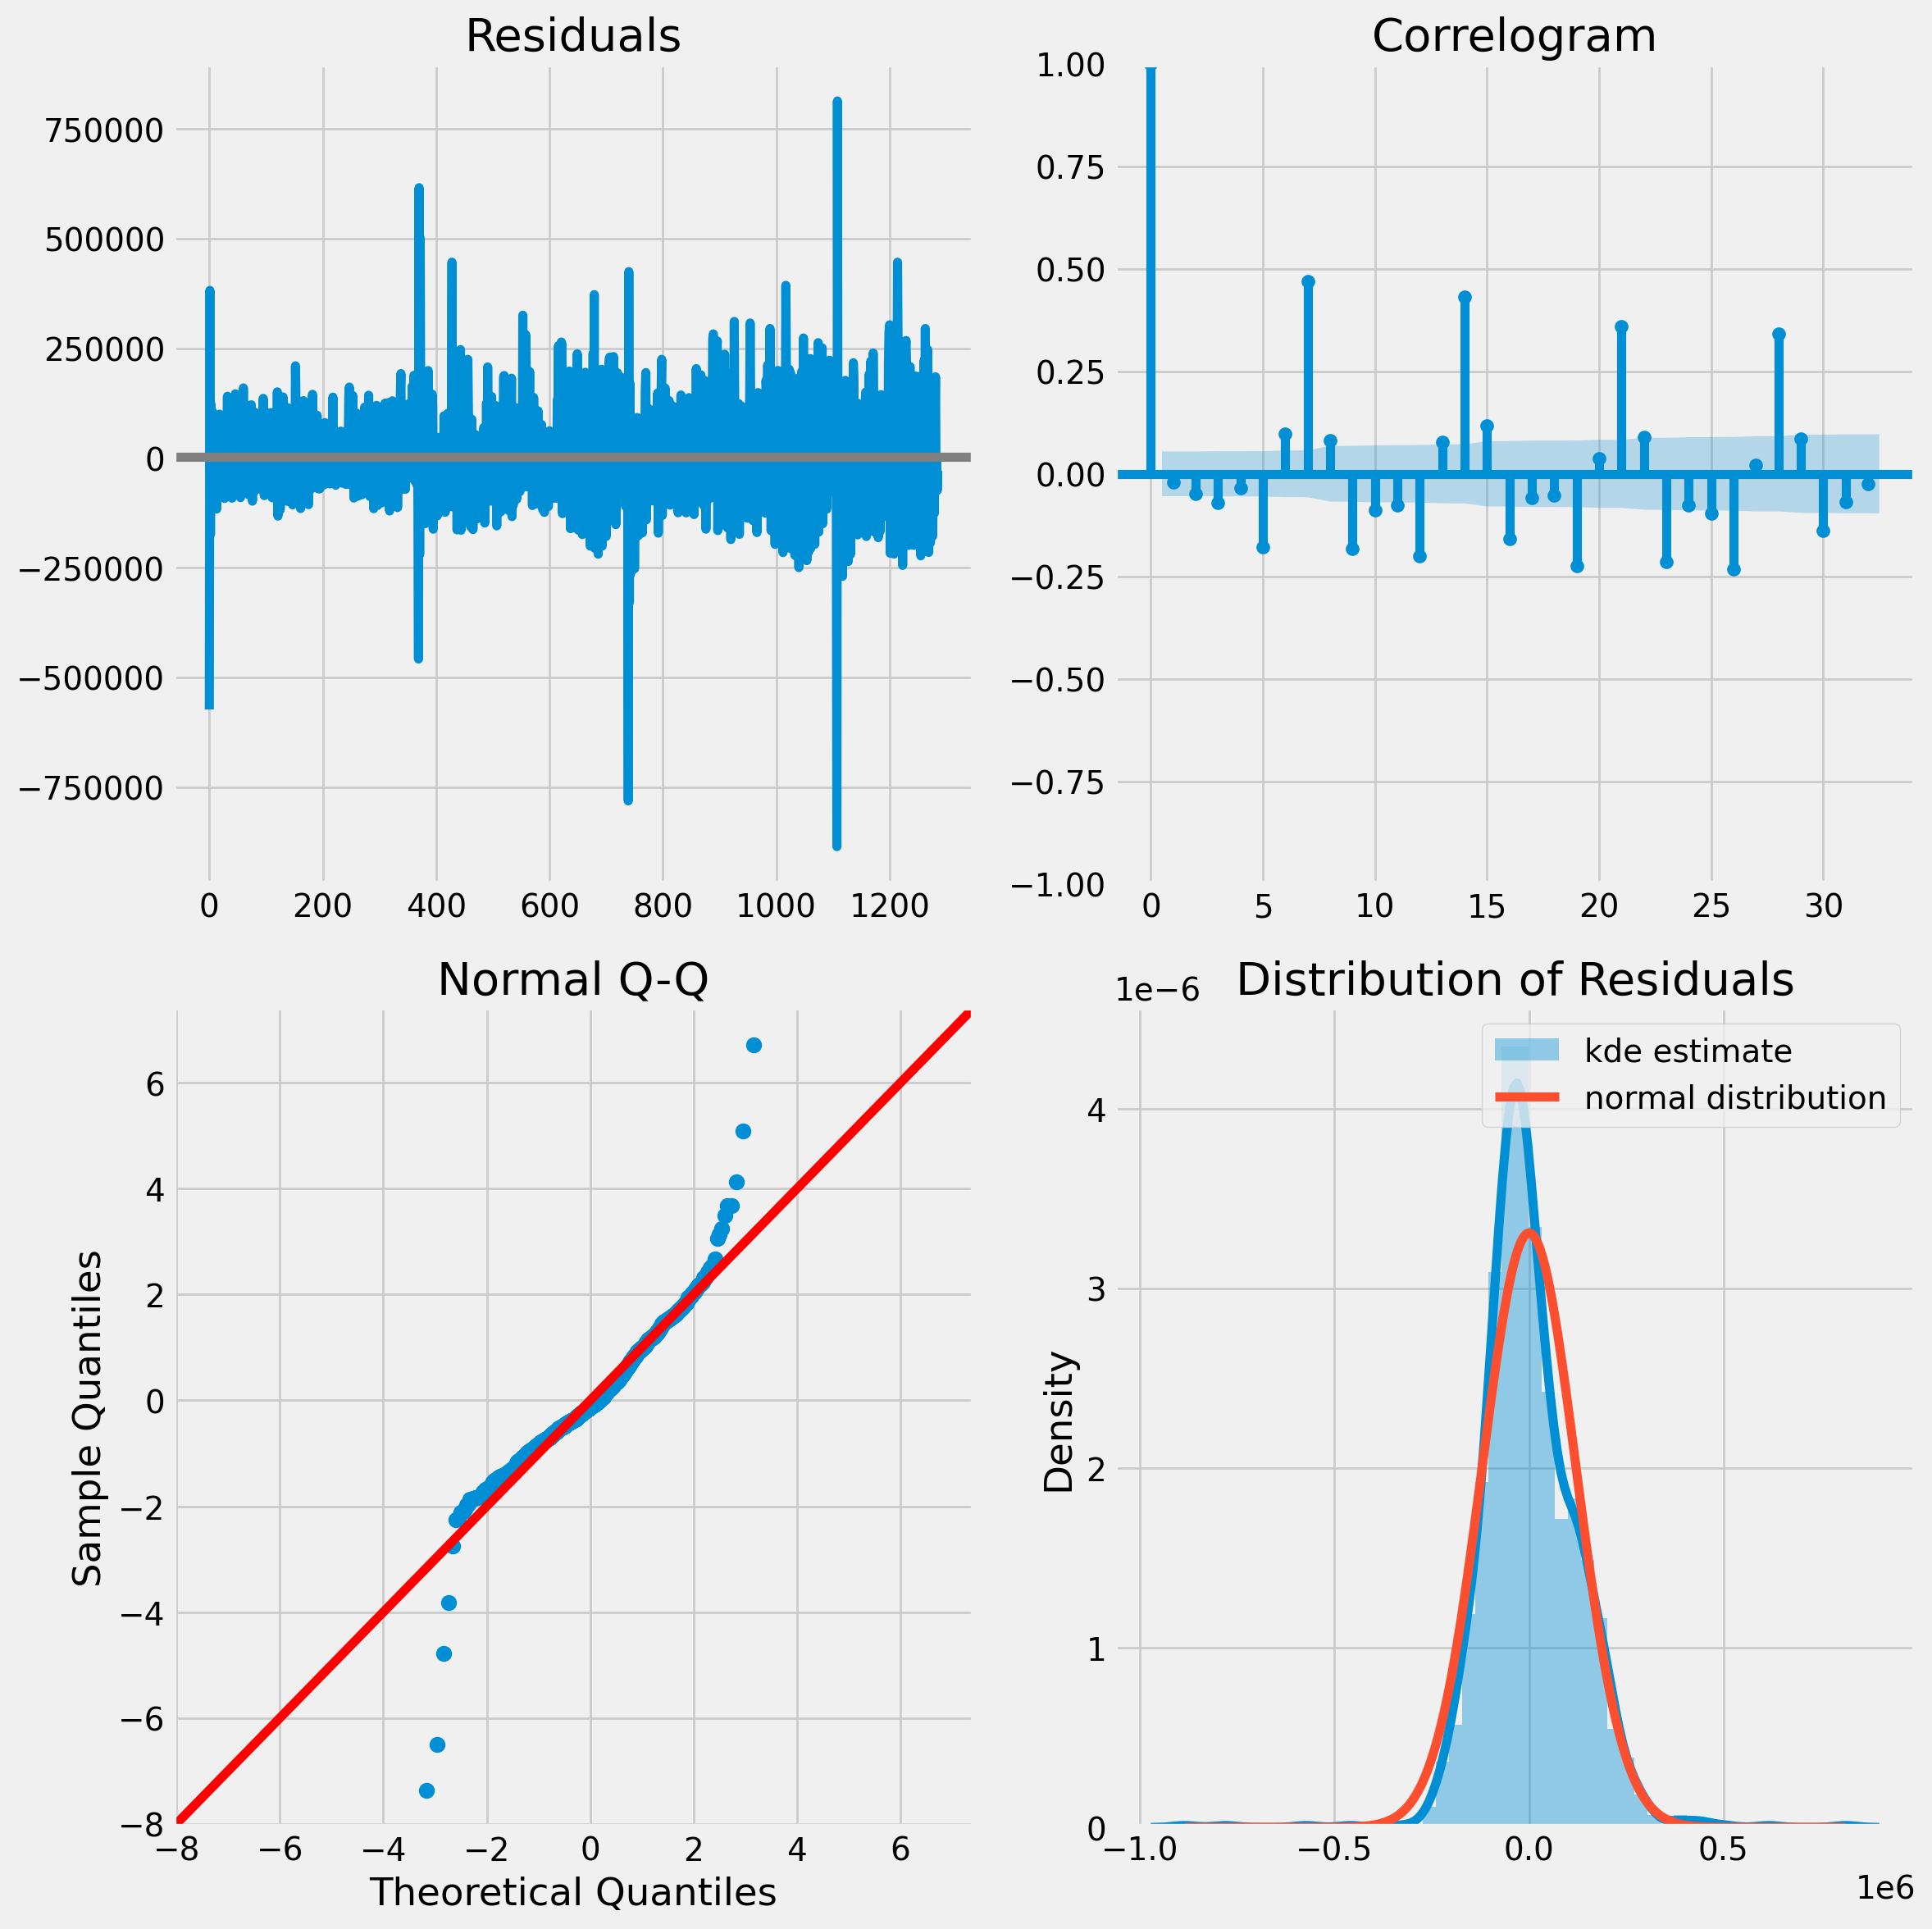

In [90]:
residual_plot(model_test.resid.values)

In [91]:
sdiff = sales_rate.diff()[1:]

<Axes: xlabel='date'>

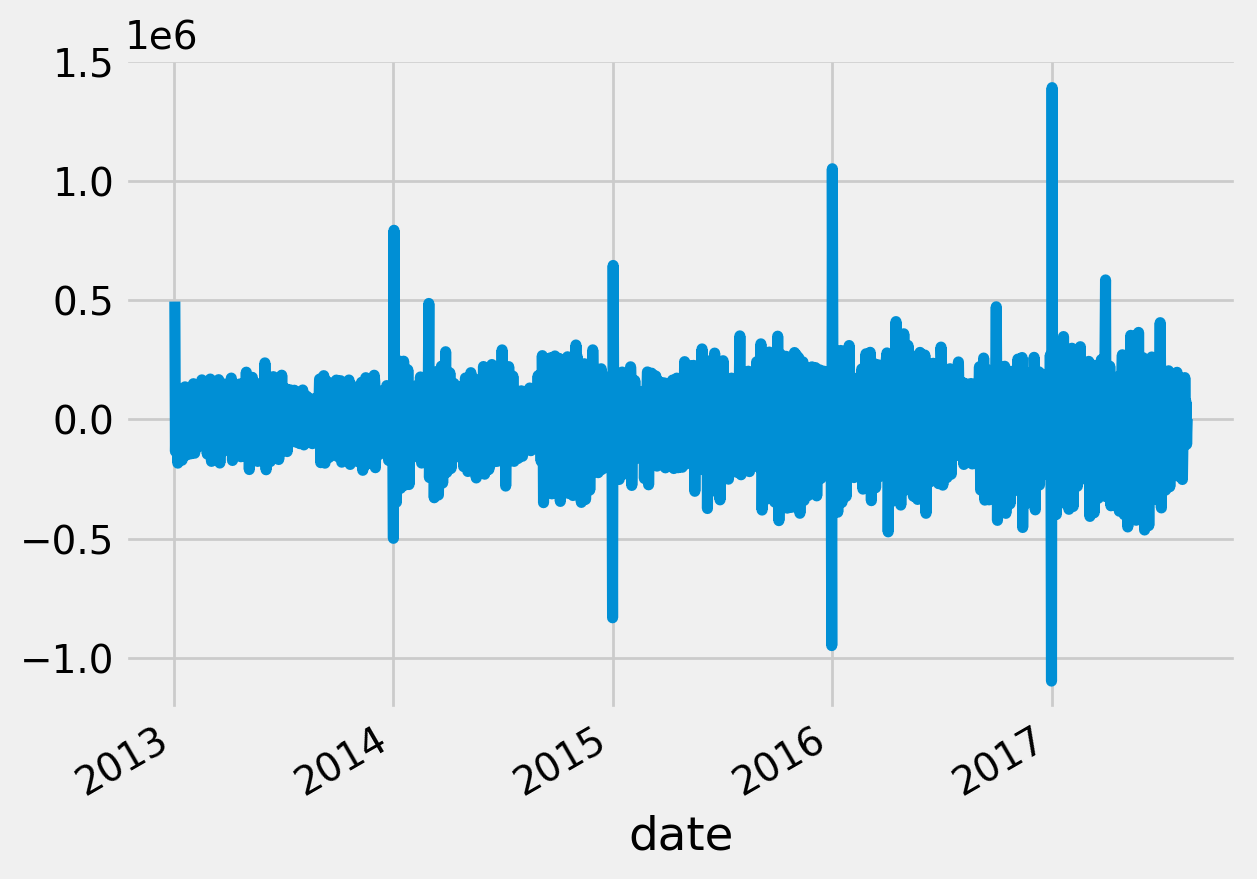

In [92]:
sdiff.plot()

(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

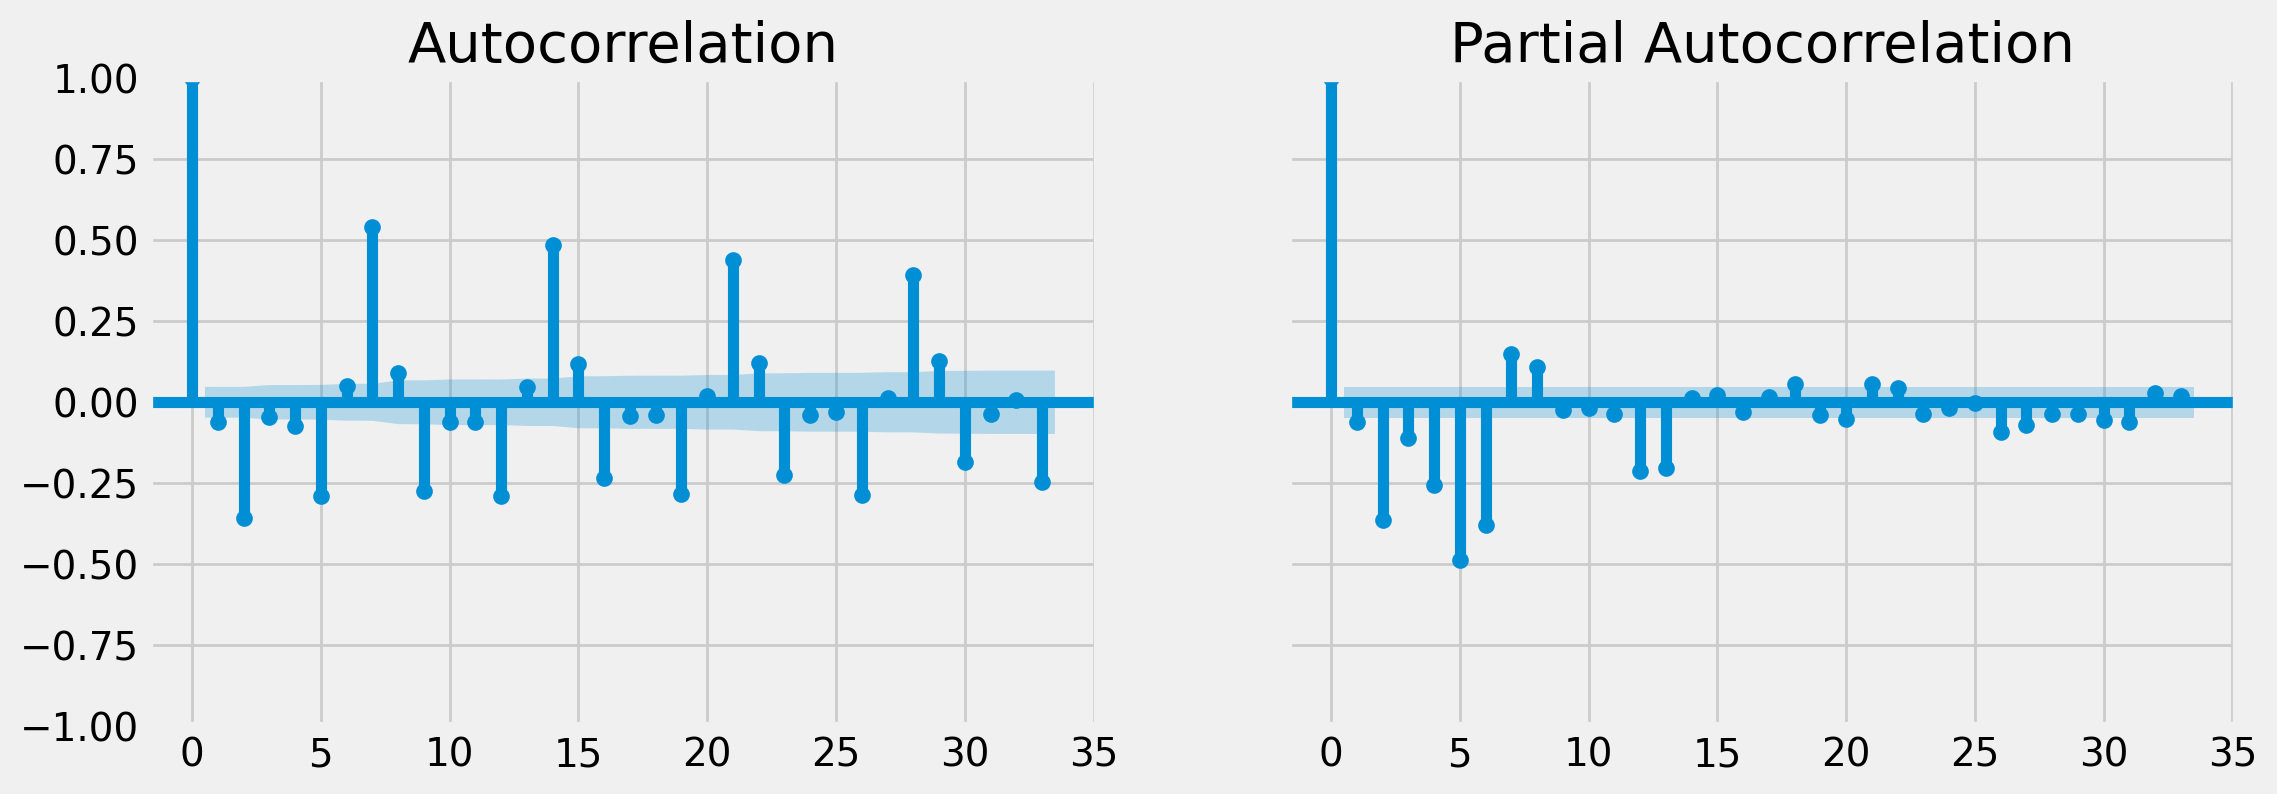

In [93]:
autocorr_plots(sdiff)

In [94]:
adf_test = adfuller(sdiff)
print(f'p-value: {adf_test[1]}')

p-value: 8.218545766490284e-20


In [95]:
model_1_1_1=ARIMA(X_train, order=(1,1,1)).fit()
print(model_1_1_1.summary())
print(model_1_1_1.model.order)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1286
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16942.450
Date:                Mon, 16 Oct 2023   AIC                          33890.901
Time:                        13:26:08   BIC                          33906.376
Sample:                             0   HQIC                         33896.710
                               - 1286                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4917      0.022     21.898      0.000       0.448       0.536
ma.L1         -0.9538      0.010    -92.302      0.000      -0.974      -0.933
sigma2      2.033e+10   8.63e-14   2.36e+23      0.0

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='date'>

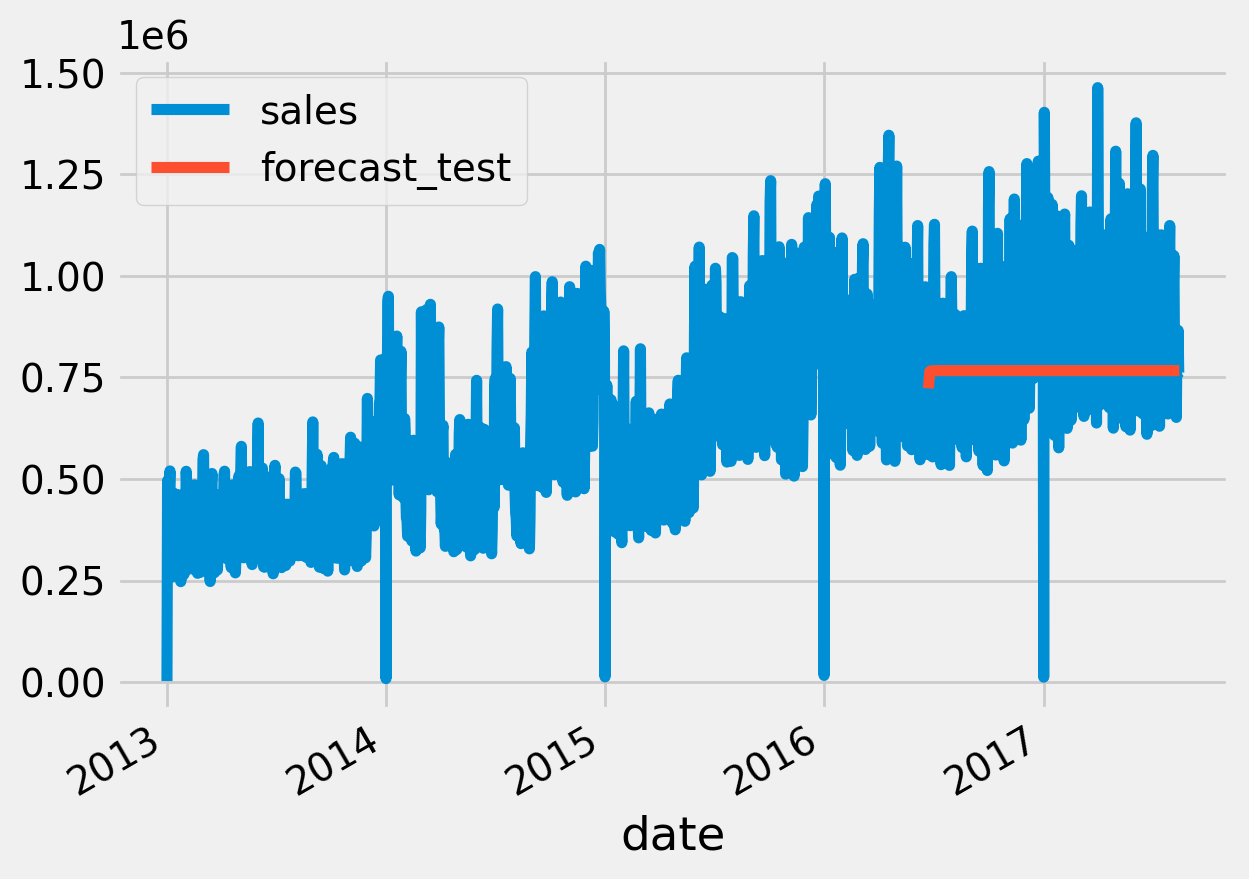

In [96]:
forecast_test = model_1_1_1.forecast(len(X_test))

# Store the forecast values back in the dataframe, keeping those before the y_test as NaN
forecast=sales_features.copy()
forecast['forecast_test'] = [None]*len(X_train) + list(forecast_test) #appending the forecasted value

plotdata = forecast[['sales','forecast_test']]
plotdata.plot()

C:\Users\isais\AppData\Local\Temp\ipykernel_15916\1919325729.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, ax=ax[1, 1], label='kde estimate')


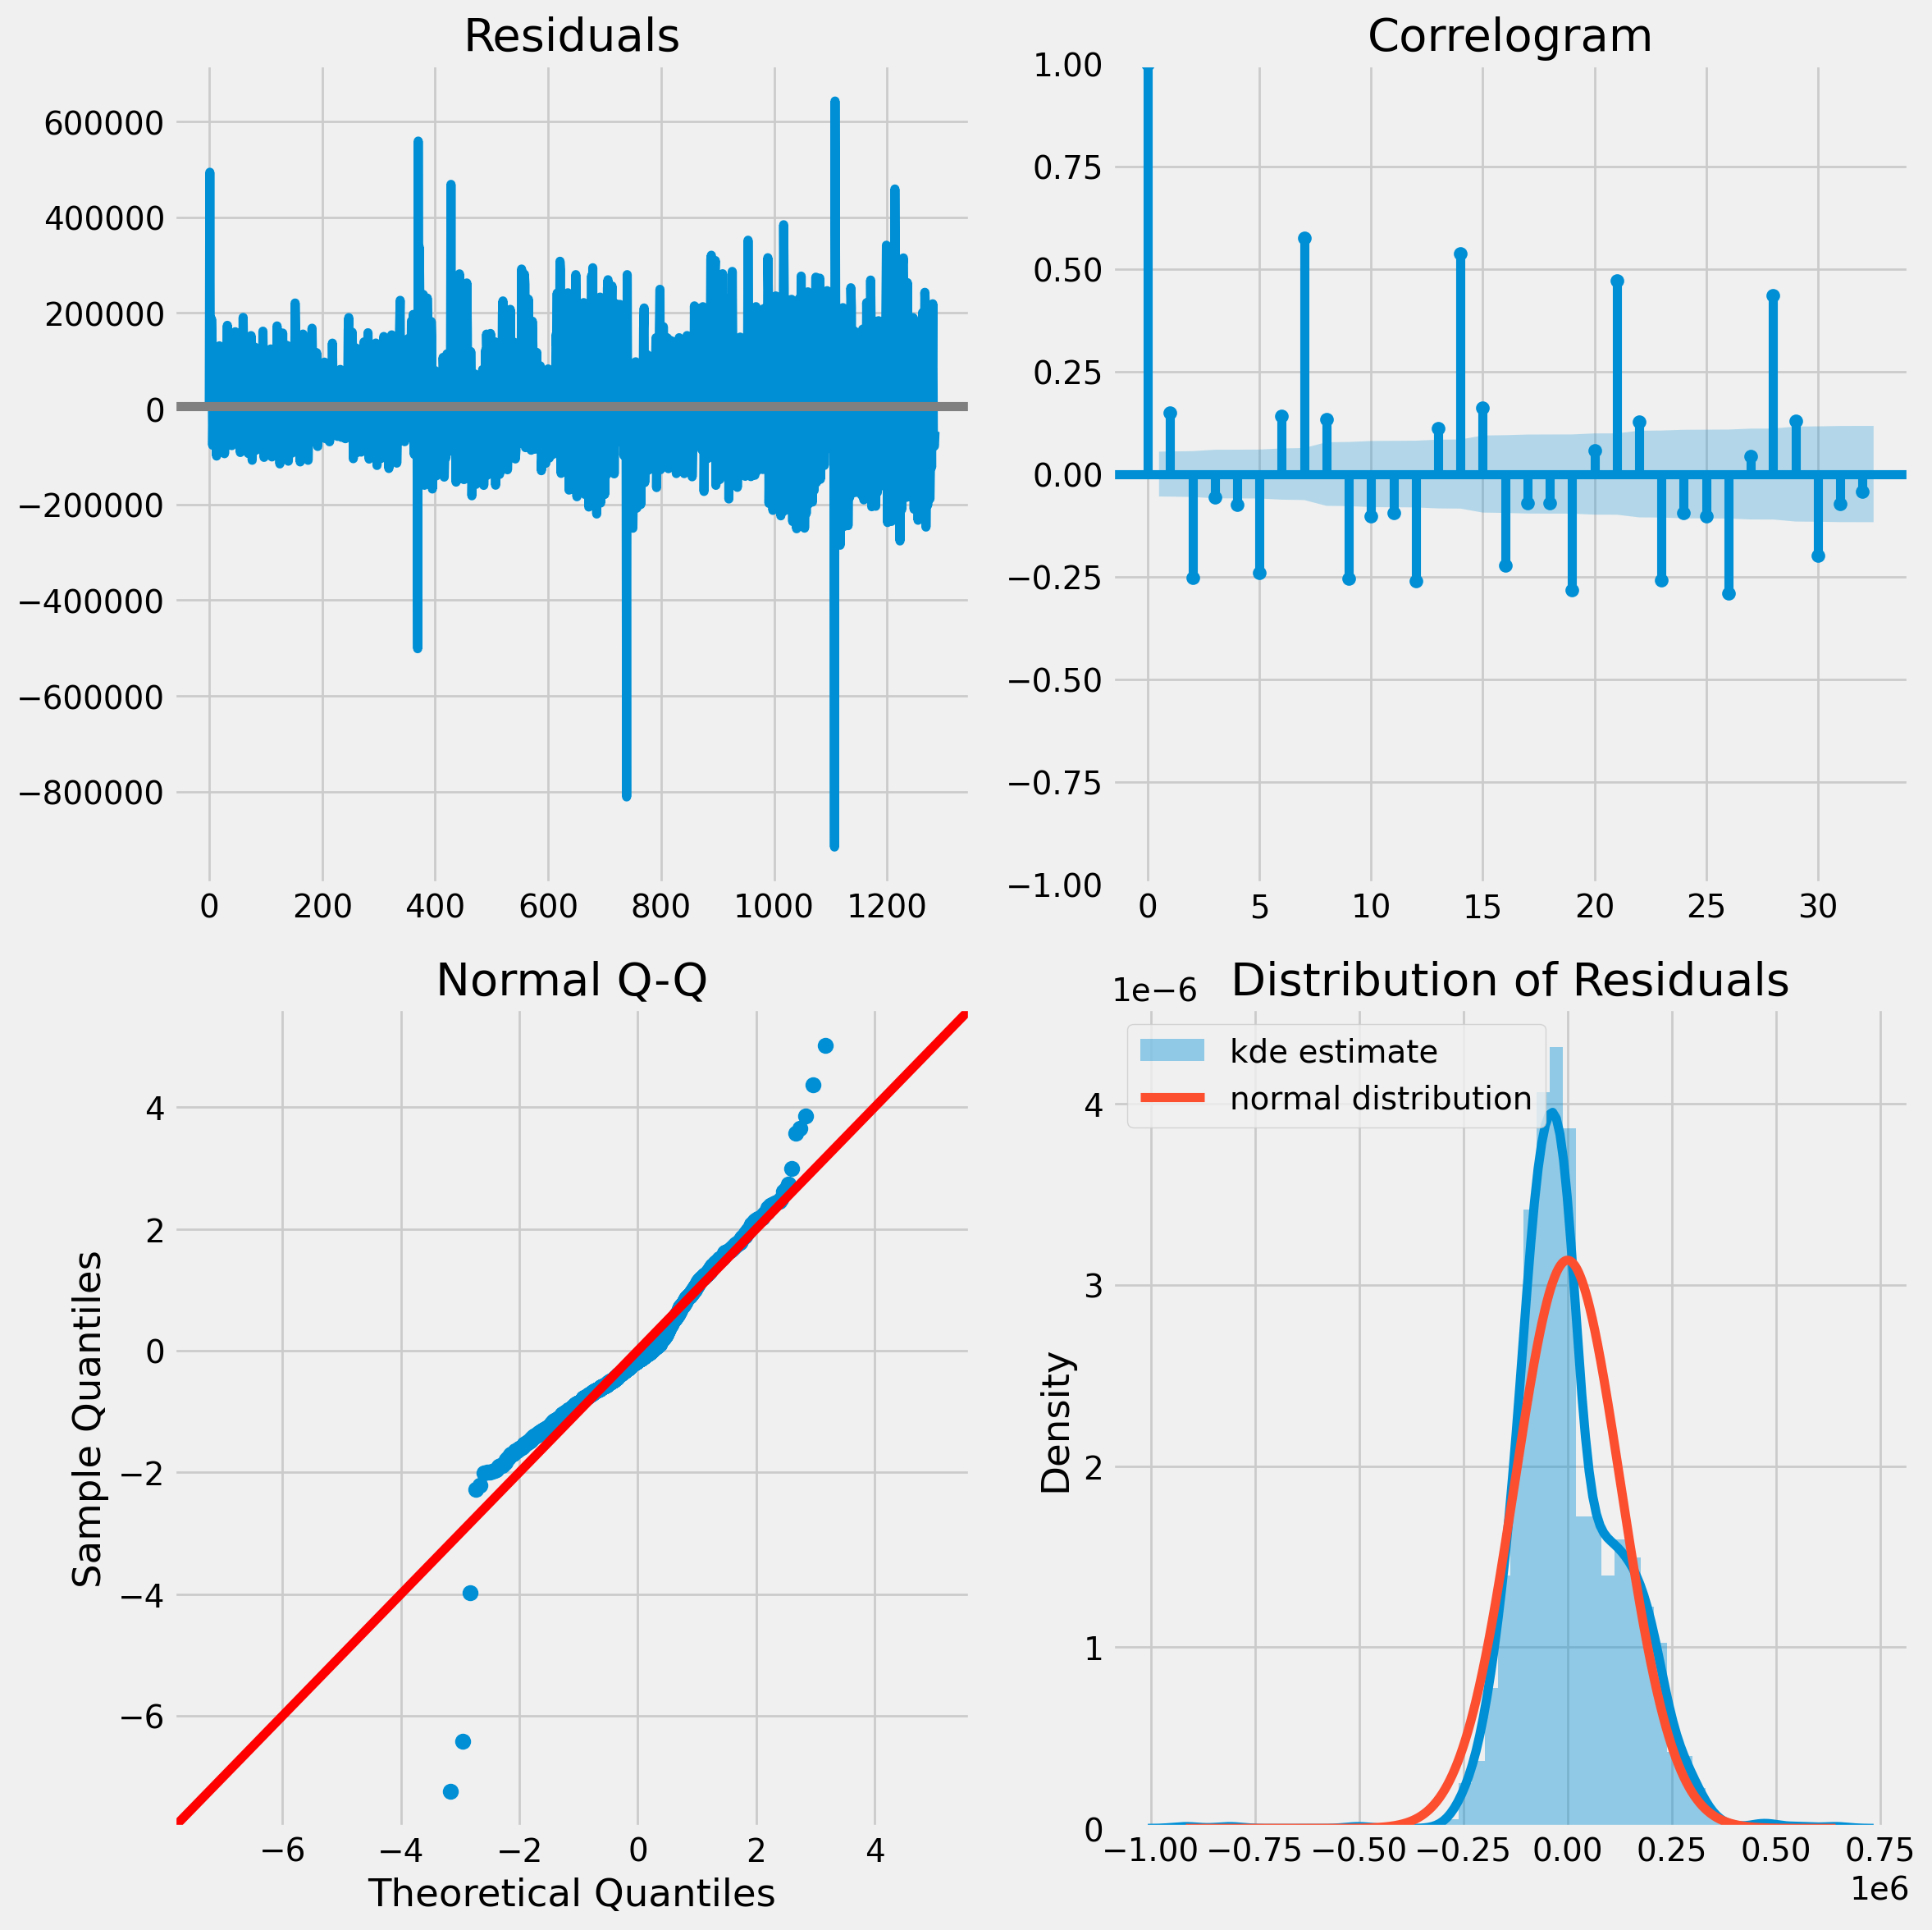

In [97]:
residual_plot(model_1_1_1.resid.values)

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
n = round(0.75*len(sales_rate))
X_train= sales_rate[:n]
X_test= sales_rate[n:]


sarima_model = SARIMAX(X_train, order=(1, 1, 2), seasonal_order=(1, 0, 1, 7))
sarima_result = sarima_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [99]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                 1286
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 7)   Log Likelihood              -16593.745
Date:                             Mon, 16 Oct 2023   AIC                          33199.489
Time:                                     13:26:12   BIC                          33230.440
Sample:                                          0   HQIC                         33211.109
                                            - 1286                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5643      0.046     12.386      0.000       0.475       0.654
ma.L1         -0.9561      0.049    -19.626      0.000      -1.052      -0.861
ma.L2         -0.0374      0.047     -0.793      0.428      -0.130       0.055
ar.S.L7        0.9376      0.015     62.038      0.000       0.908       0.967
ma.S.L7       -0.6189      0.030    -20.726      0.000      -0.677      -0.560
sigma2      1.278e+10   8.91e-13   1.43e+22      0.000    1.28e+10    1.28e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             12518.29
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.14e+37. Standard errors may be unstable.
"""

In [100]:
# import pmdarima as pm
# auto_arima = pm.auto_arima(X_train, stepwise=False, seasonal=True, m=7)
# auto_arima

In [101]:
model_s=ARIMA(X_train, order=(1,1,2), seasonal_order=(1,0,1,7)).fit()
print(model_s.summary())
print(model_s.model.order)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1286
Model:             ARIMA(1, 1, 2)x(1, 0, [1], 7)   Log Likelihood              -16593.745
Date:                           Mon, 16 Oct 2023   AIC                          33199.489
Time:                                   13:26:13   BIC                          33230.440
Sample:                                        0   HQIC                         33211.109
                                          - 1286                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5643      0.046     12.386      0.000       0.475       0.654
ma.L1         -0.9561      0.049    -19.626

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='date'>

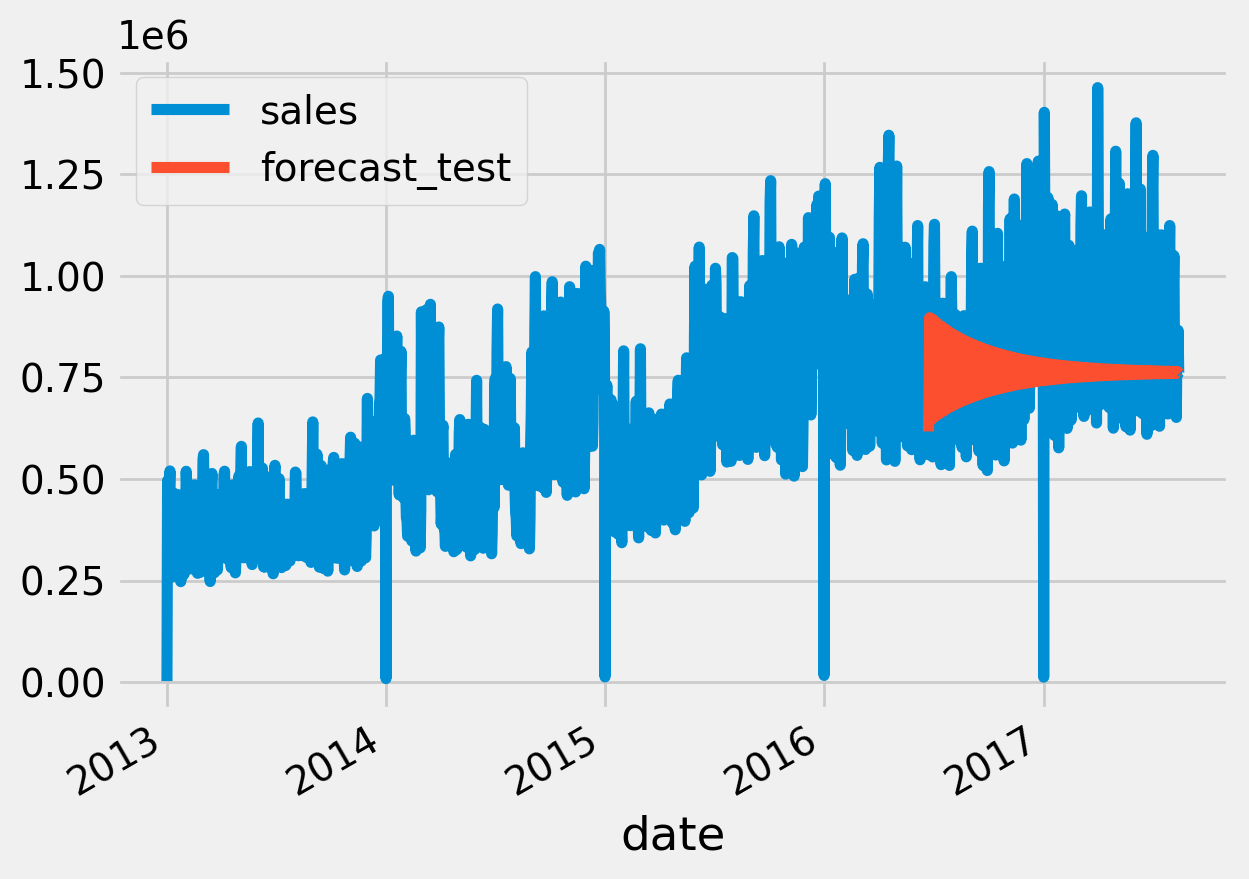

In [102]:
forecast_test = model_s.forecast(len(X_test))

# Store the forecast values back in the dataframe, keeping those before the y_test as NaN
forecast=sales_features.copy()
forecast['forecast_test'] = [None]*len(X_train) + list(forecast_test) #appending the forecasted value

plotdata = forecast[['sales','forecast_test']]
plotdata.plot()

### 4. ARIMA with Exogenous Variables (ARIMA-X):

In [103]:
### Will try

## 4. Evaluation and Recommendation

#### Regression

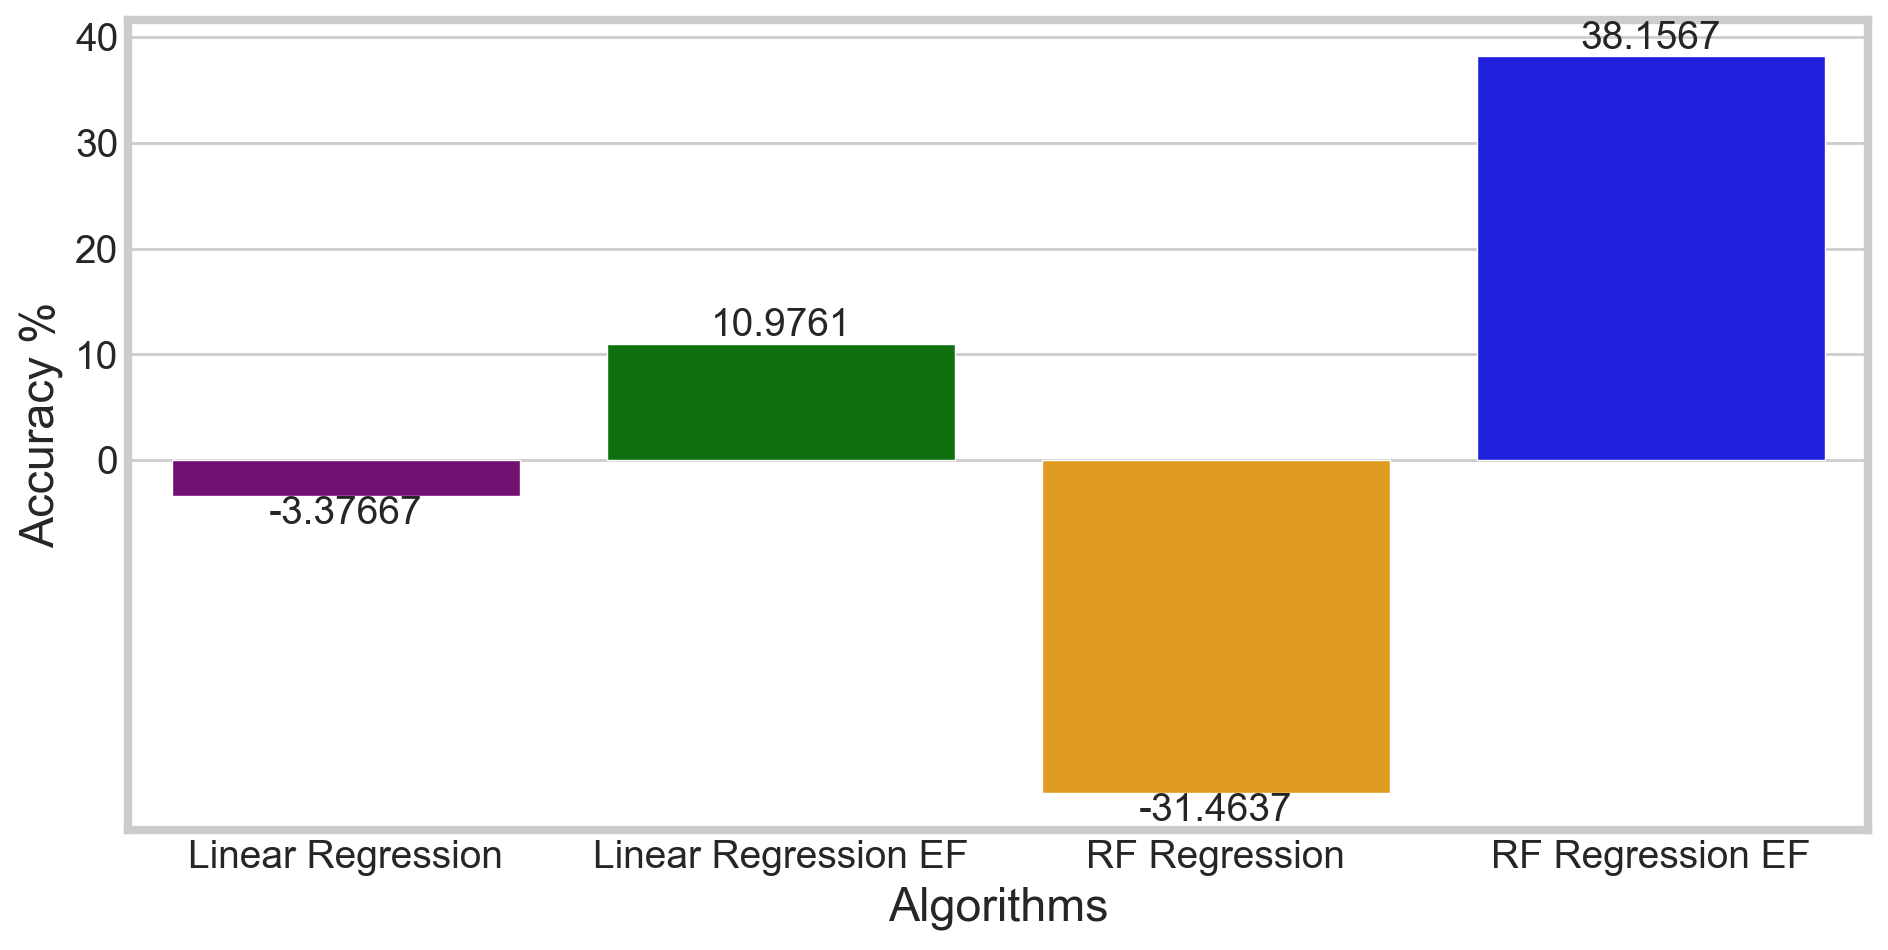

In [104]:
import seaborn as sns
colors = ['purple', 'green', 'orange', 'blue']

sns.set_style ('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')

ax = sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()),palette=colors)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

#### ARIMA / SARIMA

C:\Users\isais\AppData\Local\Temp\ipykernel_15916\1919325729.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, ax=ax[1, 1], label='kde estimate')


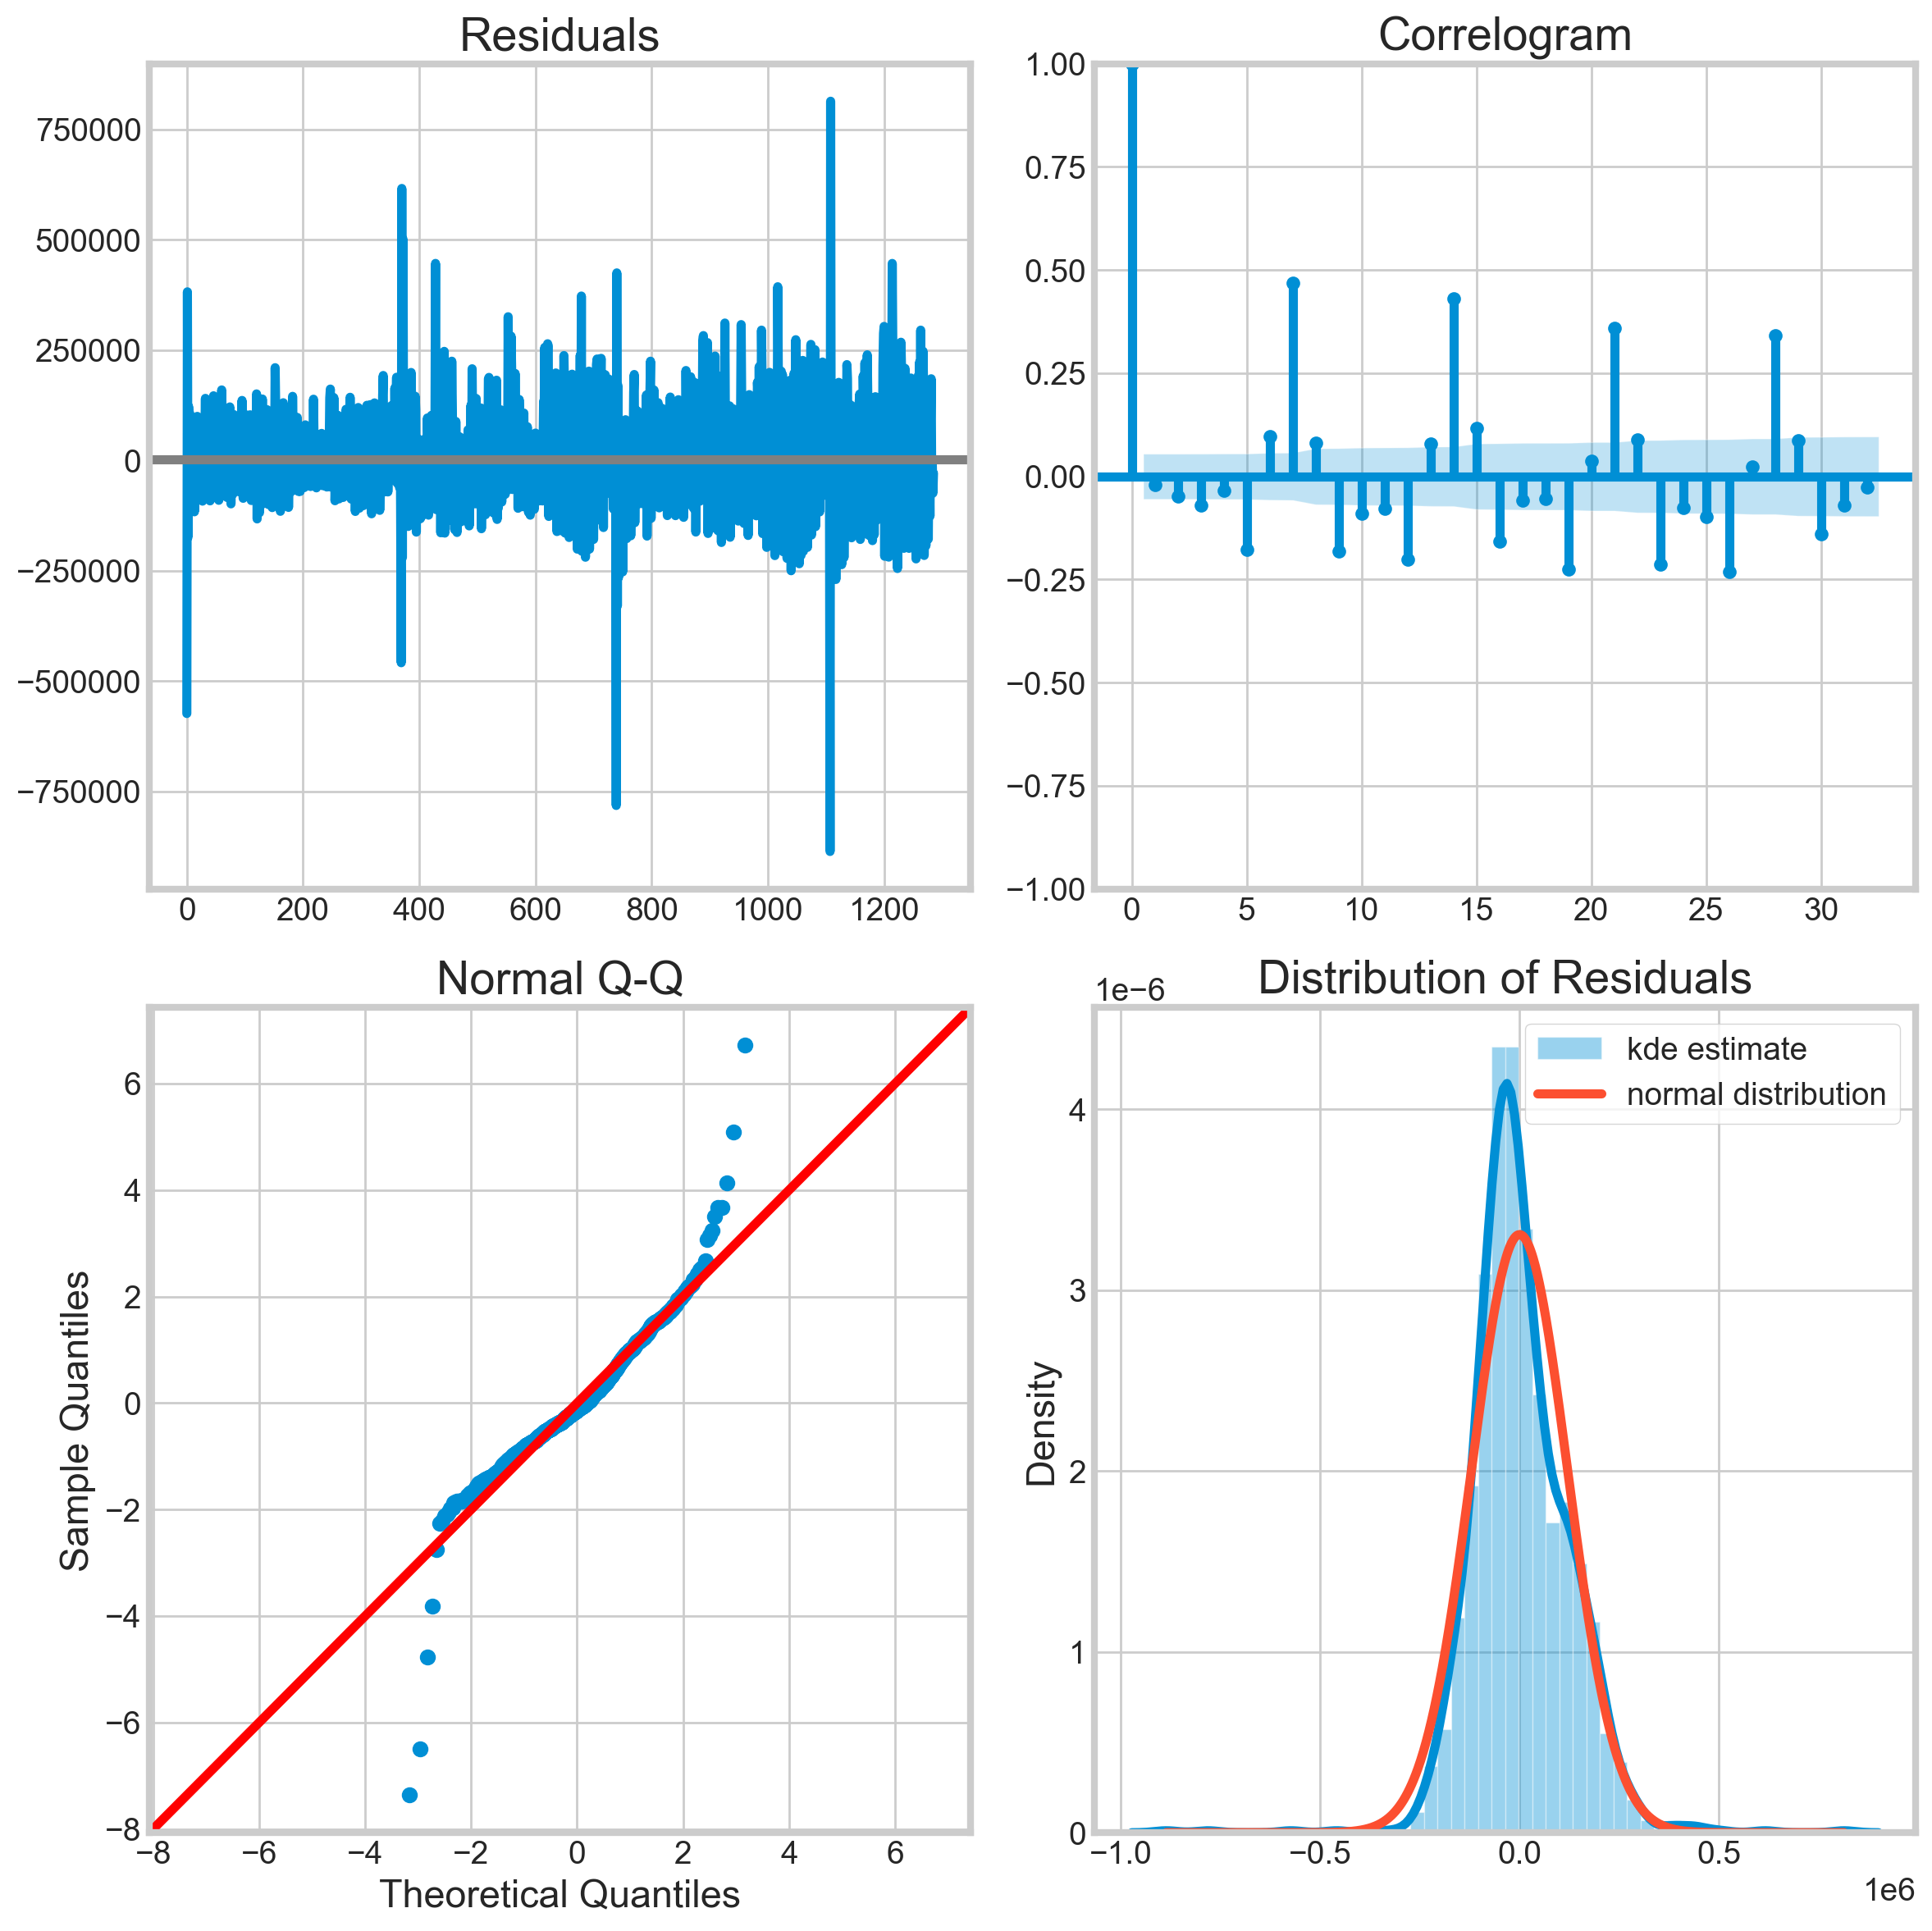

In [105]:
residual_plot(model_test.resid.values) ## ARIMA

C:\Users\isais\AppData\Local\Temp\ipykernel_15916\1919325729.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, ax=ax[1, 1], label='kde estimate')


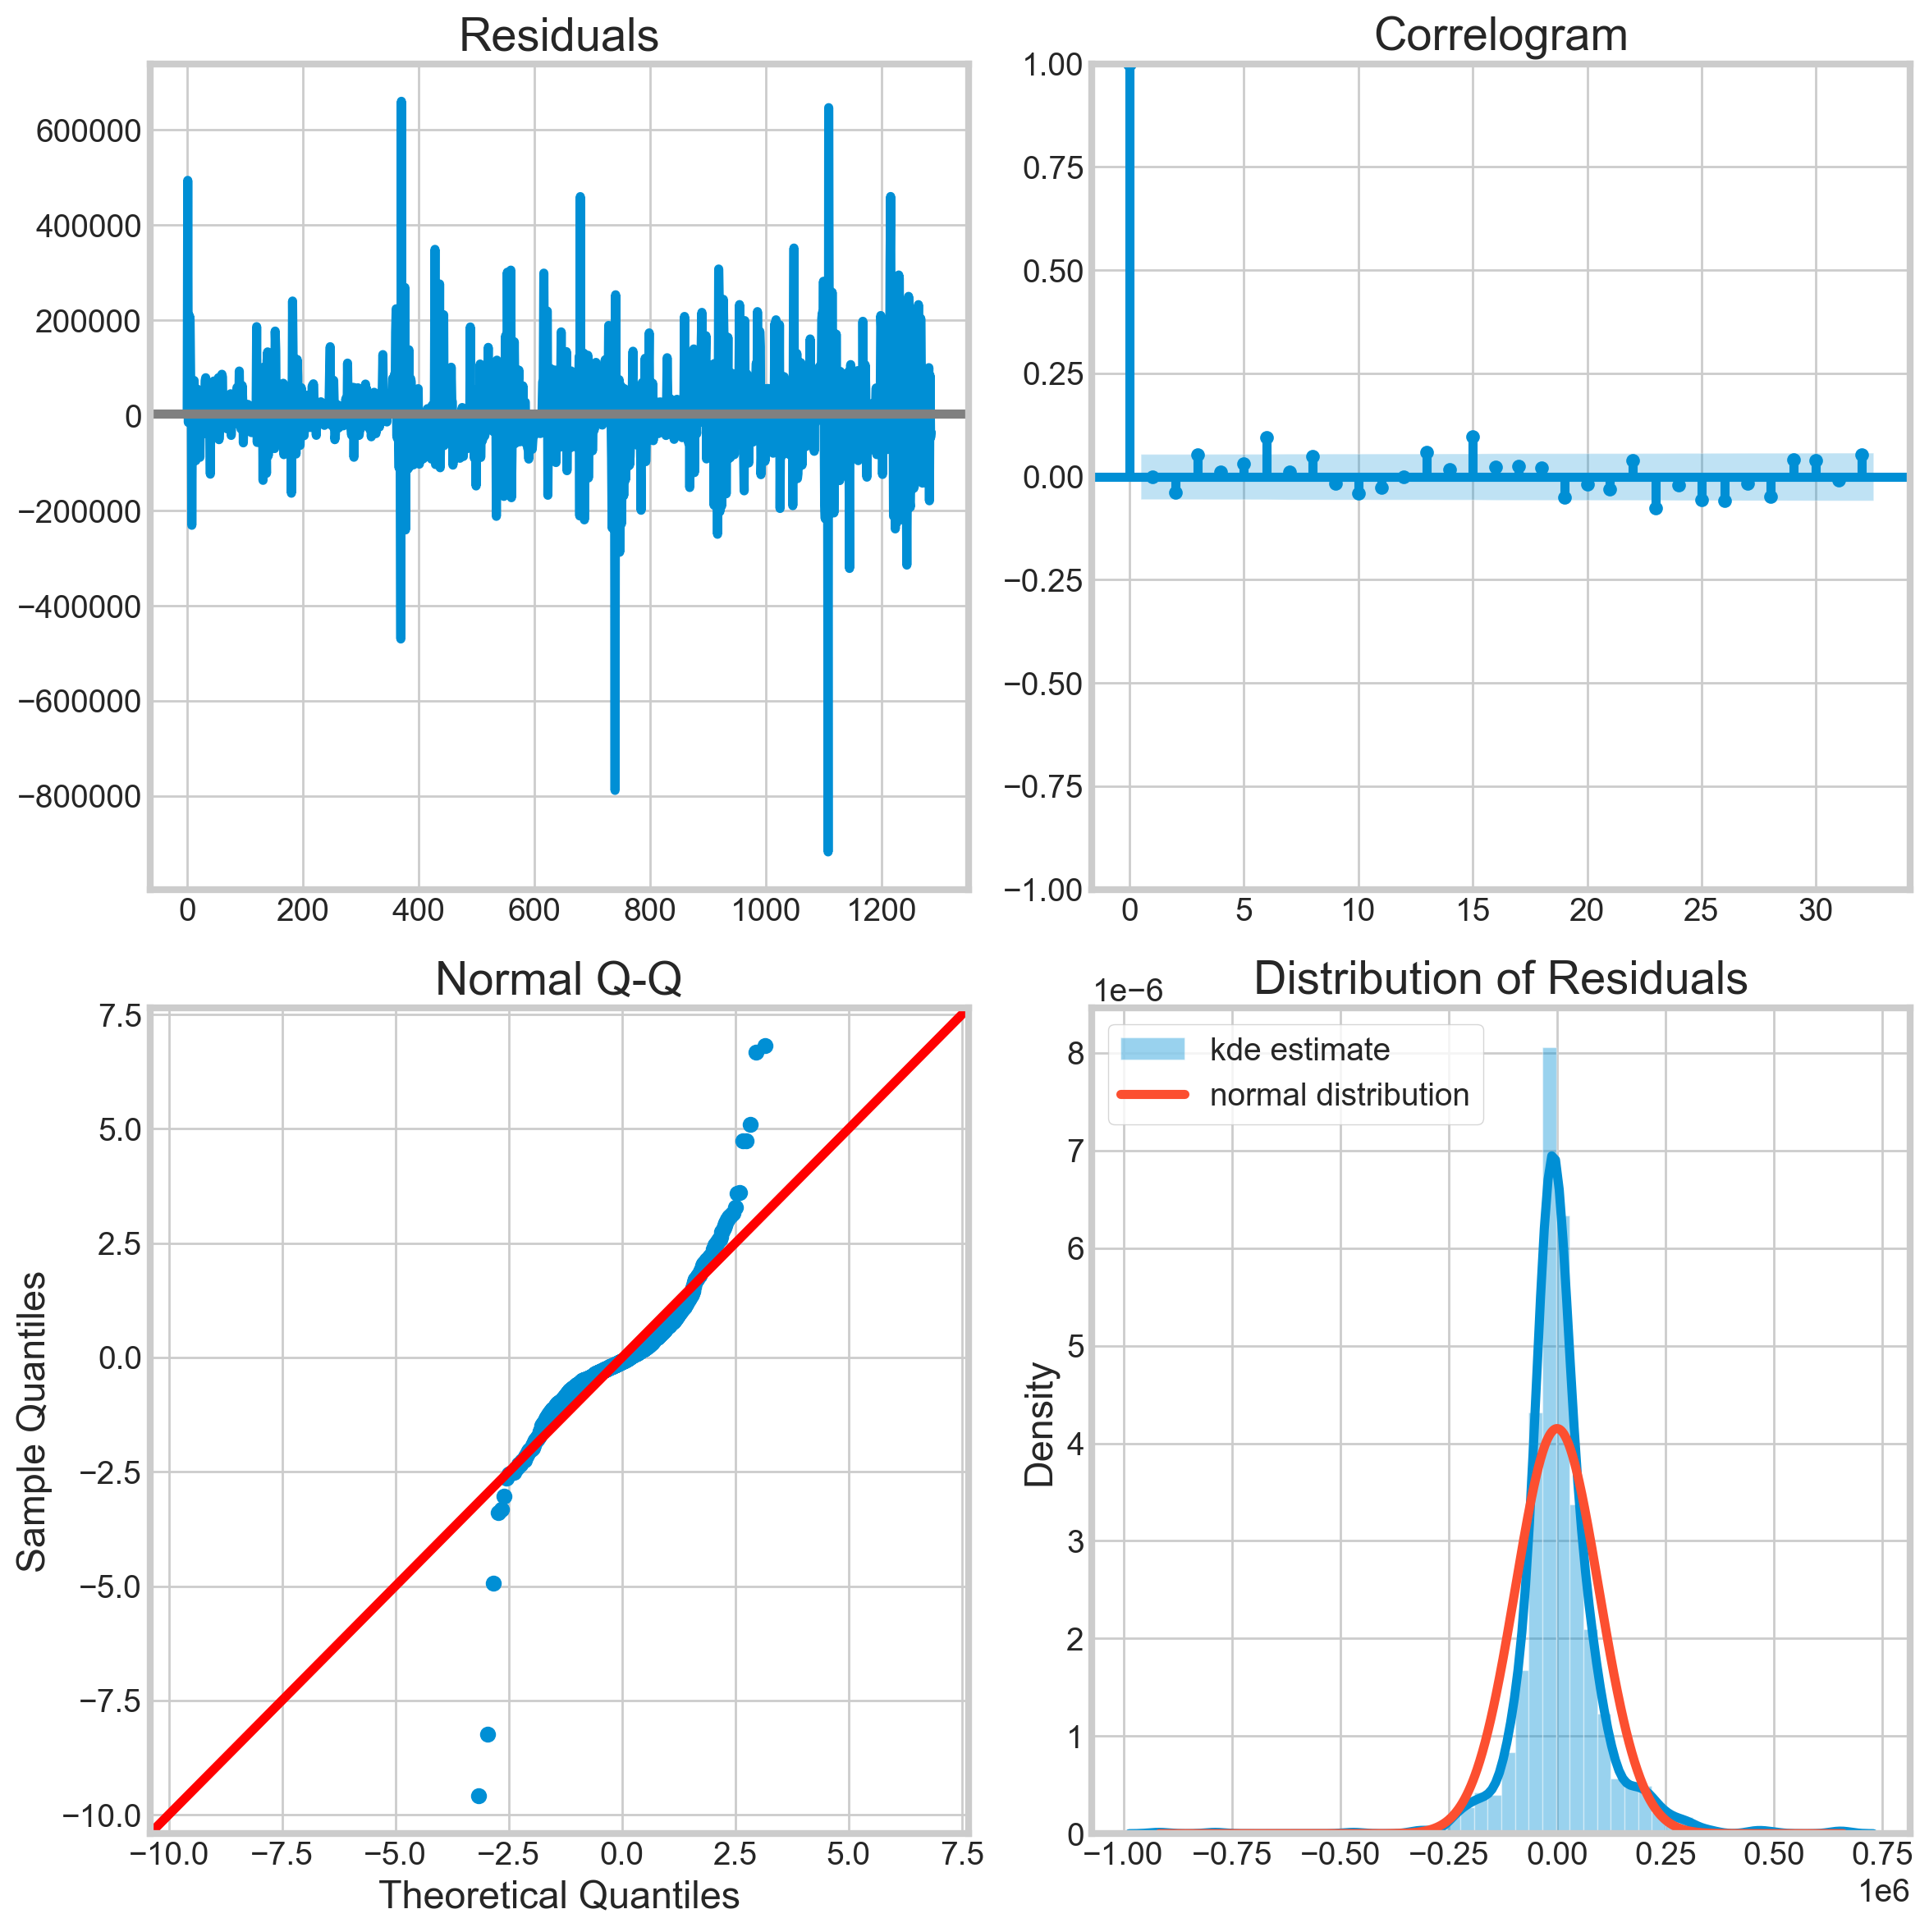

In [106]:
residual_plot(model_s.resid.values) ## seasonal ARIMA